In [1]:
# Add directory above current directory to path
import sys as SYS; SYS.path.insert(0, '..')

# for saving
import os

from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt

from src import setup
# setup.use_gpu()

In [2]:
from src import ( 
    measurements as measure,
    density_matrix as DM,
    simulation as sim,
    orders,
    order_rules,
    random_unitary,
    simulation)

from Scripts import simulation_CLI as cleo

In [3]:
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors 

import matplotlib.animation as animation
# Add directory above current directory to path
import sys as SYS; SYS.path.insert(0, '../..')
import h5py
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from src import ket as ket
from src import density_matrix as DM

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [5]:
#pick={therm,inhomov1,inhomov2,pure} pick one of these to properly store images with the correct labels
dataset_label = "therm"

In [4]:
import sys as SYS; SYS.path.insert(0, '../..')
from Scripts import hdf5merge
hdf5merge.merge_hdf5_files("../data/greedy")

BlockingIOError: [Errno 35] Unable to create file (unable to lock file, errno = 35, error message = 'Resource temporarily unavailable')

In [ ]:
import sys as SYS; SYS.path.insert(0, '../..')
from Scripts import hdf5merge
hdf5merge.merge_hdf5_files("../data/random")

In [ ]:
import sys as SYS; SYS.path.insert(0, '../..')
from Scripts import hdf5merge
hdf5merge.merge_hdf5_files("../data/landscape_maximizes")

In [ ]:
import sys as SYS; SYS.path.insert(0, '../..')
from Scripts import hdf5merge
hdf5merge.merge_hdf5_files("../data/mimic")

In [6]:
newdata1 = dict(h5py.File("../data/random/random.hdf5"))
newdata2 = dict(h5py.File("../data/greedy/greedy.hdf5"))
newdata3 = dict(h5py.File("../data/mimic/mimic.hdf5"))
newdata4 = dict(h5py.File("../data/landscape_maximizes/landscape_maximizes.hdf5"))
newdata5 = h5py.File("../data/strongest_maximizes/strongest_maximizes.hdf5")

In [14]:
newdata5 = h5py.File("../data/strongest_maximizes/strongest_maximizes.hdf5")

In [7]:
def get_pops(data, n_qubits, connectivity,update_rule):
    #dimension 0 is each trial
    #dimension 1 is each time step
    #dimension 2 is each qubit
    result = []
    for trial in data[f'{n_qubits} qubits'][f'{connectivity} connectivity']['unitary energy subspace 1']:
        seed = trial.split(' ')[-1]
        dat = dict(data[f'{n_qubits} qubits'][f'{connectivity} connectivity']['unitary energy subspace 1'][f'unitary seed {seed}'][f'ordering seed {update_rule}']['pops'])
        dat = {int(k.split('(')[0]): dat[k] for k in dat}
        dat = np.array([np.array([dat[k][subkey][()] for subkey in sorted(dat[k])]) for k in sorted(dat)])
        result.append(dat)
    return(np.array(result))

def get_2_qbit_dms(data, n_qubits, connectivity,update_rule):
    basis = ket.canonical_basis(2)
    #dimension 0 is each trial
    #dimension 1 is each time step (recall that sampling step is 5 by default)
    #dimension 2 is qubit pair
    #dimension 3 and 4 is the 2 qubit density matrix
    result = []
    
    def to_tuple(string):
        tuple_elements = string.strip('()').split(',')
        return tuple(int(elem.strip()) for elem in tuple_elements)

    for trial in data[f'{n_qubits} qubits'][f'{connectivity} connectivity']['unitary energy subspace 1']:
        seed = trial.split(' ')[-1]
        dat = dict(data[f'{n_qubits} qubits'][f'{connectivity} connectivity']['unitary energy subspace 1'][f'unitary seed {seed}'][f'ordering seed {update_rule}']['two_qubit_dms'])
        dat = {int(k.split('(')[0]): dat[k] for k in dat}
        
        dat = np.array([{to_tuple(subkey):DM.DensityMatrix(dat[k][subkey],basis) for subkey in sorted(dat[k])} for k in sorted(dat)])
        result.append(dat)
    return(np.array(result))

In [ ]:
#size=

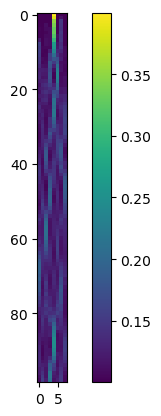

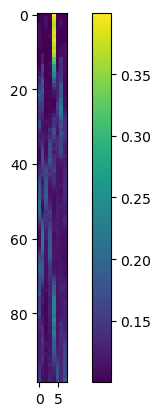

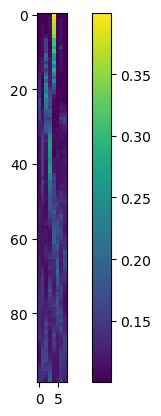

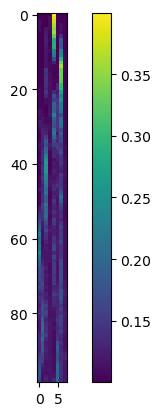

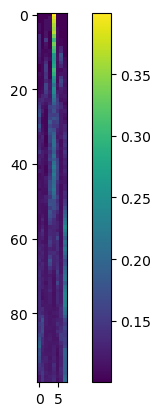

In [9]:
list_conn = ["c2_2local", "c4_2local", "c5_2local", "c6_2local", "cN_2local"]
sizes=size
# Define your min and max values
vmin = 0.1  # Replace with your desired minimum value
vmax = 0.4  # Replace with your desired maximum value
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)

for conn in list_conn:
    for size in sizes:
        pops = get_pops(newdata1,size,conn,"random")
        for i in range(1):
            plt.imshow(pops[i][0:99], interpolation='none')
            plt.colorbar()
            plt.show()

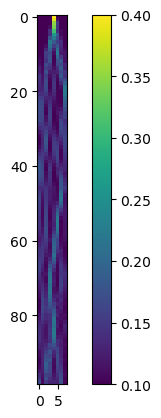

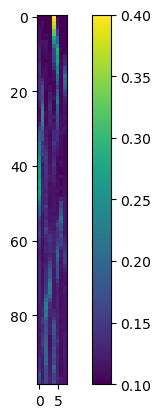

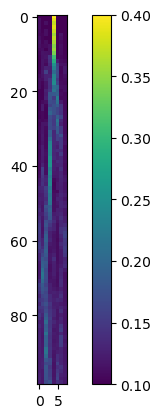

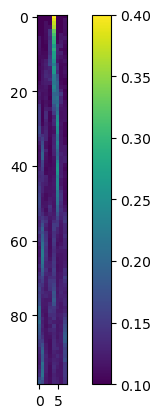

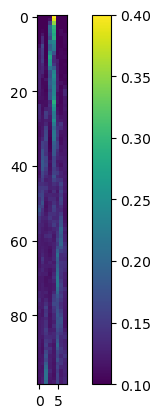

In [12]:
list_conn = ["c2_2local", "c4_2local", "c5_2local", "c6_2local", "cN_2local"]
sizes = [8]

# Define your min and max values
vmin = 0.1  # Replace with your desired minimum value
vmax = 0.4  # Replace with your desired maximum value
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)

for conn in list_conn:
    for size in sizes:
        pops = get_pops(newdata2,size,conn,"greedy")
        for i in range(1):
            plt.imshow(pops[i][0:99], interpolation='none',norm=norm)
            plt.colorbar()
            plt.show()

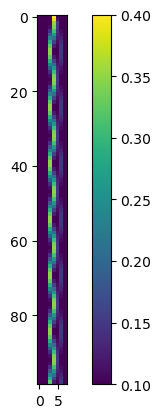

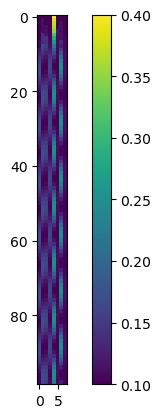

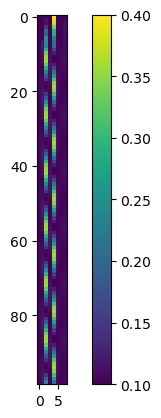

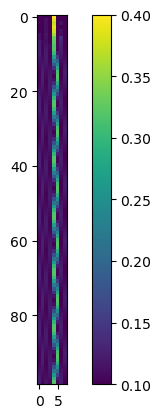

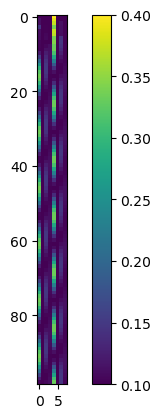

In [13]:
list_conn = ["c2_2local", "c4_2local", "c5_2local", "c6_2local", "cN_2local"]
sizes = [8]

# Define your min and max values
vmin = 0.1  # Replace with your desired minimum value
vmax = 0.4  # Replace with your desired maximum value
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)

for conn in list_conn:
    for size in sizes:
        pops = get_pops(newdata4,size,conn,"landscape_maximizes")
        for i in range(1):
            plt.imshow(pops[i][00:99], interpolation='none',norm=norm)
            plt.colorbar()
            plt.show()

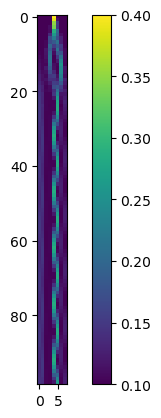

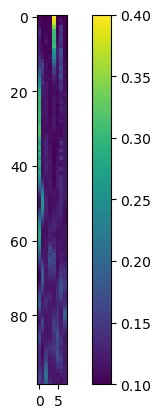

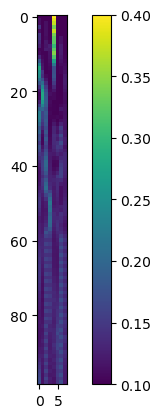

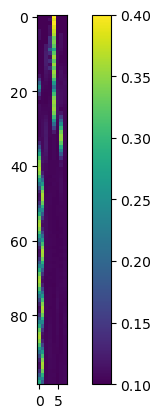

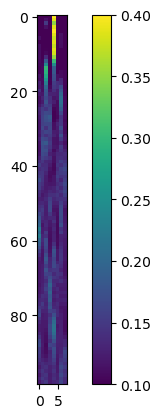

In [14]:
list_conn = ["c2_2local", "c4_2local", "c5_2local", "c6_2local", "cN_2local"]
sizes = [8]

# Define your min and max values
vmin = 0.1  # Replace with your desired minimum value
vmax = 0.4  # Replace with your desired maximum value
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)

for conn in list_conn:
    for size in sizes:
        pops = get_pops(newdata3,size,conn,"mimic")
        for i in range(1):
            plt.imshow(pops[i][0:99], interpolation='none',norm=norm)
            plt.colorbar()
            plt.show()

In [ ]:
Big data analysis:

In [8]:
num=8

In [9]:
pops_random_c2 = get_pops(newdata1, num, "c2_2local", "random")
pops_random_c4 = get_pops(newdata1, num, "c4_2local", "random")
pops_random_c5 = get_pops(newdata1, num, "c5_2local", "random")
pops_random_c6 = get_pops(newdata1, num, "c6_2local", "random")
pops_random_cn = get_pops(newdata1, num, "cN_2local", "random")

In [10]:
pops_greedy_c2 = get_pops(newdata2, num, "c2_2local", "greedy")
pops_greedy_c4 = get_pops(newdata2, num, "c4_2local", "greedy")
pops_greedy_c5 = get_pops(newdata2, num, "c5_2local", "greedy")
pops_greedy_c6 = get_pops(newdata2, num, "c6_2local", "greedy")
pops_greedy_cn = get_pops(newdata2, num, "cN_2local", "greedy")

In [11]:
pops_mimic_c2 = get_pops(newdata3, num, "c2_2local", "mimic")
pops_mimic_c4 = get_pops(newdata3, num, "c4_2local", "mimic")
pops_mimic_c5 = get_pops(newdata3, num, "c5_2local", "mimic")
pops_mimic_c6 = get_pops(newdata3, num, "c6_2local", "mimic")
pops_mimic_cn = get_pops(newdata3, num, "cN_2local", "mimic")

In [12]:
pops_landscape_maximizes_c2 = get_pops(newdata4, num, "c2_2local", "landscape_maximizes")
pops_landscape_maximizes_c4 = get_pops(newdata4, num, "c4_2local", "landscape_maximizes")
pops_landscape_maximizes_c5 = get_pops(newdata4, num, "c5_2local", "landscape_maximizes")
pops_landscape_maximizes_c6 = get_pops(newdata4, num, "c6_2local", "landscape_maximizes")
pops_landscape_maximizes_cn = get_pops(newdata4, num, "cN_2local", "landscape_maximizes")

In [15]:
pops_strongest_maximizes_c2 = get_pops(newdata5, num, "c2_2local", "strongest_maximizes")
pops_strongest_maximizes_c4 = get_pops(newdata5, num, "c4_2local", "strongest_maximizes")
pops_strongest_maximizes_c5 = get_pops(newdata5, num, "c5_2local", "strongest_maximizes")
pops_strongest_maximizes_c6 = get_pops(newdata5, num, "c6_2local", "strongest_maximizes")
pops_strongest_maximizes_cn = get_pops(newdata5, num, "cN_2local", "strongest_maximizes")

In [ ]:
Ensemble average across 100 data sets

In [16]:
def ensemble_averaged_one_point_measures_mean_std(datasets):
    # Assuming datasets is a list of 100 datasets, where each dataset is a 2D array of shape (100, N)
    # Stack datasets into a 3D array
    stacked_data = np.stack(datasets)  # Shape (100, 100, N)

    # Take the ensemble average along the first axis (averaging over all datasets)
    ensemble_average = np.mean(stacked_data, axis=0)  # Shape (100, N)

    # Calculate the standard deviation along the first axis
    ensemble_std = np.std(stacked_data, axis=0) 
    return (ensemble_average, ensemble_std)

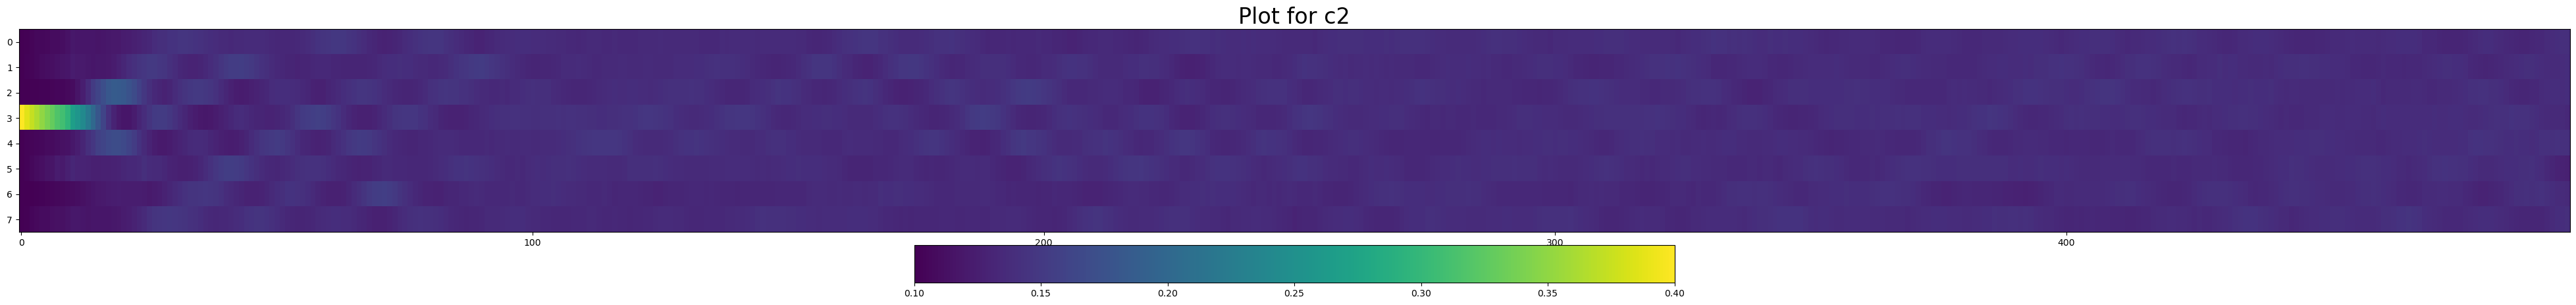

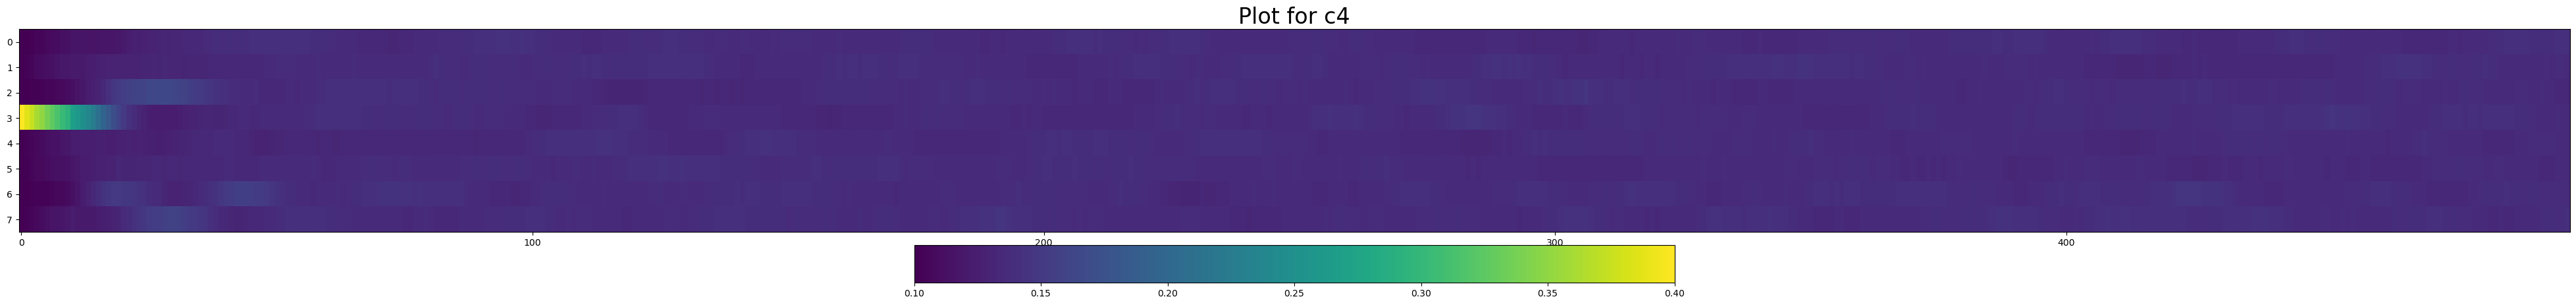

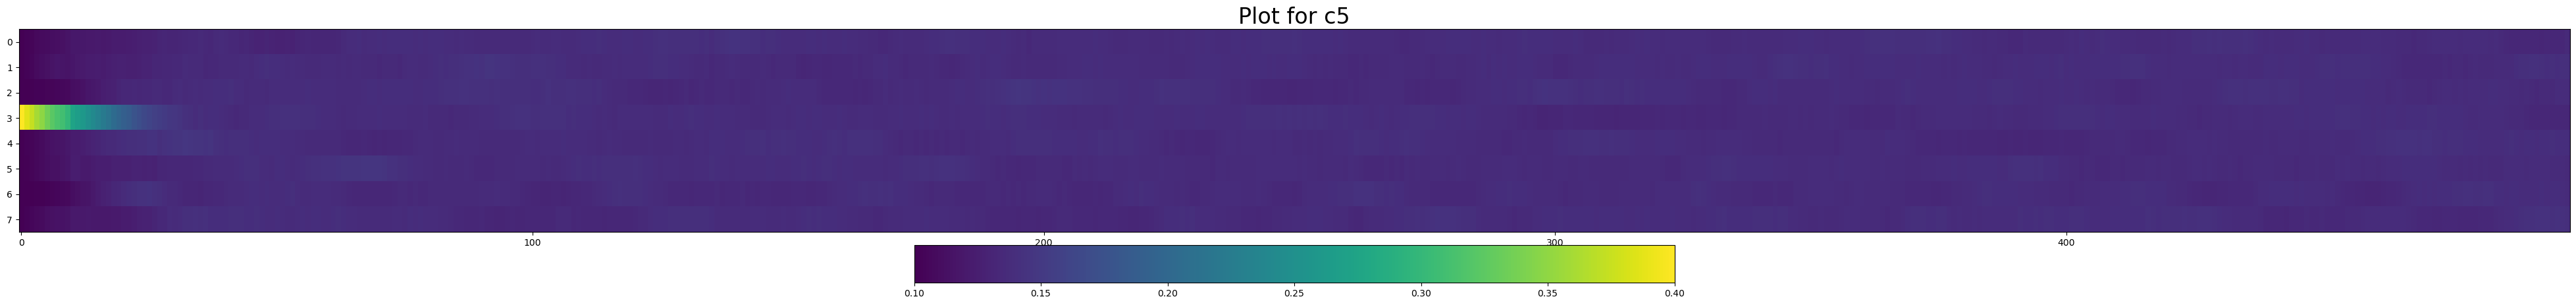

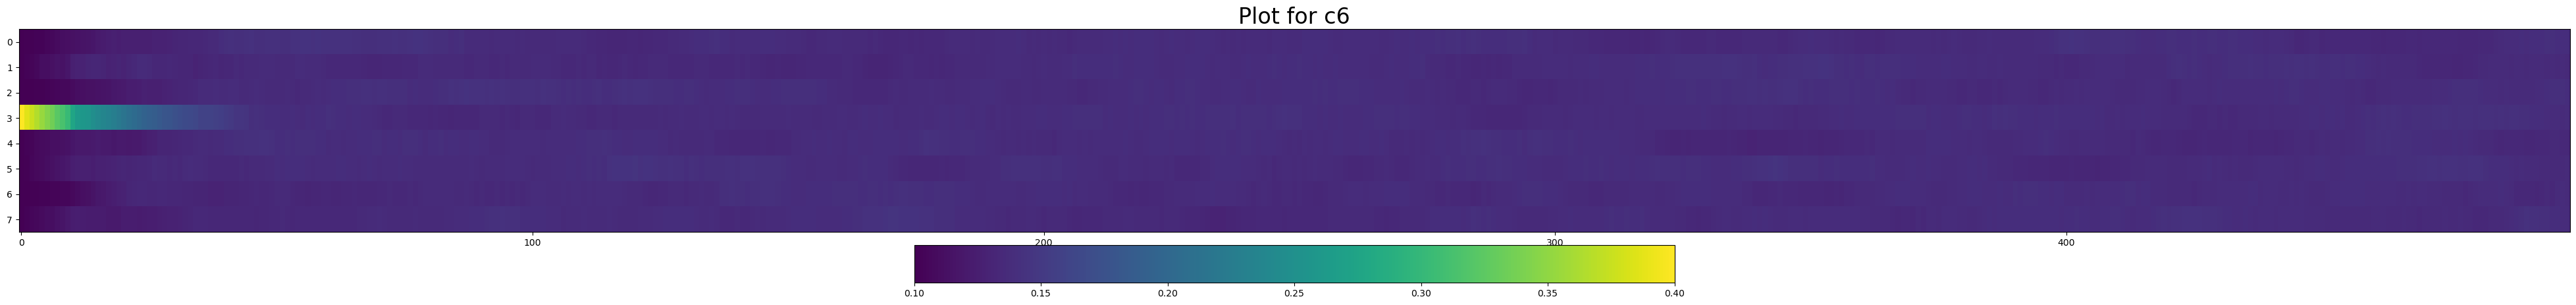

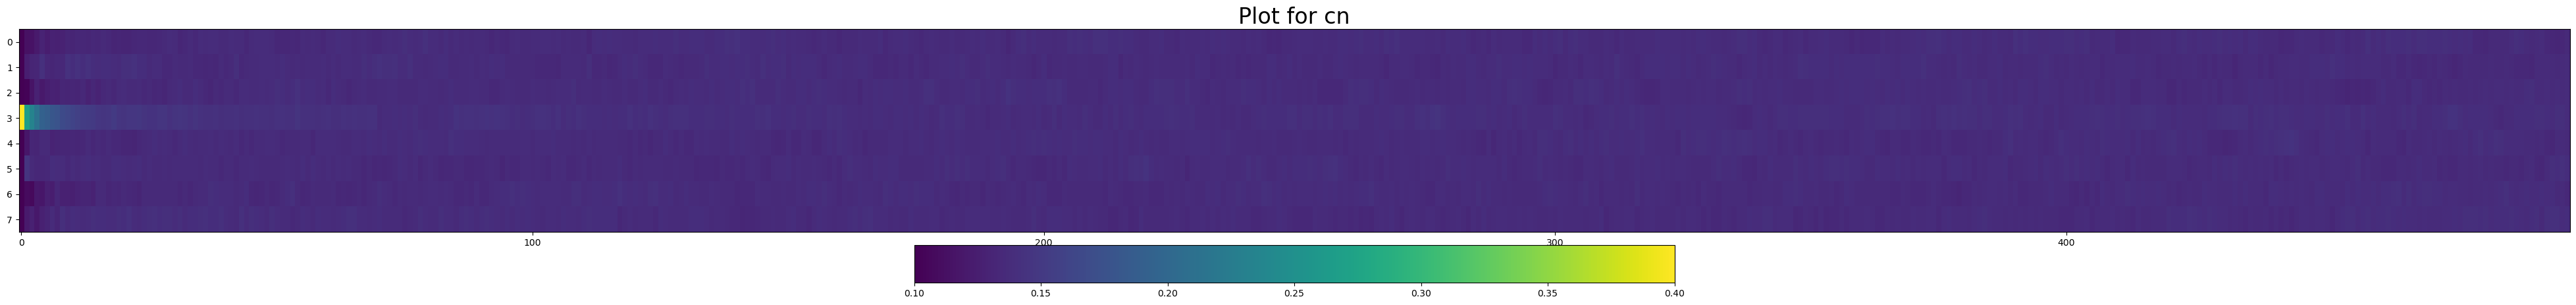

In [17]:
# Define your min and max values
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

# Define normalization range and dataset details
vmin = 0.1
vmax = 0.4
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)
dataset_names = ['c2', 'c4', 'c5', 'c6', 'cn']
datas = [pops_random_c2, pops_random_c4, pops_random_c5, pops_random_c6, pops_random_cn]

for pops, conn in zip(datas, dataset_names):
    es_evg = ensemble_averaged_one_point_measures_mean_std(pops)

    # Create a new figure with a specified size
    plt.figure(figsize=(50, 5))  # Adjust as necessary
    
    # Rotate the data by 90 degrees counterclockwise
    rotated_data = np.rot90(es_evg[0][0:499])

    # Display the rotated data
    img = plt.imshow(rotated_data, interpolation='none', norm=norm, aspect='auto')

    # Add a colorbar
    cbar = plt.colorbar(img, orientation='horizontal', pad=0.05)
    cbar.ax.tick_params(labelsize=10)  # Set colorbar tick label size

    plt.title(f'Plot for {conn}', fontsize=24)  # Optional: Add a title for clarity

    # Save the figure
    #plt.savefig(f'Ensemble averaged mean population swatch of network {num}q_conn_{conn}_rule_R1_{dataset_label}.pdf', 
                #format='pdf', bbox_inches='tight')

    plt.show()



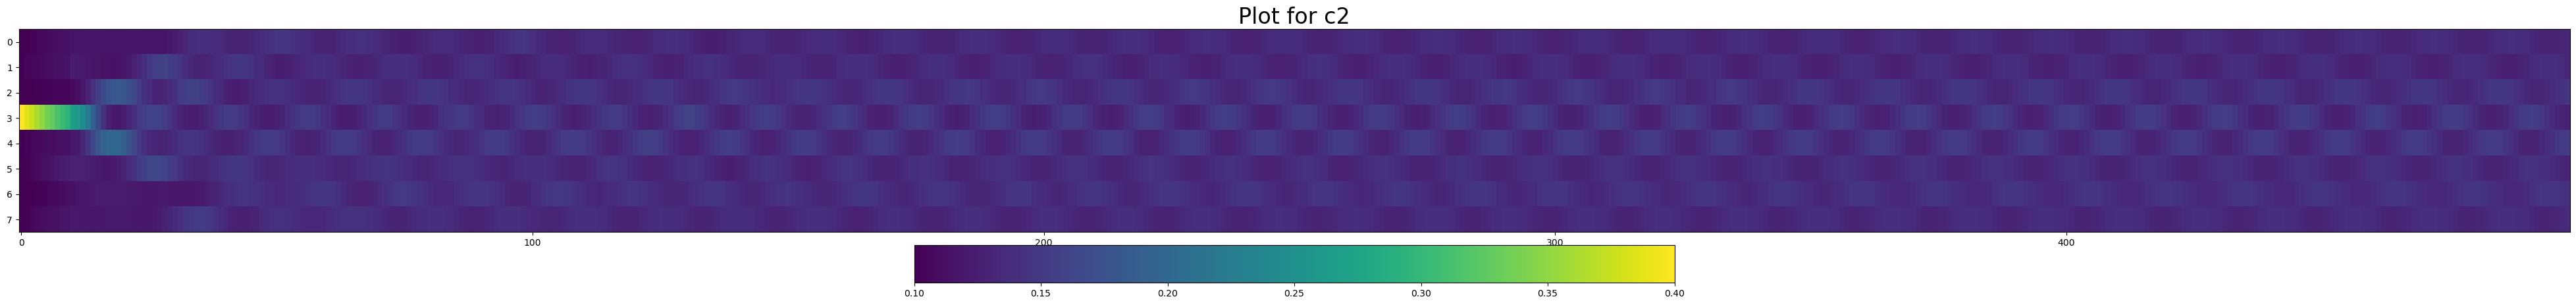

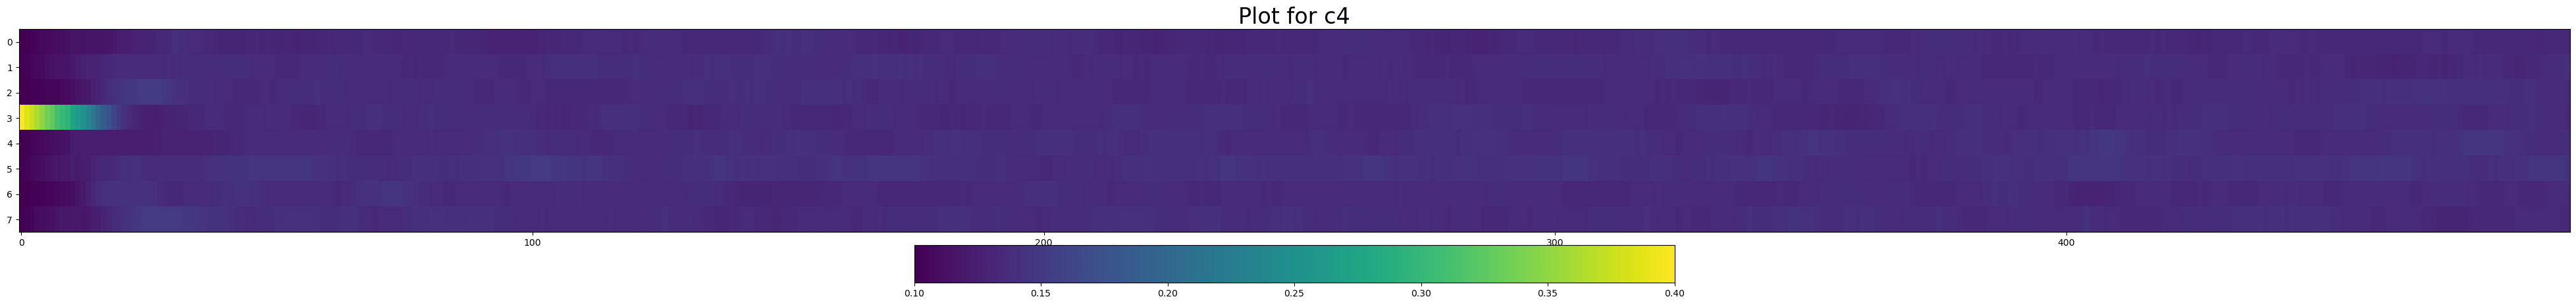

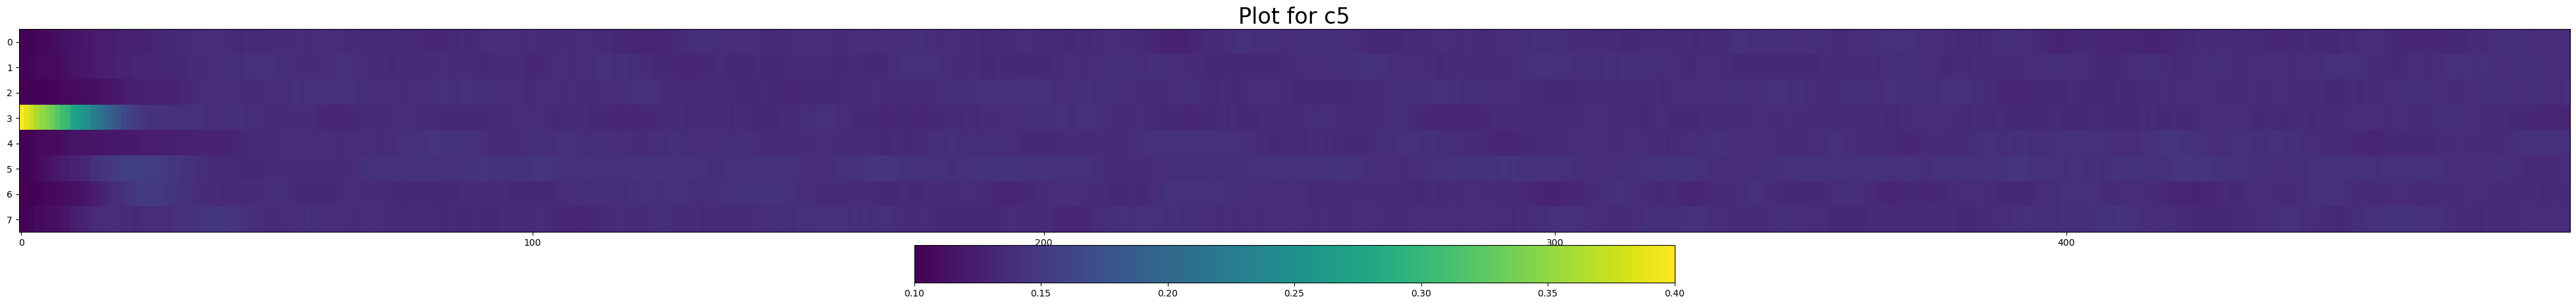

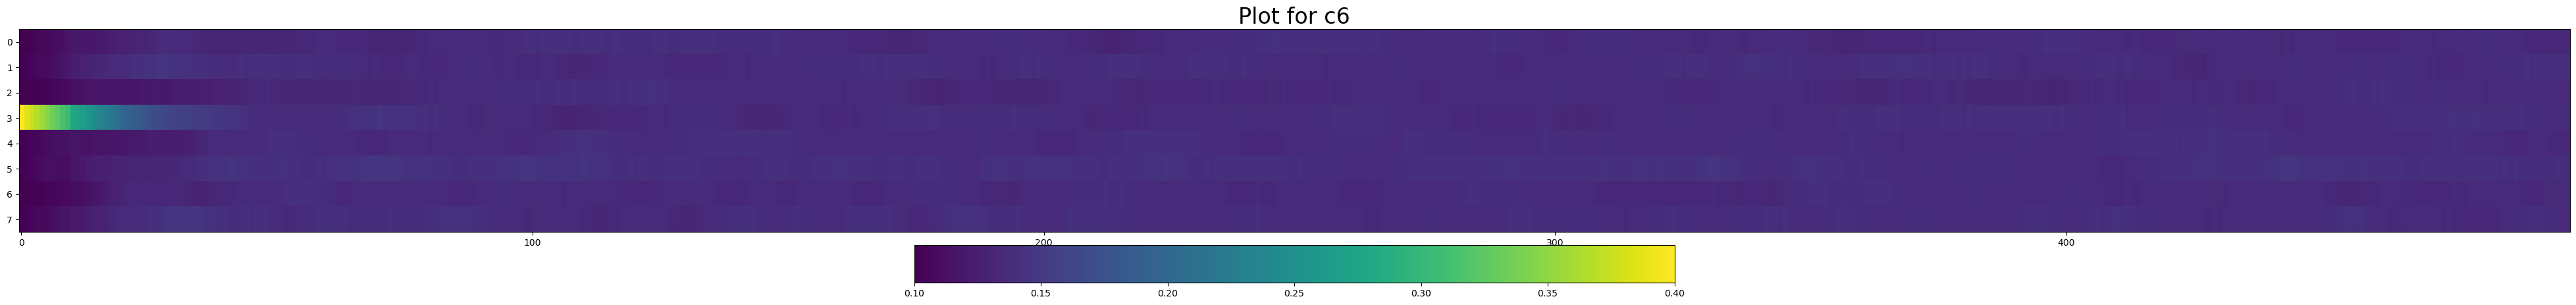

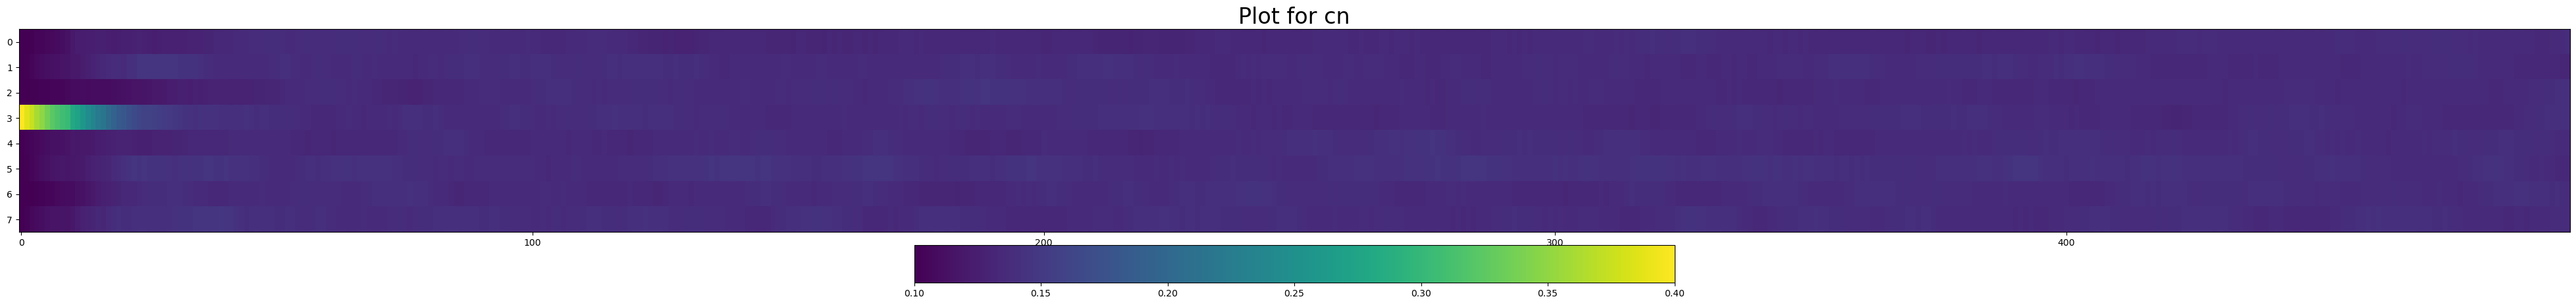

In [18]:
# Define your min and max values
vmin = 0.1  # Replace with your desired minimum value
vmax = 0.4  # Replace with your desired maximum value
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)
dataset_names = ['c2', 'c4', 'c5', 'c6', 'cn']  # Names corresponding to each dataset
datas=[pops_greedy_c2,pops_greedy_c4,pops_greedy_c5,pops_greedy_c6,pops_greedy_cn]


for pops,conn in zip(datas, dataset_names):
    es_evg = ensemble_averaged_one_point_measures_mean_std(pops)

    # Create a new figure with a specified size
    plt.figure(figsize=(50, 5))  # Adjust as necessary
    
    # Rotate the data by 90 degrees counterclockwise
    rotated_data = np.rot90(es_evg[0][0:499])

    # Display the rotated data
    img = plt.imshow(rotated_data, interpolation='none', norm=norm, aspect='auto')

    # Add a colorbar
    cbar = plt.colorbar(img, orientation='horizontal', pad=0.05)
    cbar.ax.tick_params(labelsize=10)  # Set colorbar tick label size

    plt.title(f'Plot for {conn}', fontsize=24)  # Optional: Add a title for clarity
    #plt.savefig(f'Ensemble averaged mean population swatch of network {num}q_conn_{conn}_rule_R2_{dataset_label}.pdf', format='pdf', bbox_inches='tight')

    plt.show()

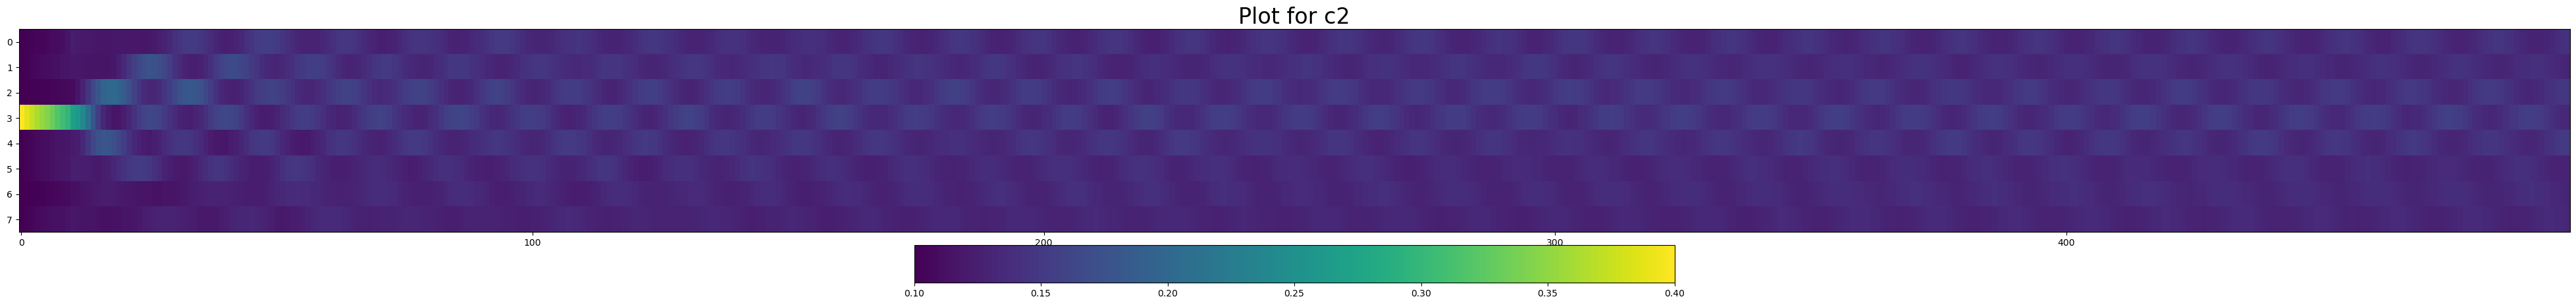

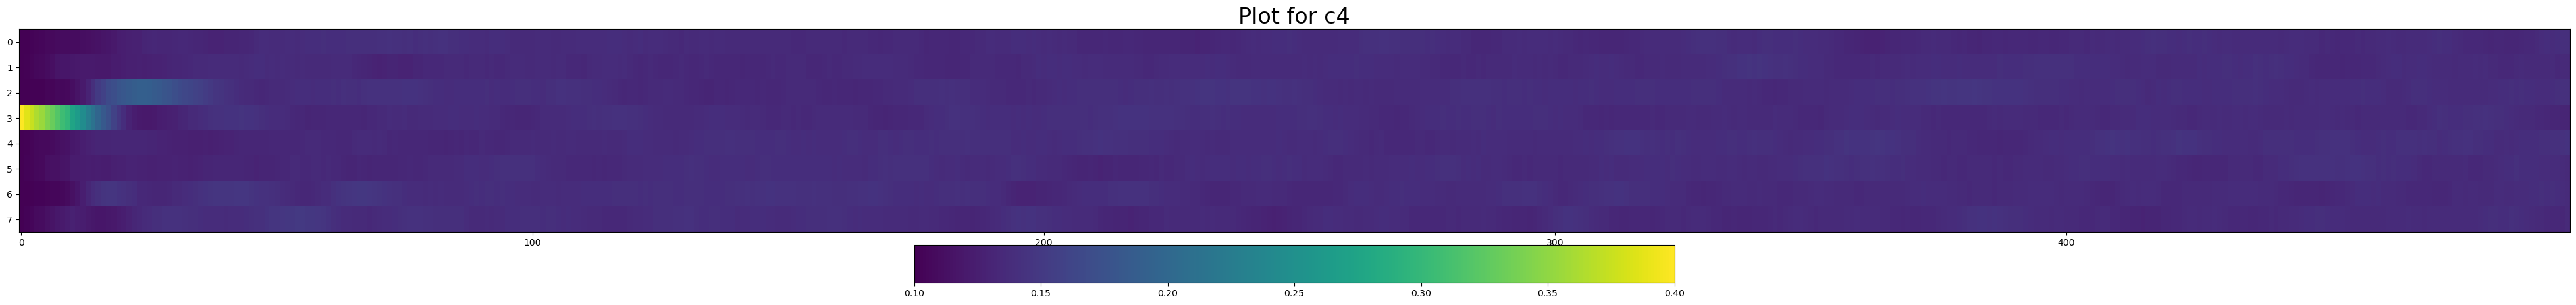

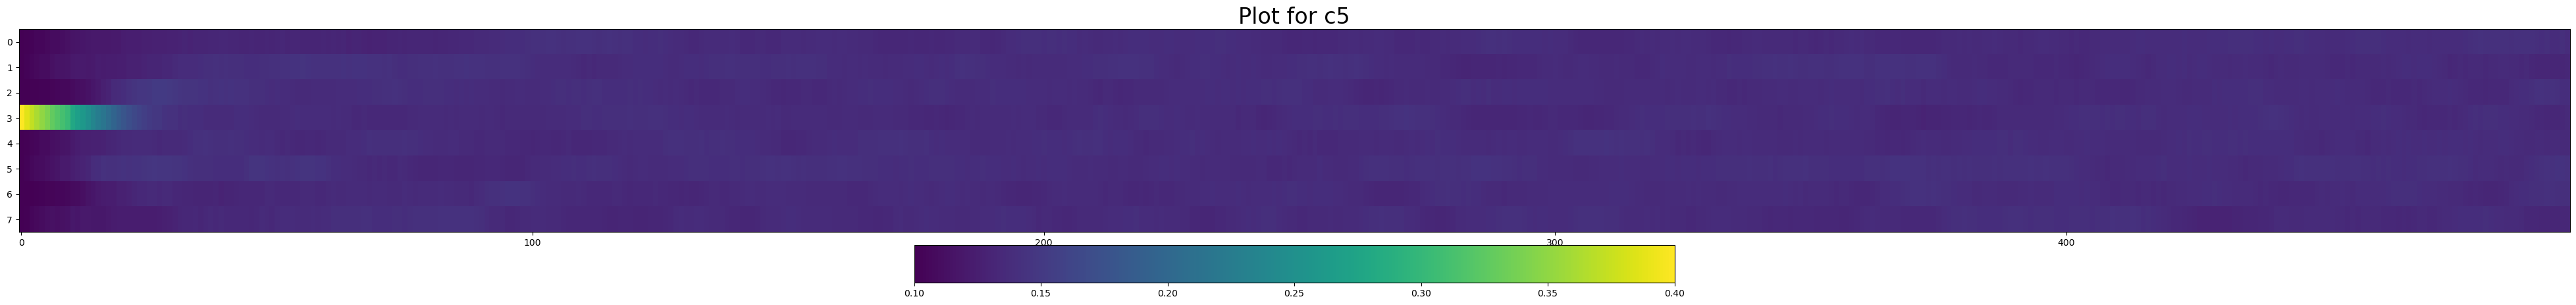

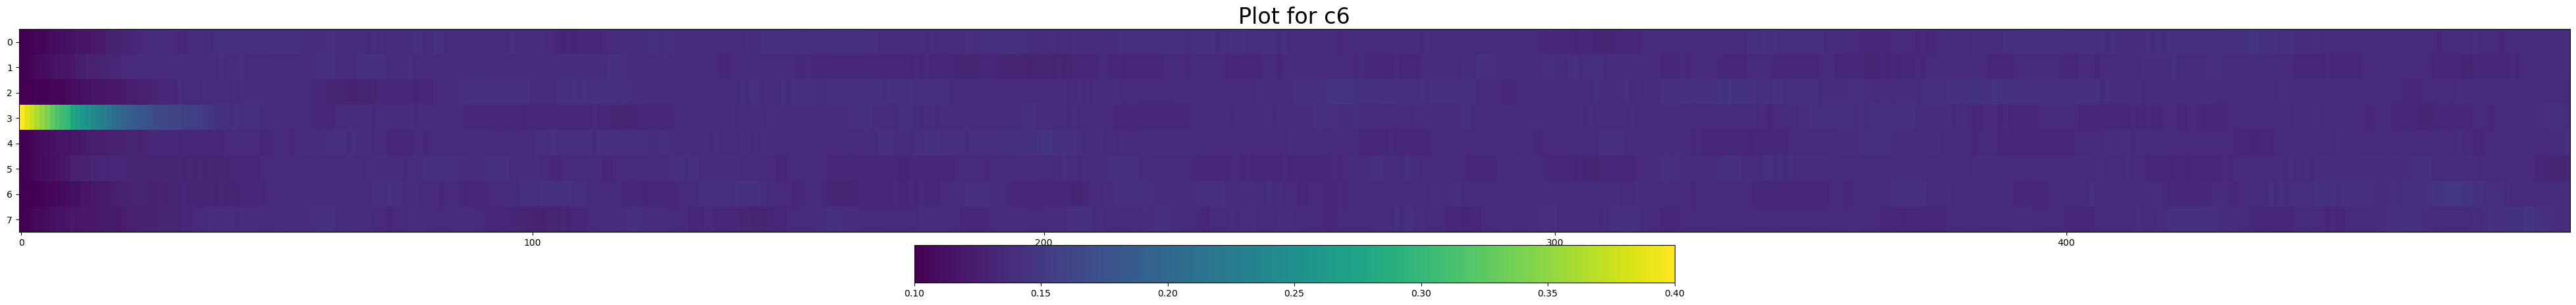

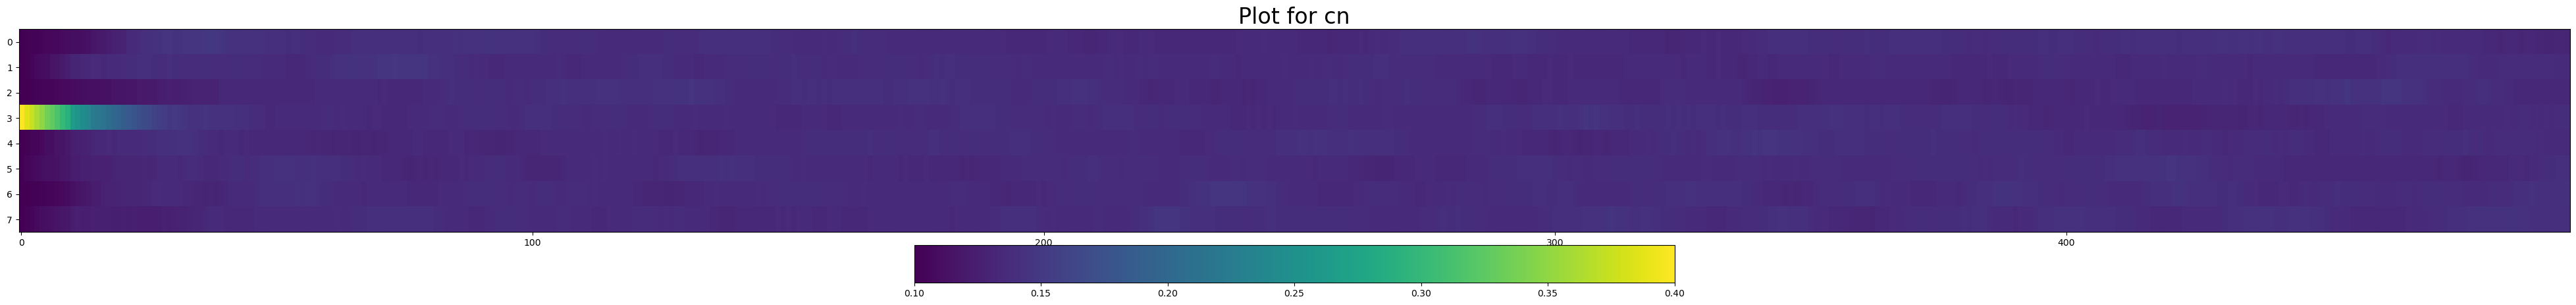

In [19]:
vmin = 0.1  # Replace with your desired minimum value
vmax = 0.4  # Replace with your desired maximum value
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)

dataset_names = ['c2', 'c4', 'c5', 'c6', 'cn']  # Names corresponding to each dataset
datas=[pops_mimic_c2,pops_mimic_c4,pops_mimic_c5,pops_mimic_c6,pops_mimic_cn]


for pops,conn in zip(datas, dataset_names):
    es_evg = ensemble_averaged_one_point_measures_mean_std(pops)


    # Create a new figure with a specified size
    plt.figure(figsize=(50, 5))  # Adjust as necessary
    
    # Rotate the data by 90 degrees counterclockwise
    rotated_data = np.rot90(es_evg[0][0:499])

    # Display the rotated data
    img = plt.imshow(rotated_data, interpolation='none', norm=norm, aspect='auto')

    # Add a colorbar
    cbar = plt.colorbar(img, orientation='horizontal', pad=0.05)
    cbar.ax.tick_params(labelsize=10)  # Set colorbar tick label size

    plt.title(f'Plot for {conn}', fontsize=24)  # Optional: Add a title for clarity
    #plt.savefig(f'Ensemble averaged mean population swatch of network {num}q_conn_{conn}_rule_R3_{dataset_label}.pdf', format='pdf', bbox_inches='tight')

    plt.show()

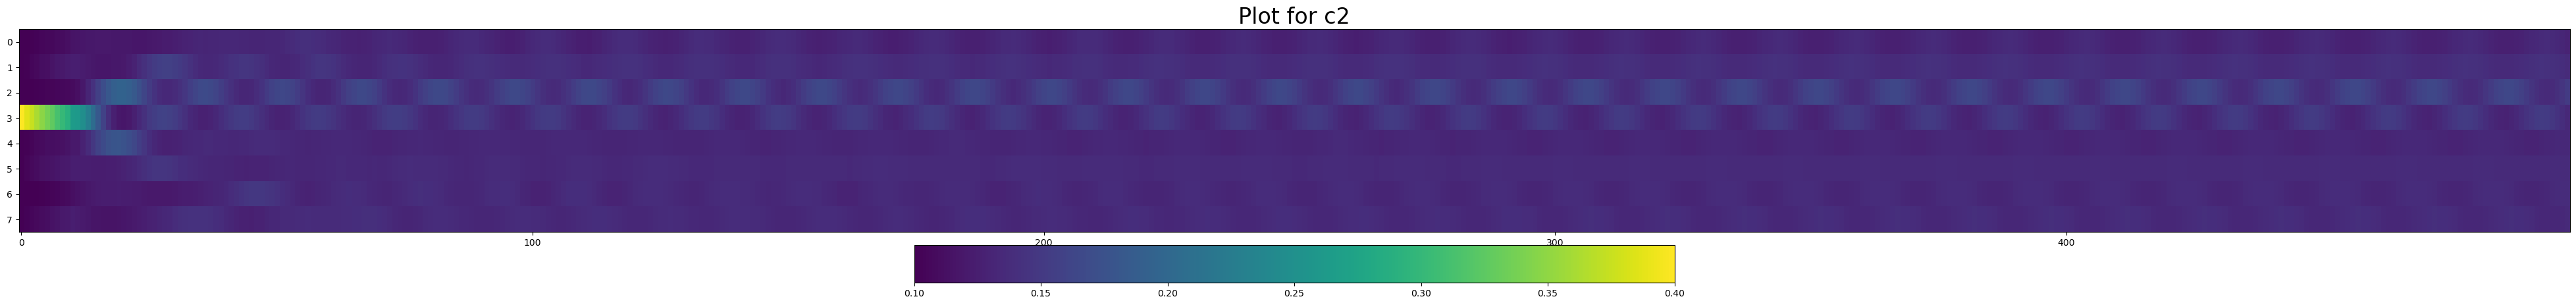

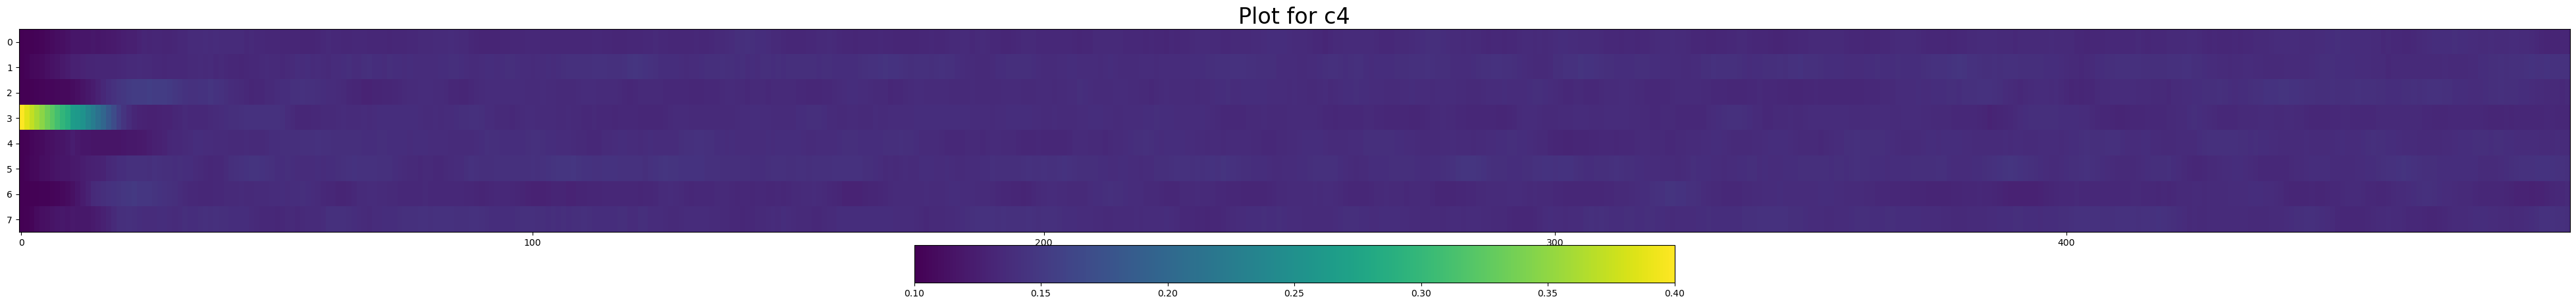

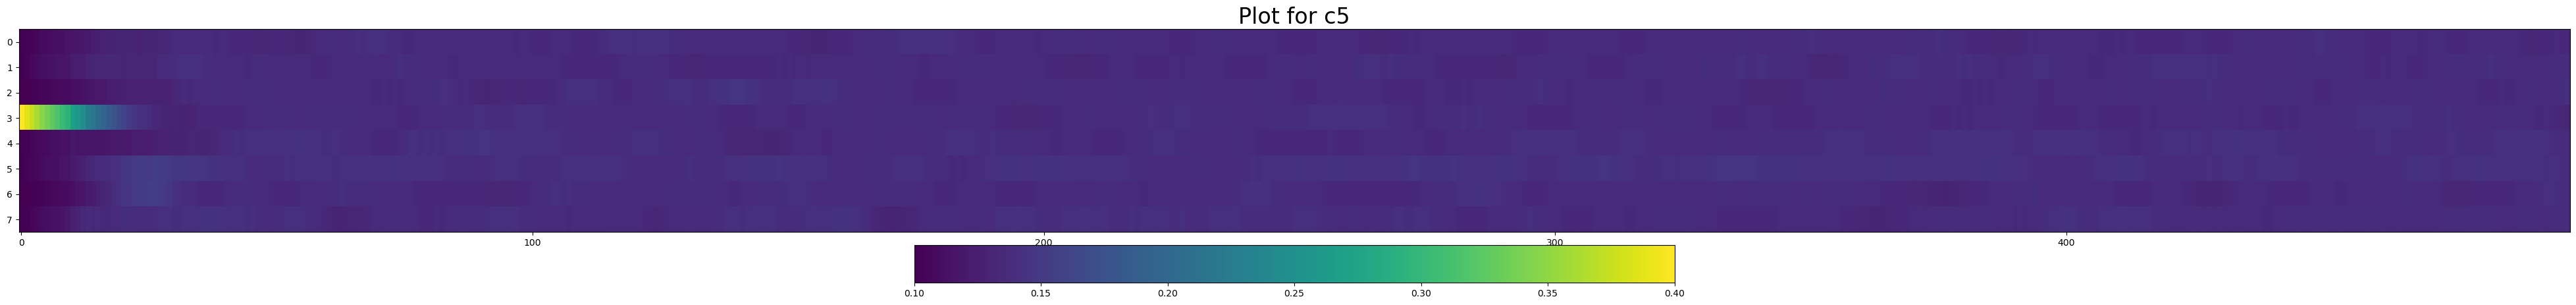

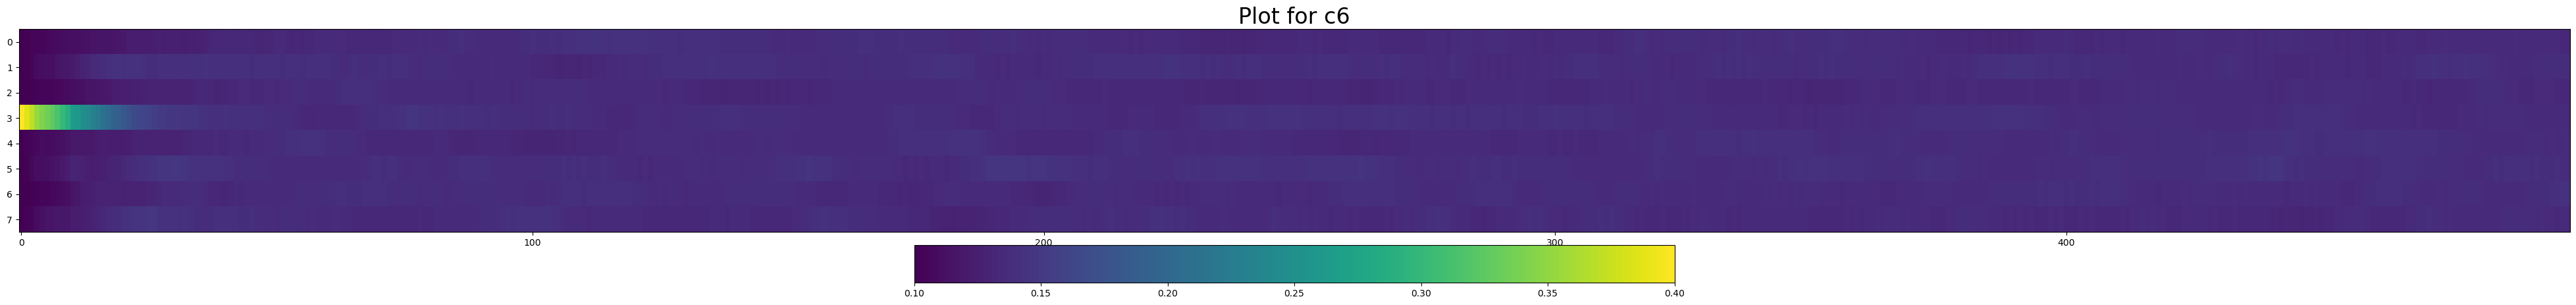

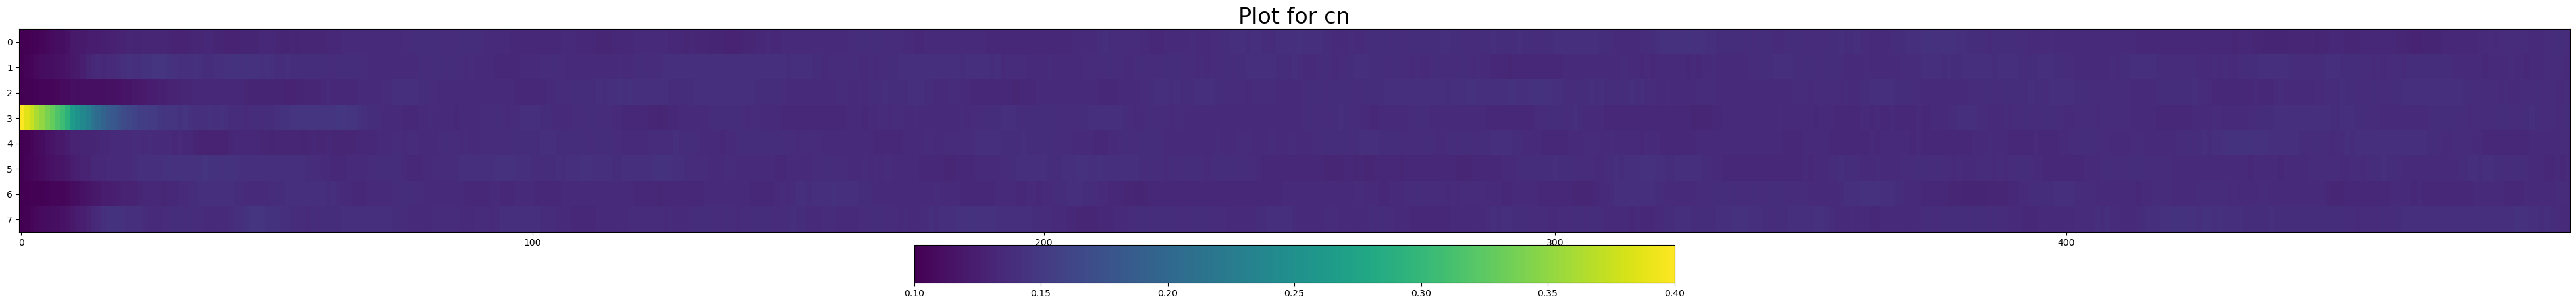

In [20]:
vmin = 0.1  # Replace with your desired minimum value
vmax = 0.4  # Replace with your desired maximum value
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)

dataset_names = ['c2', 'c4', 'c5', 'c6', 'cn']  # Names corresponding to each dataset
datas=[pops_landscape_maximizes_c2,pops_landscape_maximizes_c4,pops_landscape_maximizes_c5,pops_landscape_maximizes_c6,pops_landscape_maximizes_cn]


for pops,conn in zip(datas, dataset_names):
    es_evg = ensemble_averaged_one_point_measures_mean_std(pops)


    # Create a new figure with a specified size
    plt.figure(figsize=(50, 5))  # Adjust as necessary
    
    # Rotate the data by 90 degrees counterclockwise
    rotated_data = np.rot90(es_evg[0][0:499])

    # Display the rotated data
    img = plt.imshow(rotated_data, interpolation='none', norm=norm, aspect='auto')

    # Add a colorbar
    cbar = plt.colorbar(img, orientation='horizontal', pad=0.05)
    cbar.ax.tick_params(labelsize=10)  # Set colorbar tick label size

    plt.title(f'Plot for {conn}', fontsize=24)  # Optional: Add a title for clarity
    #plt.savefig(f'Ensemble averaged mean population swatch of network {num}q_conn_{conn}_rule_R4_{dataset_label}.pdf', format='pdf', bbox_inches='tight')
    plt.show()

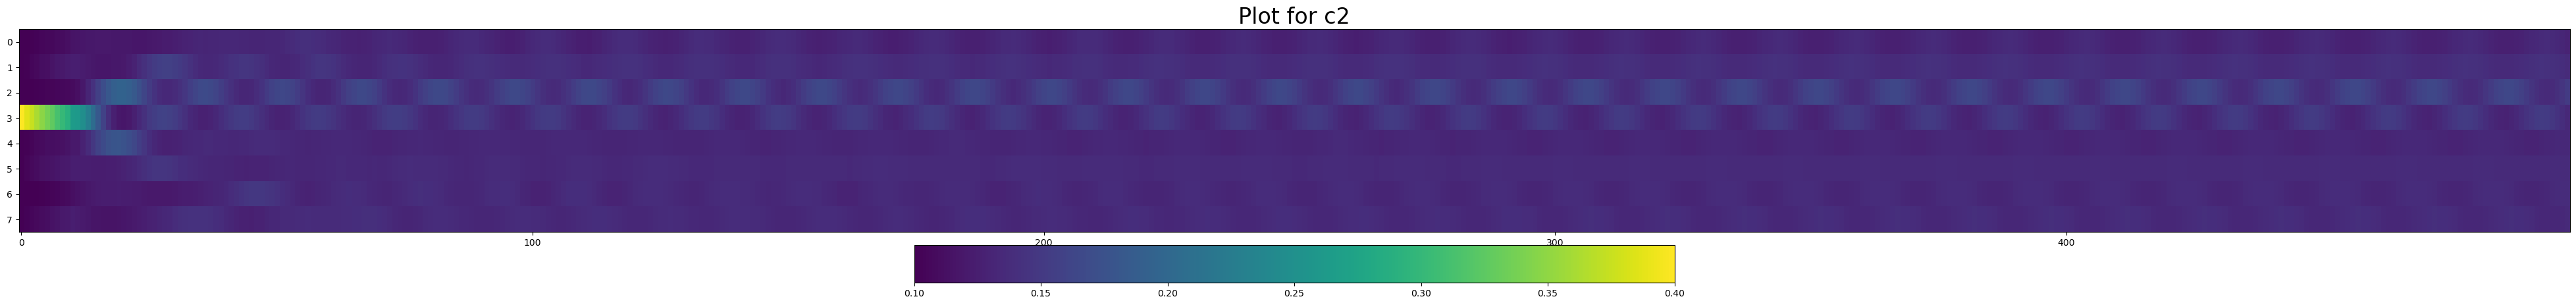

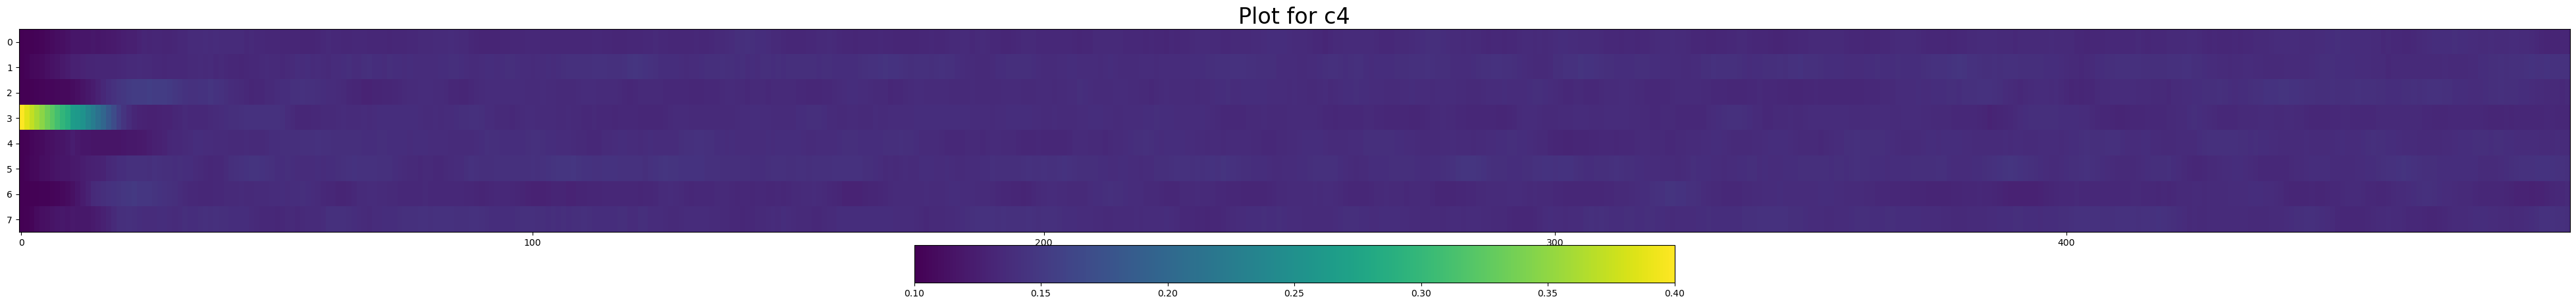

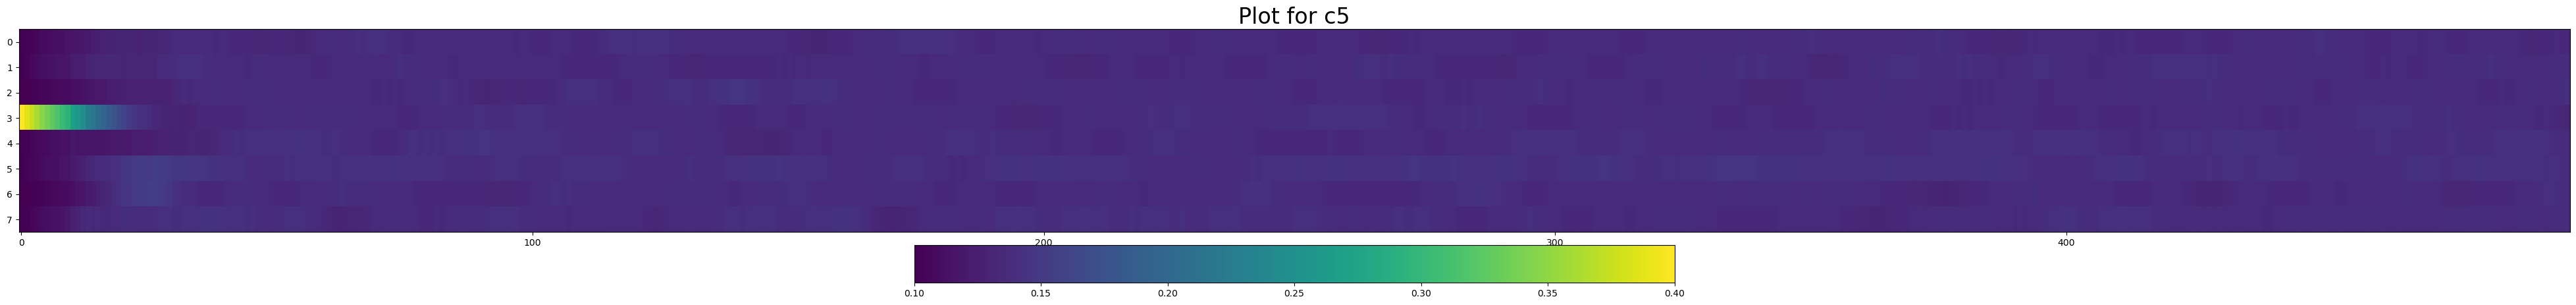

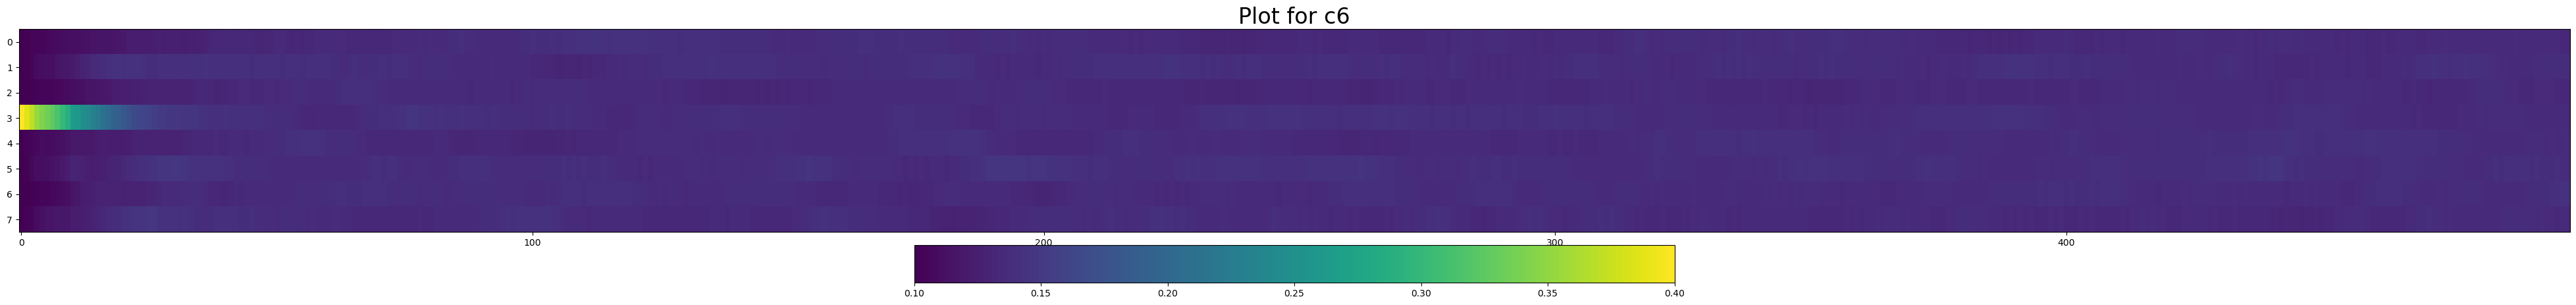

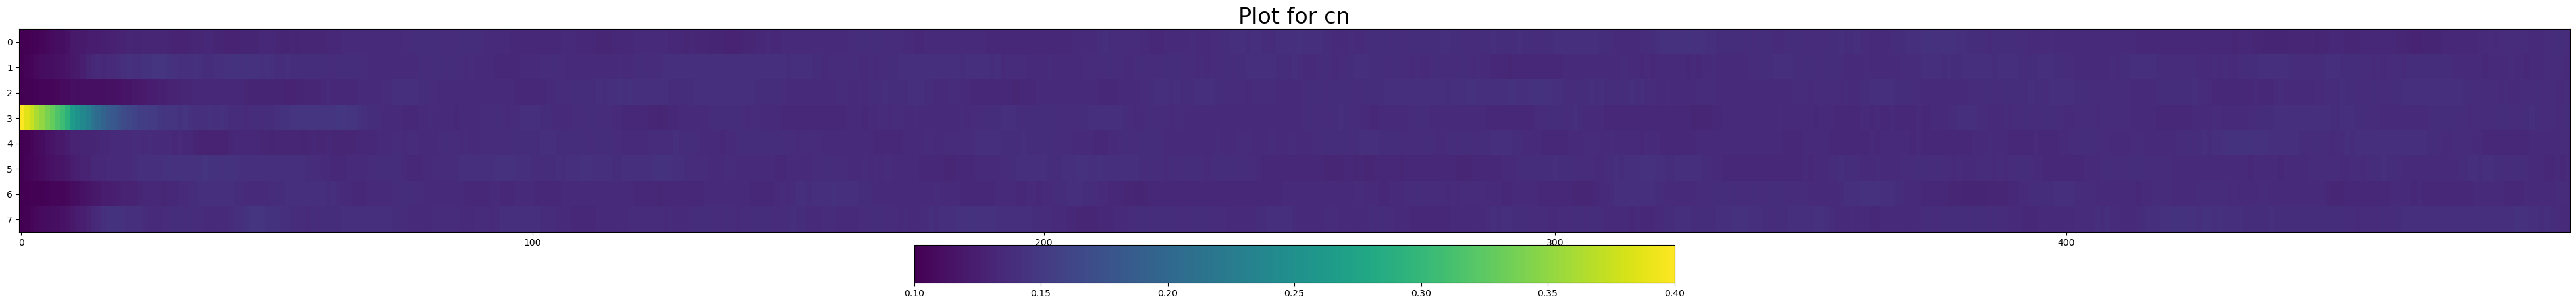

In [21]:
vmin = 0.1  # Replace with your desired minimum value
vmax = 0.4  # Replace with your desired maximum value
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)

dataset_names = ['c2', 'c4', 'c5', 'c6', 'cn']  # Names corresponding to each dataset
datas=[pops_landscape_maximizes_c2,pops_landscape_maximizes_c4,pops_landscape_maximizes_c5,pops_landscape_maximizes_c6,pops_landscape_maximizes_cn]


for pops,conn in zip(datas, dataset_names):
    es_evg = ensemble_averaged_one_point_measures_mean_std(pops)


    # Create a new figure with a specified size
    plt.figure(figsize=(50, 5))  # Adjust as necessary
    
    # Rotate the data by 90 degrees counterclockwise
    rotated_data = np.rot90(es_evg[0][0:499])

    # Display the rotated data
    img = plt.imshow(rotated_data, interpolation='none', norm=norm, aspect='auto')

    # Add a colorbar
    cbar = plt.colorbar(img, orientation='horizontal', pad=0.05)
    cbar.ax.tick_params(labelsize=10)  # Set colorbar tick label size

    plt.title(f'Plot for {conn}', fontsize=24)  # Optional: Add a title for clarity
    #plt.savefig(f'Ensemble averaged mean population swatch of network {num}q_conn_{conn}_rule_R4_{dataset_label}.pdf', format='pdf', bbox_inches='tight')
    plt.show()

In [ ]:
#Std in pops

In [57]:
datas=[pops_random_c2,pops_random_c4,pops_random_c5,pops_random_c6,pops_random_cn,pops_greedy_c2,pops_greedy_c4,pops_greedy_c5,pops_greedy_c6,pops_greedy_cn,pops_mimic_c2,pops_mimic_c4,pops_mimic_c5,pops_mimic_c6,pops_mimic_cn,pops_landscape_maximizes_c2,pops_landscape_maximizes_c4,pops_landscape_maximizes_c5,pops_landscape_maximizes_c6,pops_landscape_maximizes_cn]


def max_std(data):
    maxx=[]
    for pops in data:
        es_evg = ensemble_averaged_one_point_measures_mean_std(pops)
        maxx.append(np.max(es_evg[1]))
    return np.max(maxx)

def min_std(data):
    minn = []
    for pops in data:
        es_evg = ensemble_averaged_one_point_measures_mean_std(pops)
        minn.append(np.min(es_evg[1]))  
    return np.min(minn)

min=min_std(datas)
max=max_std(datas)

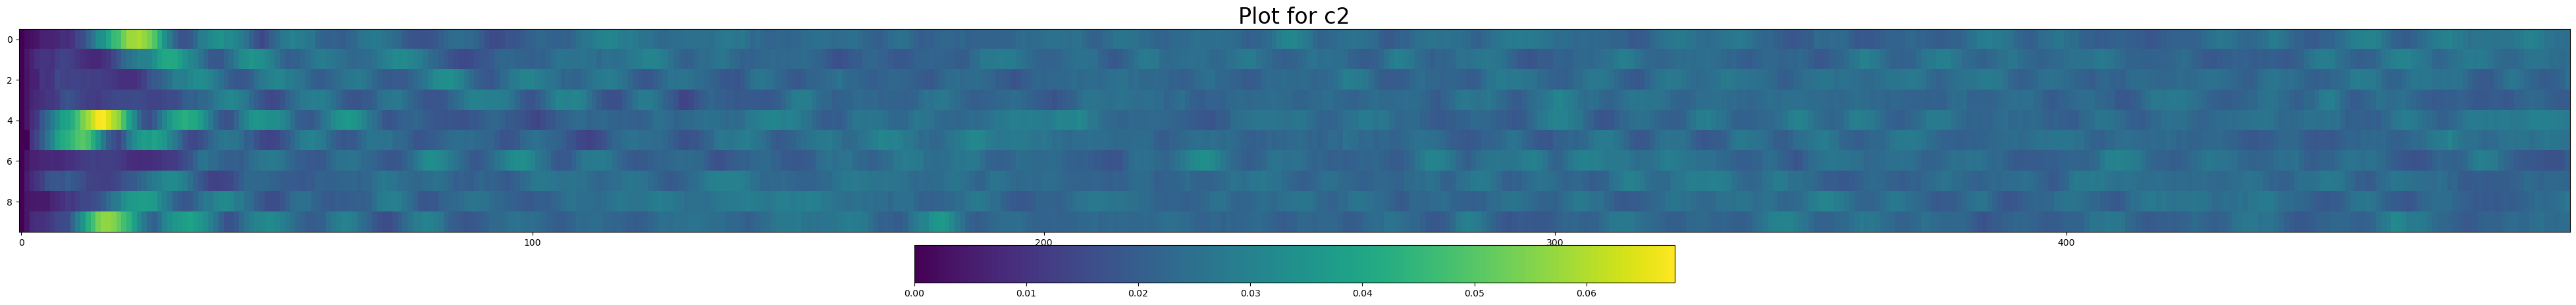

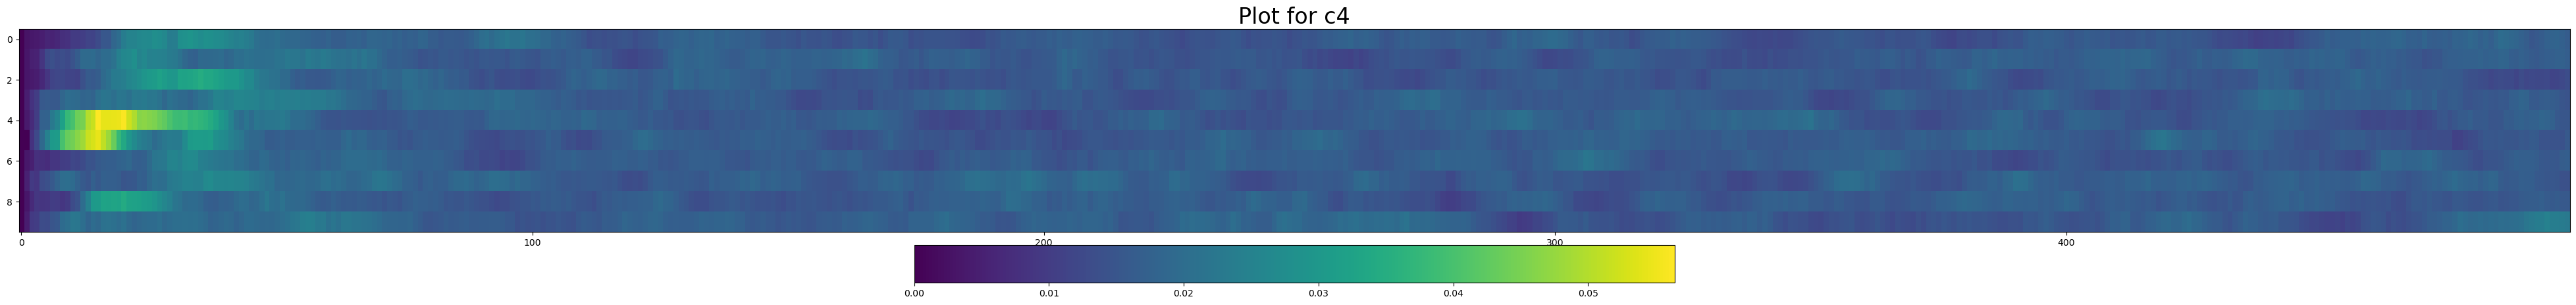

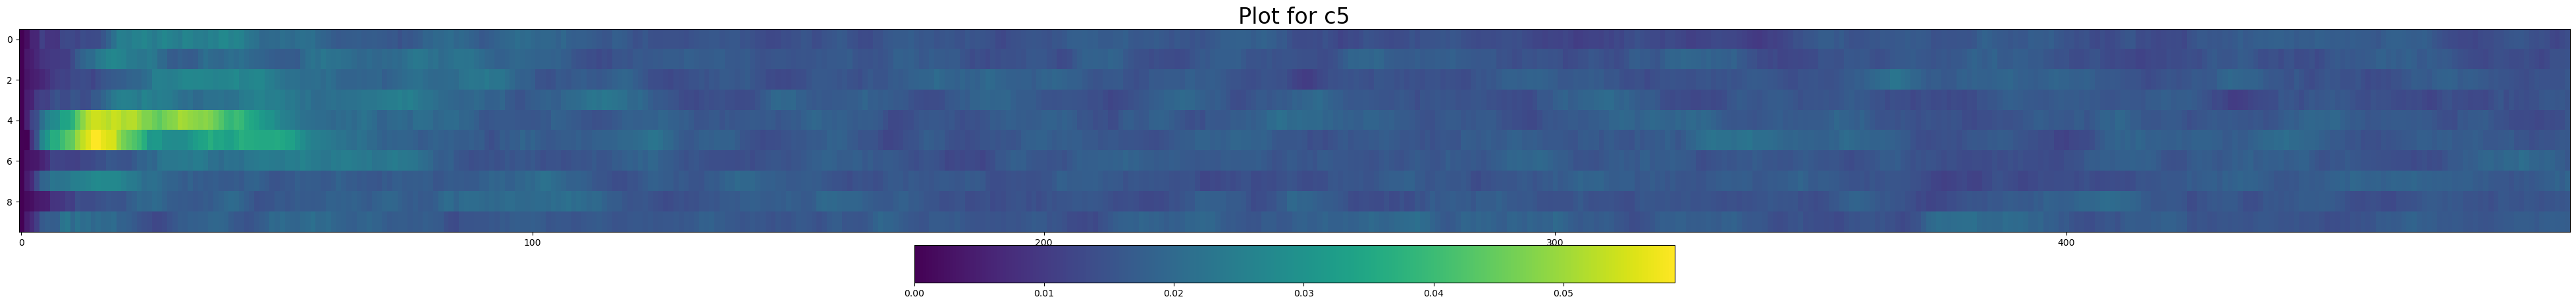

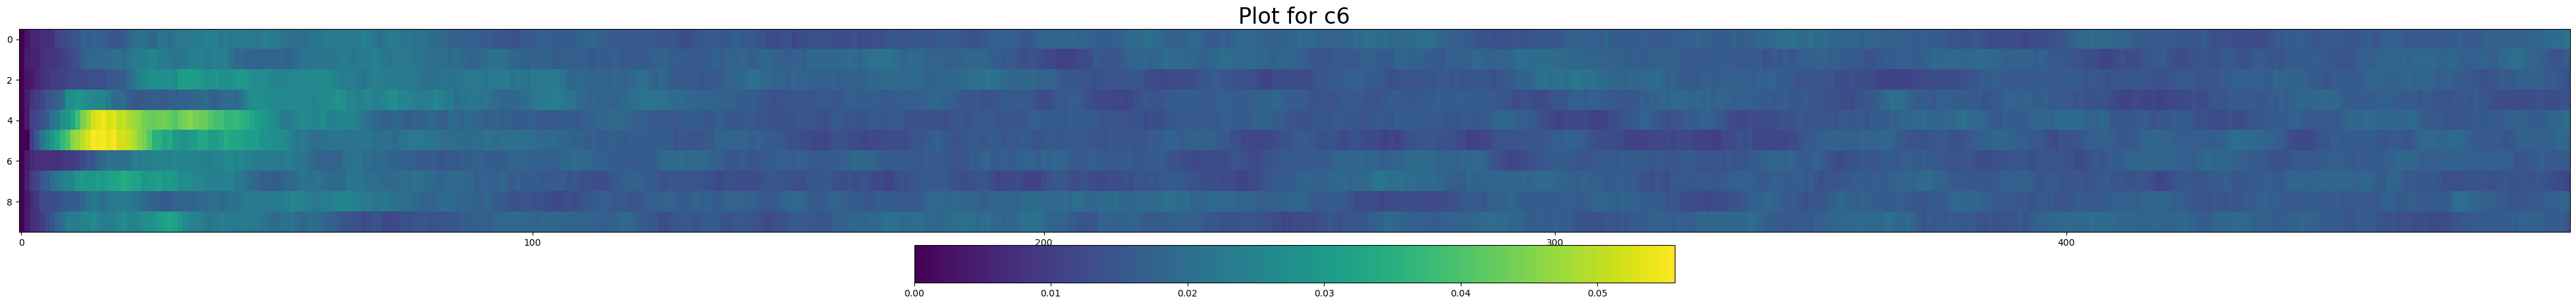

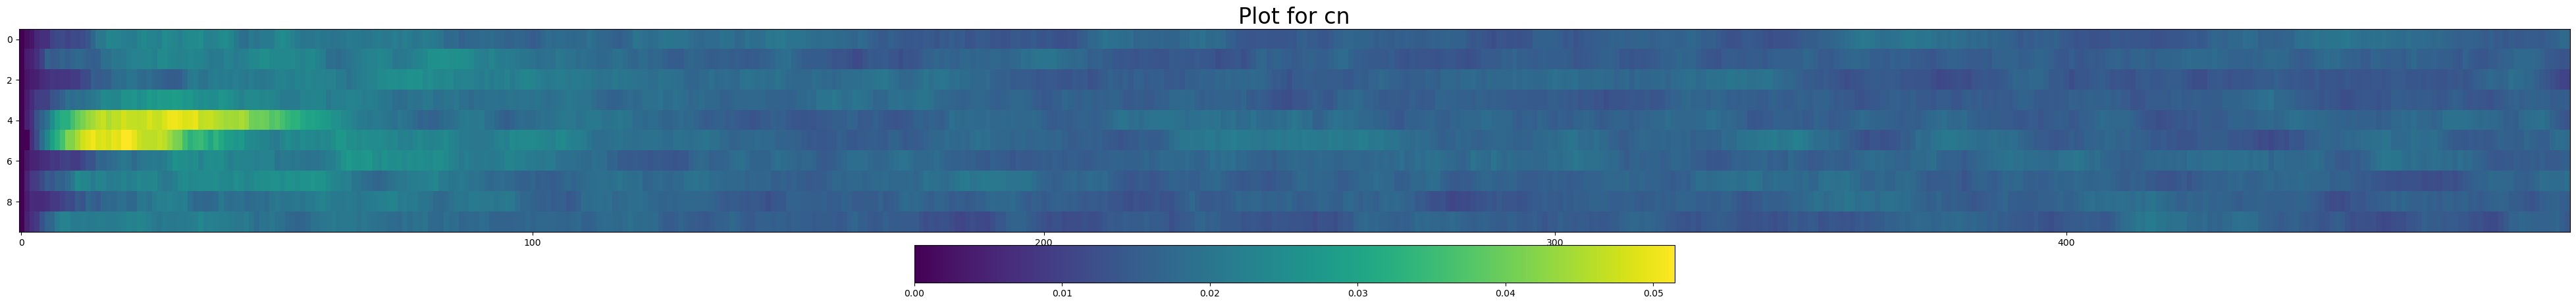

In [101]:
vmin = min  # Replace with your desired minimum value
vmax = max  # Replace with your desired maximum value
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)

dataset_names = ['c2', 'c4', 'c5', 'c6', 'cn']  # Names corresponding to each dataset
datas=[pops_random_c2,pops_random_c4,pops_random_c5,pops_random_c6,pops_random_cn]


for pops,conn in zip(datas, dataset_names):
    es_evg = ensemble_averaged_one_point_measures_mean_std(pops)

    # Create a new figure with a specified size
    plt.figure(figsize=(50, 5))  # Adjust as necessary
    
    # Rotate the data by 90 degrees counterclockwise
    rotated_data = np.rot90(es_evg[1][0:499])

    # Display the rotated data
    img = plt.imshow(rotated_data, interpolation='none', aspect='auto')

    # Add a colorbar
    cbar = plt.colorbar(img, orientation='horizontal', pad=0.05)
    cbar.ax.tick_params(labelsize=10)  # Set colorbar tick label size

    plt.title(f'Plot for {conn}', fontsize=24)  # Optional: Add a title for clarity
    plt.savefig(f'Ensemble averaged stds population swatch of network {num}q_conn_{conn}_rule_R1_{dataset_label}.pdf', format='pdf', bbox_inches='tight')
    plt.show()

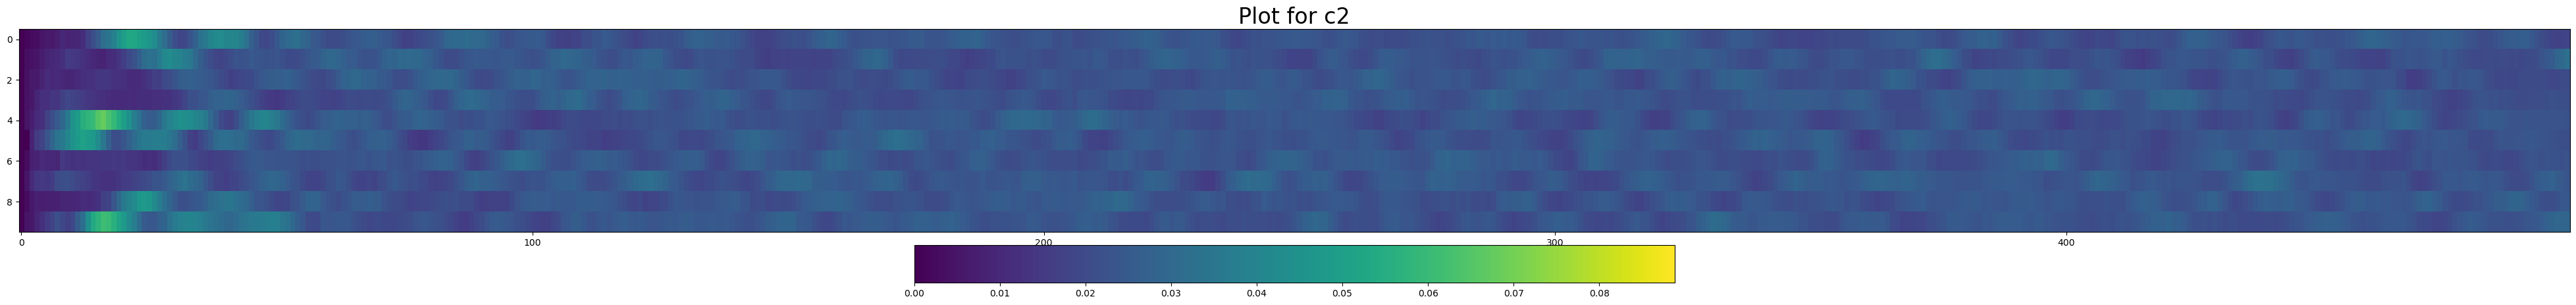

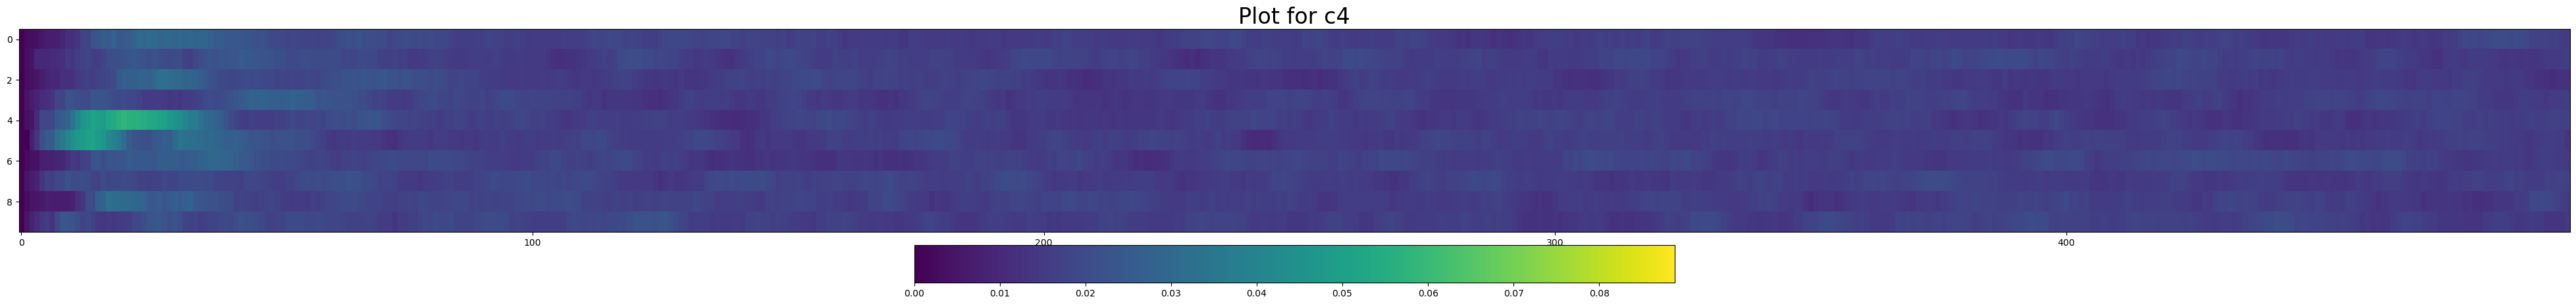

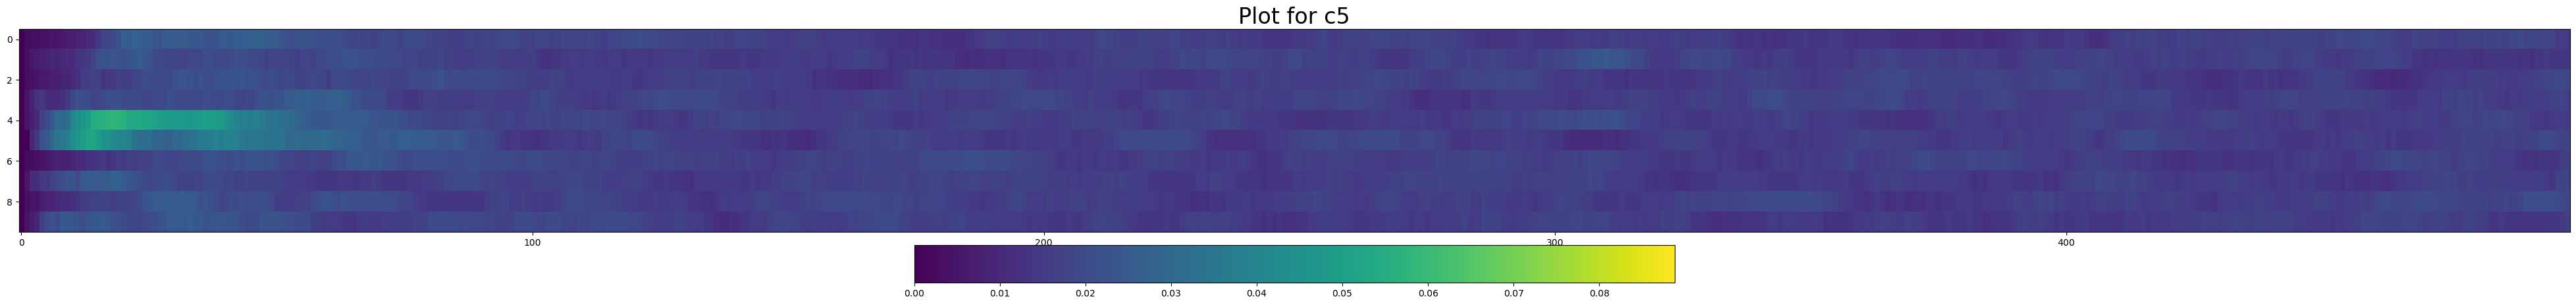

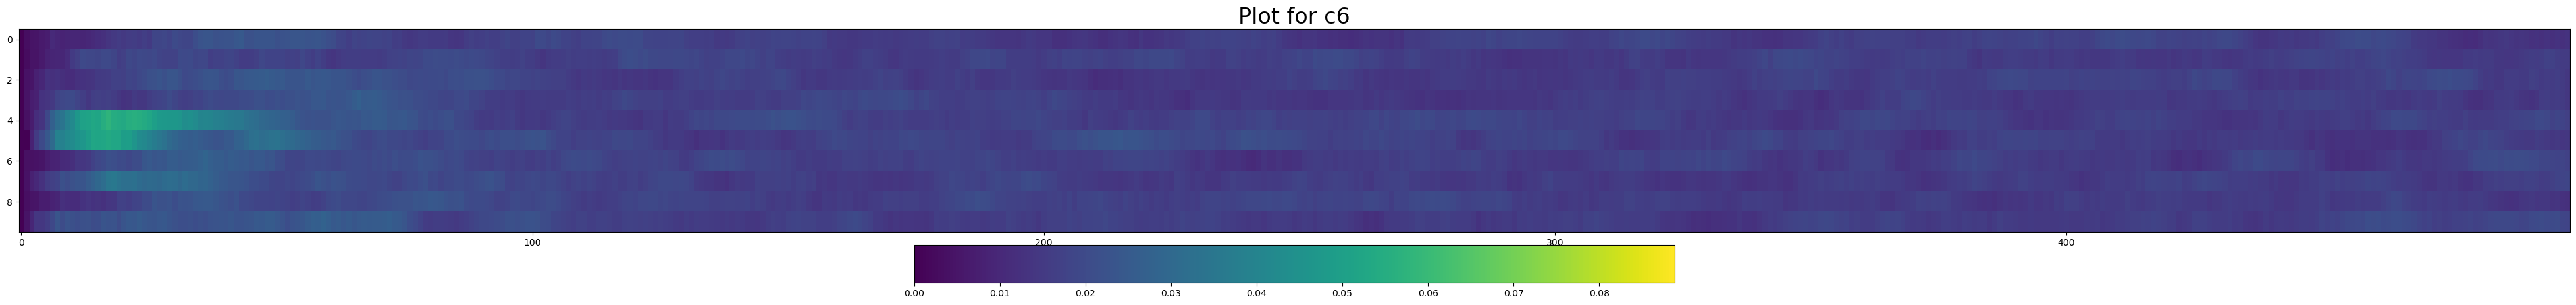

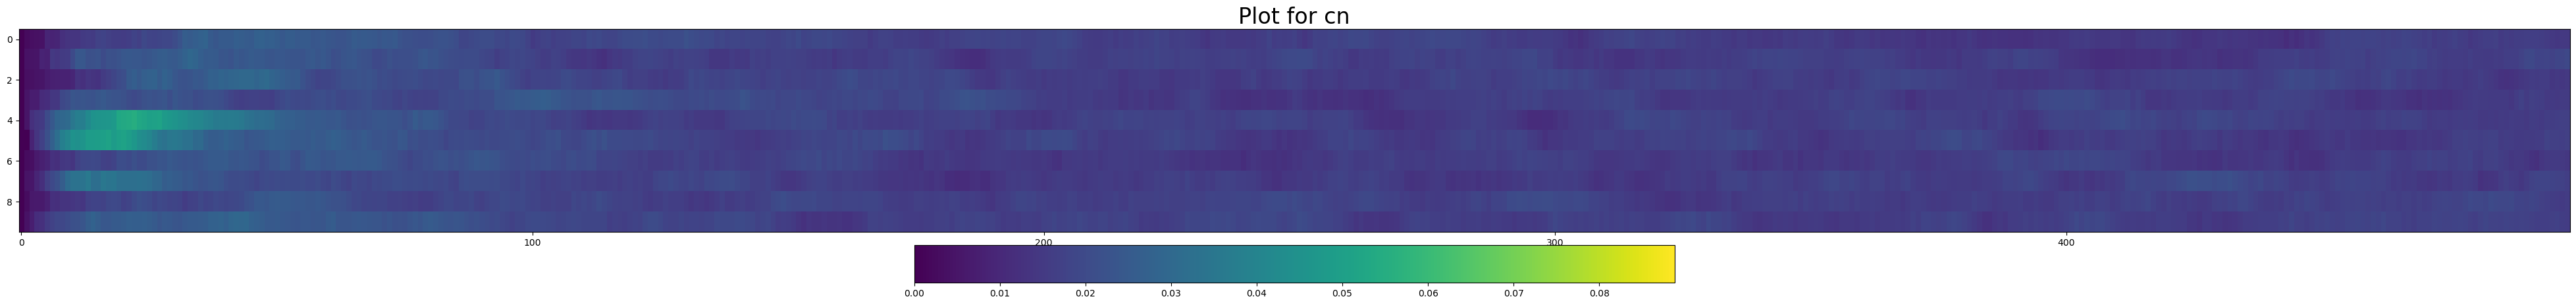

In [102]:
vmin = min  # Replace with your desired minimum value
vmax = max  # Replace with your desired maximum value
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)

dataset_names = ['c2', 'c4', 'c5', 'c6', 'cn']  # Names corresponding to each dataset
datas=[pops_greedy_c2,pops_greedy_c4,pops_greedy_c5,pops_greedy_c6,pops_greedy_cn]


for pops,conn in zip(datas, dataset_names):
    es_evg = ensemble_averaged_one_point_measures_mean_std(pops)

    # Create a new figure with a specified size
    plt.figure(figsize=(50, 5))  # Adjust as necessary
    
    # Rotate the data by 90 degrees counterclockwise
    rotated_data = np.rot90(es_evg[1][0:499])

    # Display the rotated data
    img = plt.imshow(rotated_data, interpolation='none',norm=norm, aspect='auto')

    # Add a colorbar
    cbar = plt.colorbar(img, orientation='horizontal', pad=0.05)
    cbar.ax.tick_params(labelsize=10)  # Set colorbar tick label size

    plt.title(f'Plot for {conn}', fontsize=24)  # Optional: Add a title for clarity
    plt.savefig(f'Ensemble averaged stds population swatch of network {num}q_conn_{conn}_rule_R2_{dataset_label}.pdf', format='pdf', bbox_inches='tight')

    plt.show()

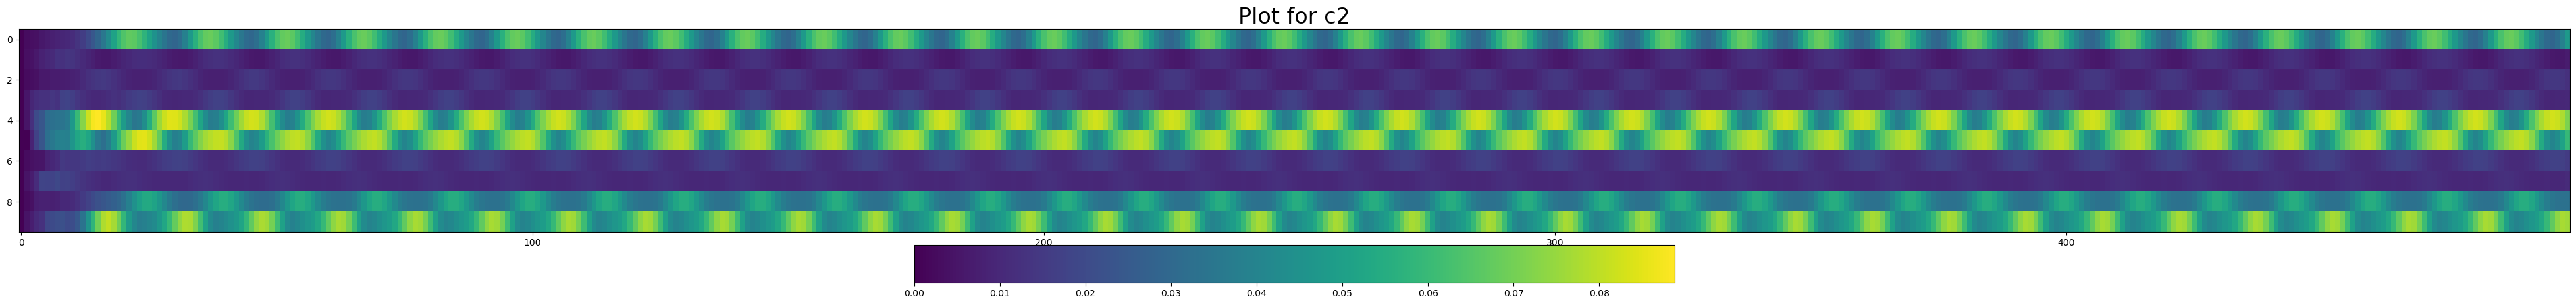

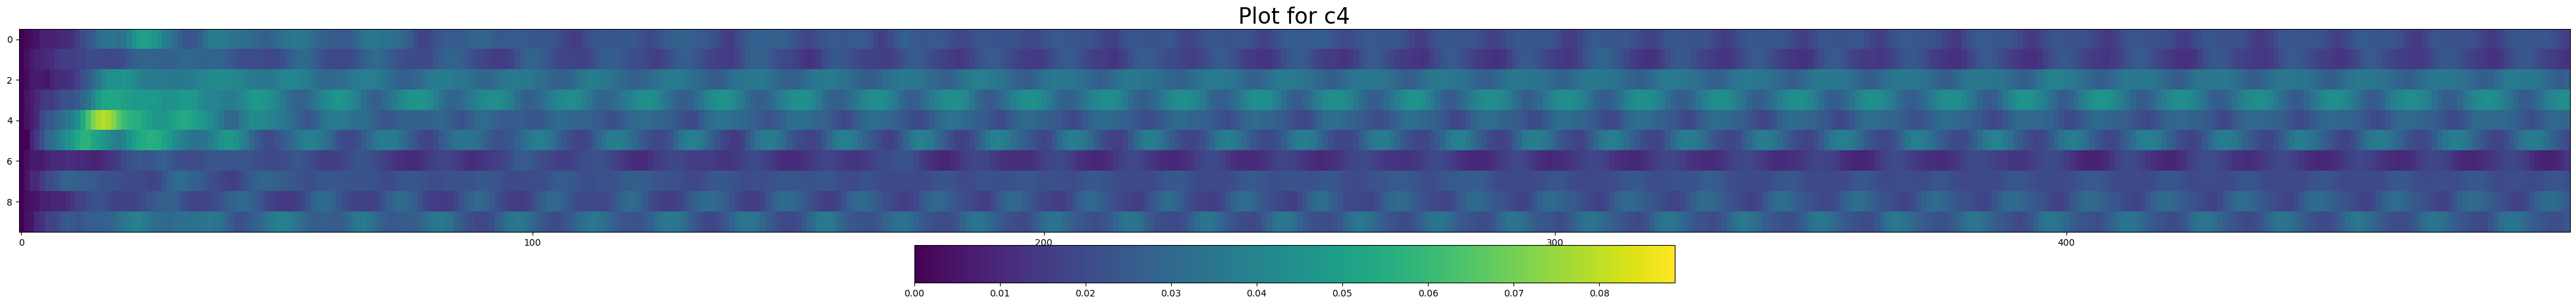

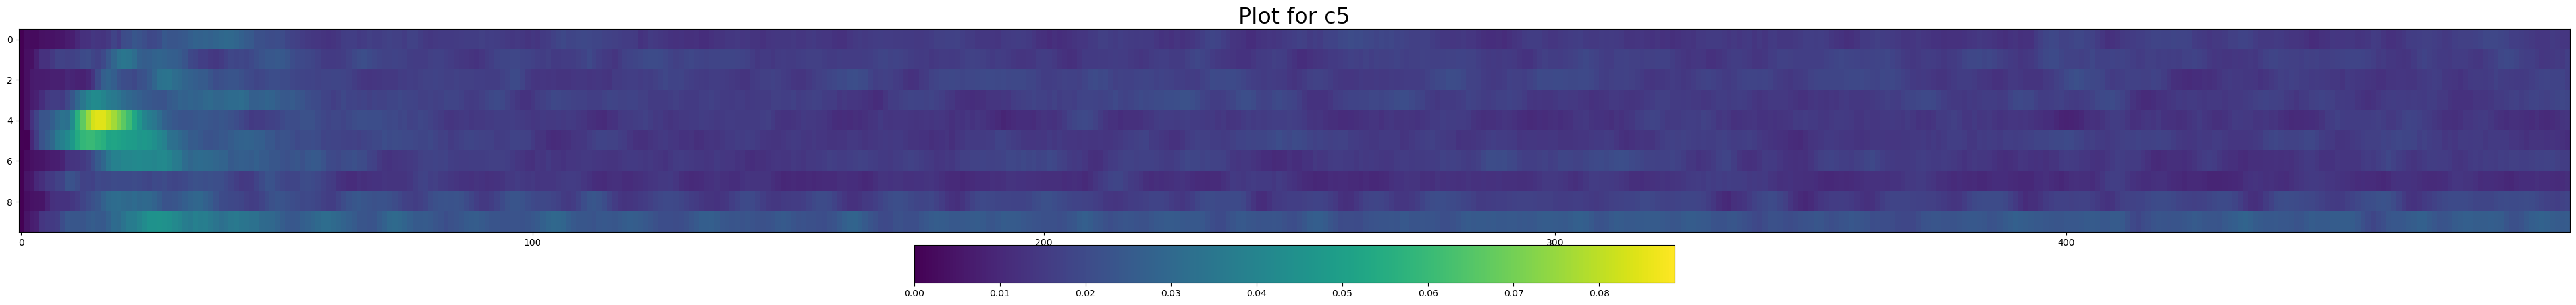

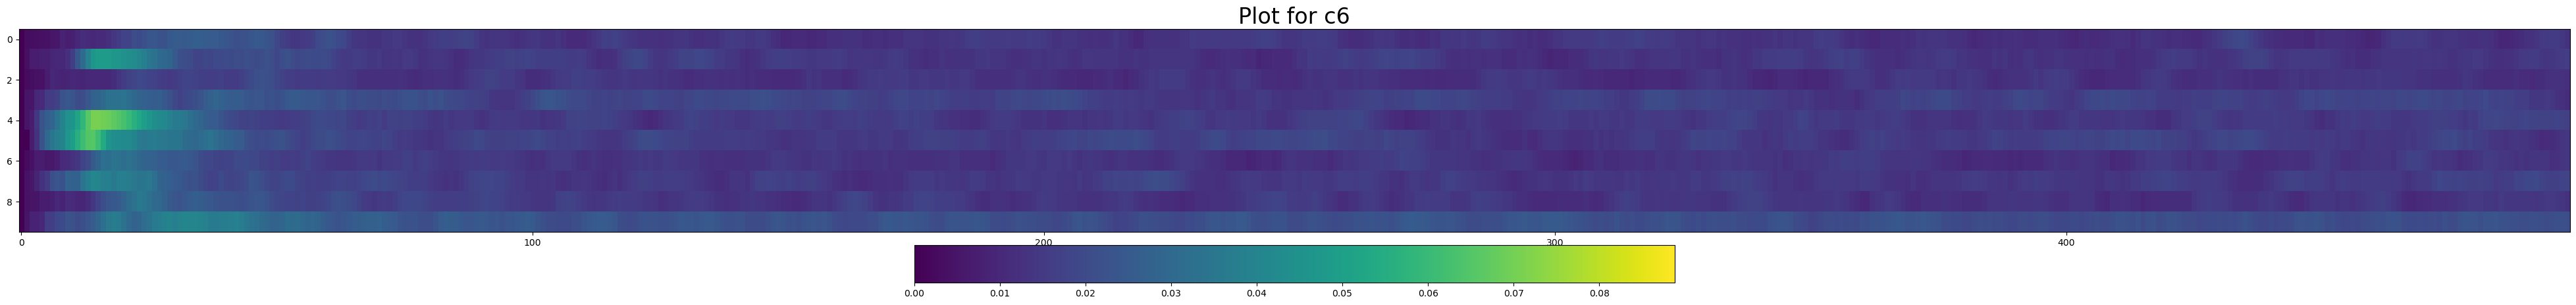

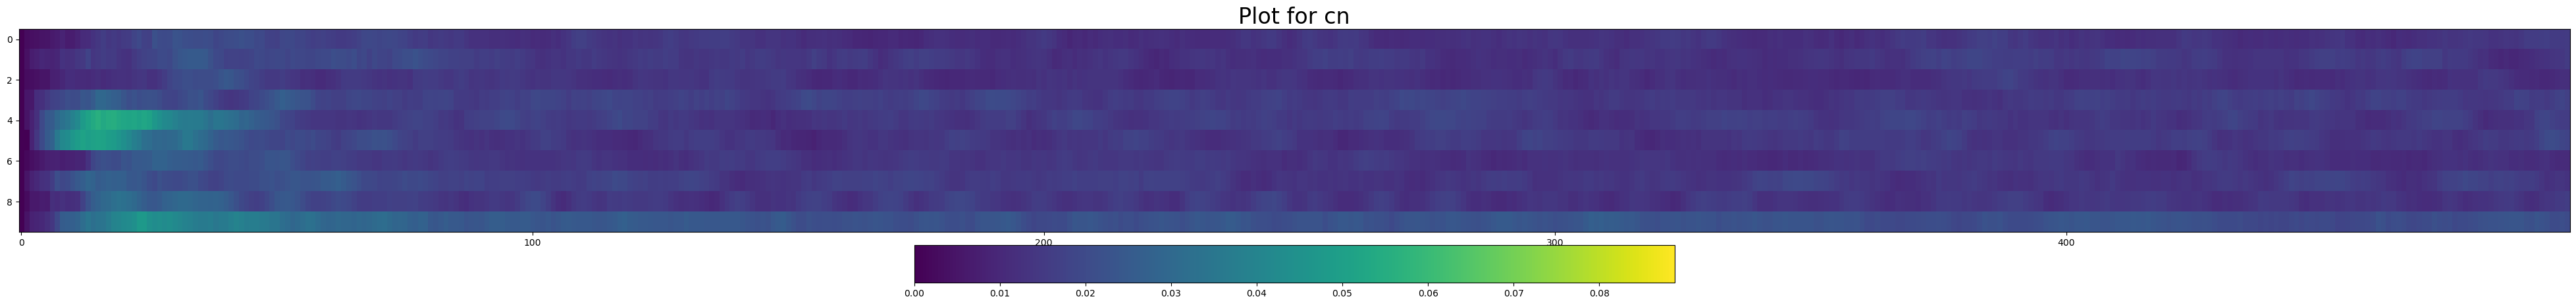

In [96]:
vmin = min  # Replace with your desired minimum value
vmax = max  # Replace with your desired maximum value
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)

dataset_names = ['c2', 'c4', 'c5', 'c6', 'cn']  # Names corresponding to each dataset
datas=[pops_mimic_c2,pops_mimic_c4,pops_mimic_c5,pops_mimic_c6,pops_mimic_cn]


for pops,conn in zip(datas, dataset_names):
    es_evg = ensemble_averaged_one_point_measures_mean_std(pops)
    # Create a new figure with a specified size
    plt.figure(figsize=(50, 5))  # Adjust as necessary
    
    # Rotate the data by 90 degrees counterclockwise
    rotated_data = np.rot90(es_evg[1][0:499])

    # Display the rotated data
    img = plt.imshow(rotated_data, interpolation='none', norm=norm, aspect='auto')

    # Add a colorbar
    cbar = plt.colorbar(img, orientation='horizontal', pad=0.05)
    cbar.ax.tick_params(labelsize=10)  # Set colorbar tick label size

    plt.title(f'Plot for {conn}', fontsize=24)  # Optional: Add a title for clarity
    plt.savefig(f'Ensemble averaged stds population swatch of network {num}q_conn_{conn}_rule_R3_{dataset_label}.pdf', format='pdf', bbox_inches='tight')

    plt.show()

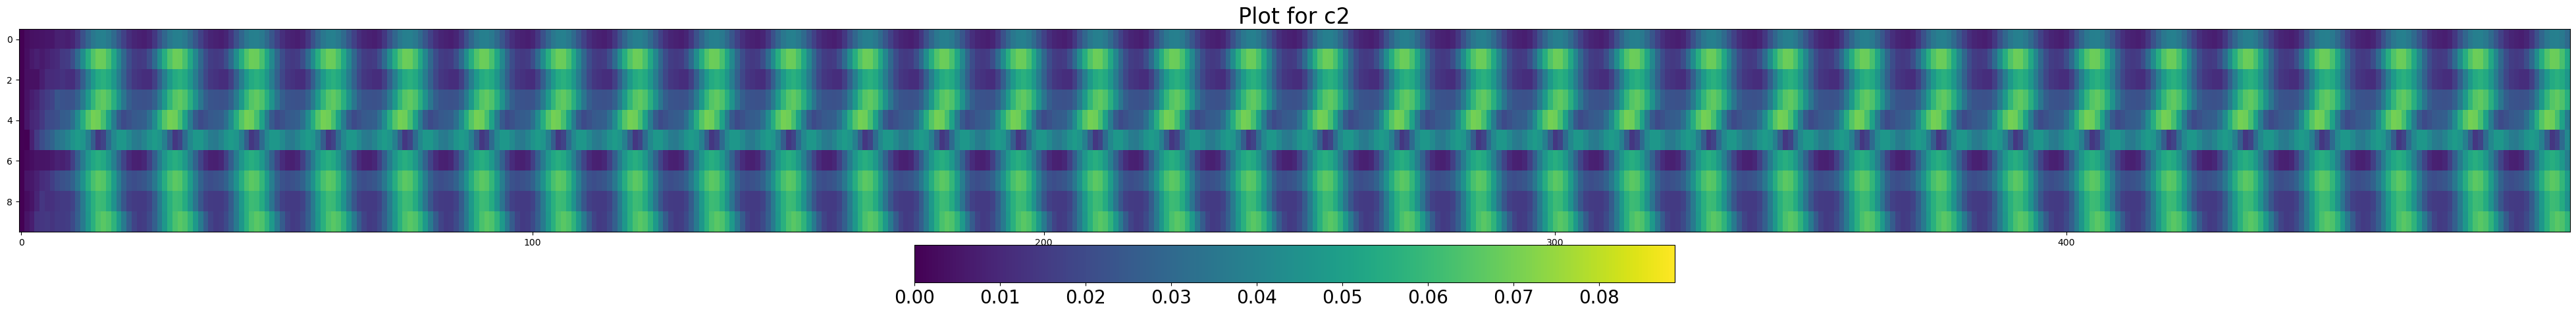

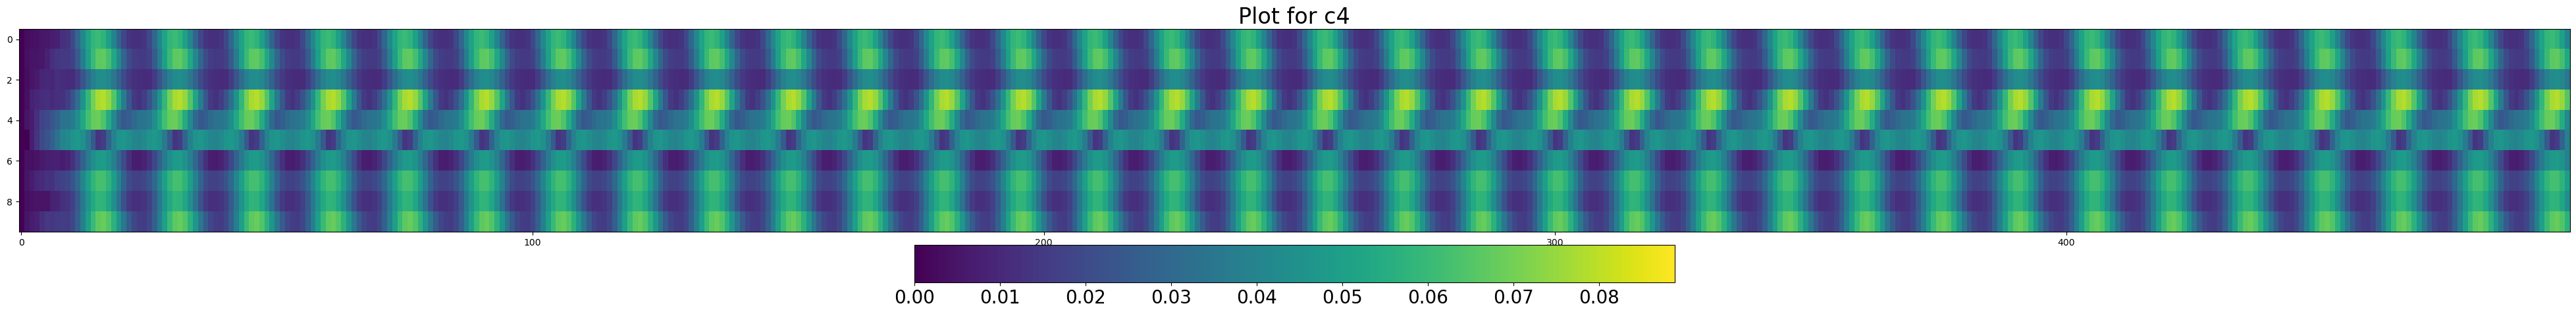

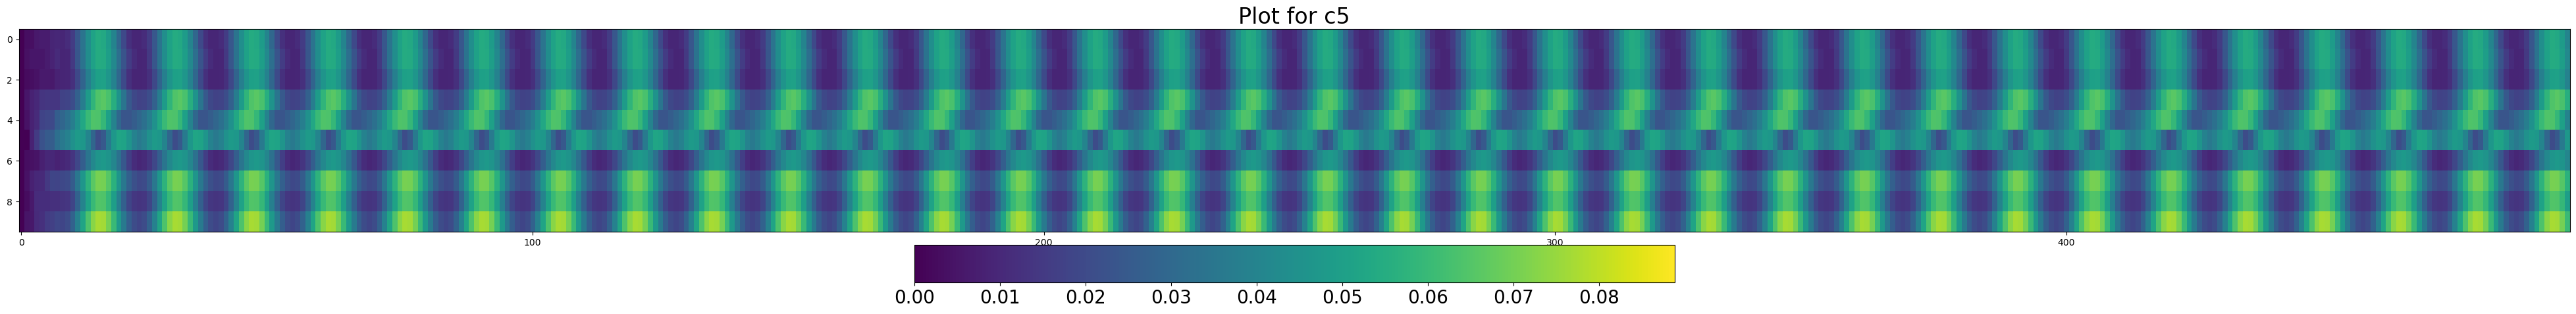

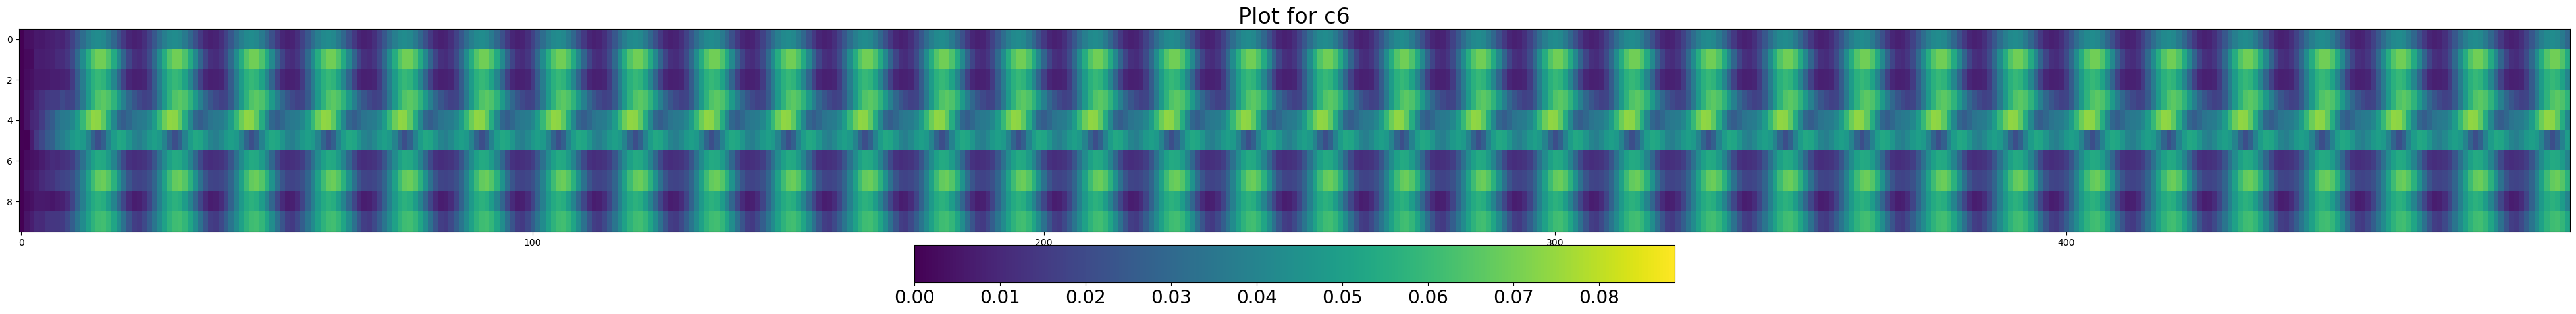

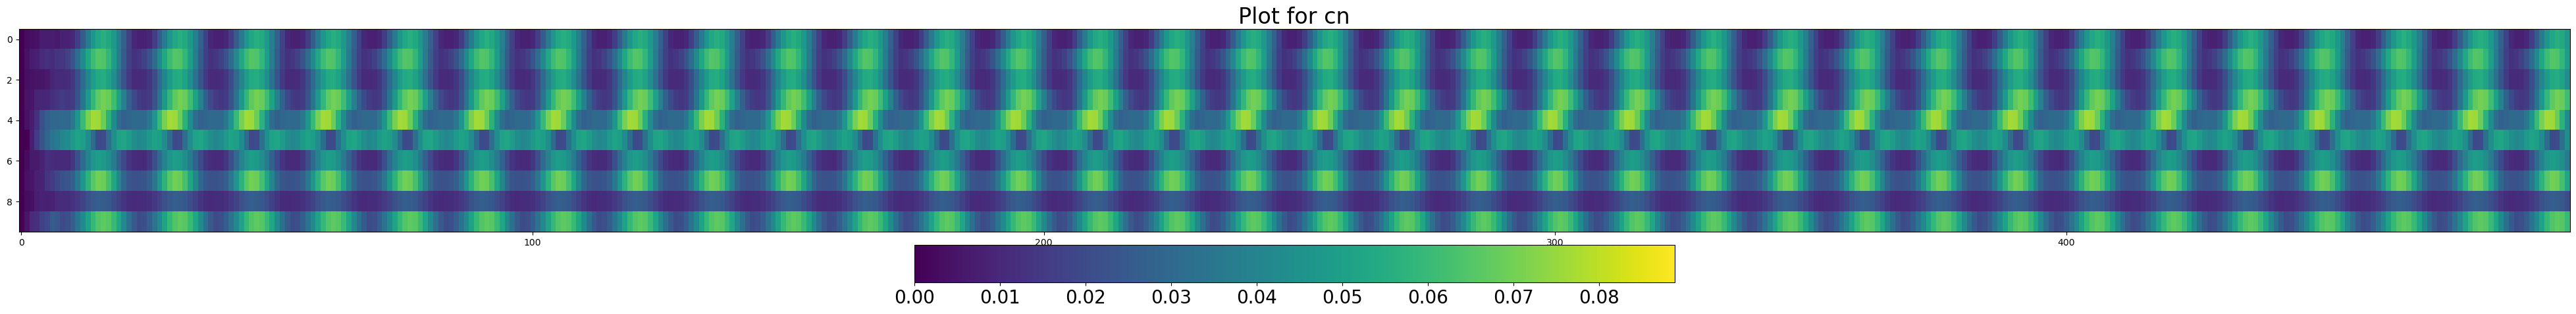

In [95]:
vmin =min  # Replace with your desired minimum value
vmax = max  # Replace with your desired maximum value
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)

dataset_names = ['c2', 'c4', 'c5', 'c6', 'cn']  # Names corresponding to each dataset
datas=[pops_landscape_maximizes_c2,pops_landscape_maximizes_c4,pops_landscape_maximizes_c5,pops_landscape_maximizes_c6,pops_landscape_maximizes_cn]


for pops,conn in zip(datas, dataset_names):
    es_evg = ensemble_averaged_one_point_measures_mean_std(pops)
    # Create a new figure with a specified size
    plt.figure(figsize=(50, 5))  # Adjust as necessary
    
    # Rotate the data by 90 degrees counterclockwise
    rotated_data = np.rot90(es_evg[1][0:499])

    # Display the rotated data
    img = plt.imshow(rotated_data, interpolation='none', norm=norm, aspect='auto')

    # Add a colorbar
    cbar = plt.colorbar(img, orientation='horizontal', pad=0.05)
    cbar.ax.tick_params(labelsize=20)  # Set colorbar tick label size

    plt.title(f'Plot for {conn}', fontsize=24)  # Optional: Add a title for clarity
    plt.savefig(f'Ensemble averaged stds population swatch of network {num}q_conn_{conn}_rule_R4_{dataset_label}.pdf', format='pdf', bbox_inches='tight')

    plt.show()

In [22]:
ytherm8= (7*0.1 + 0.4)/8
ytherm10=(9*0.1 + 0.4)/10
ytherm12=(11*0.1 + 0.4)/12
ytherm14=(13*0.1 + 0.4)/14

ypure8=(7*0 + 1)/8
ypure10=(9*0 + 1)/10
ypure12=(11*0 + 1)/12
ypure14=(13*0 + 1)/14

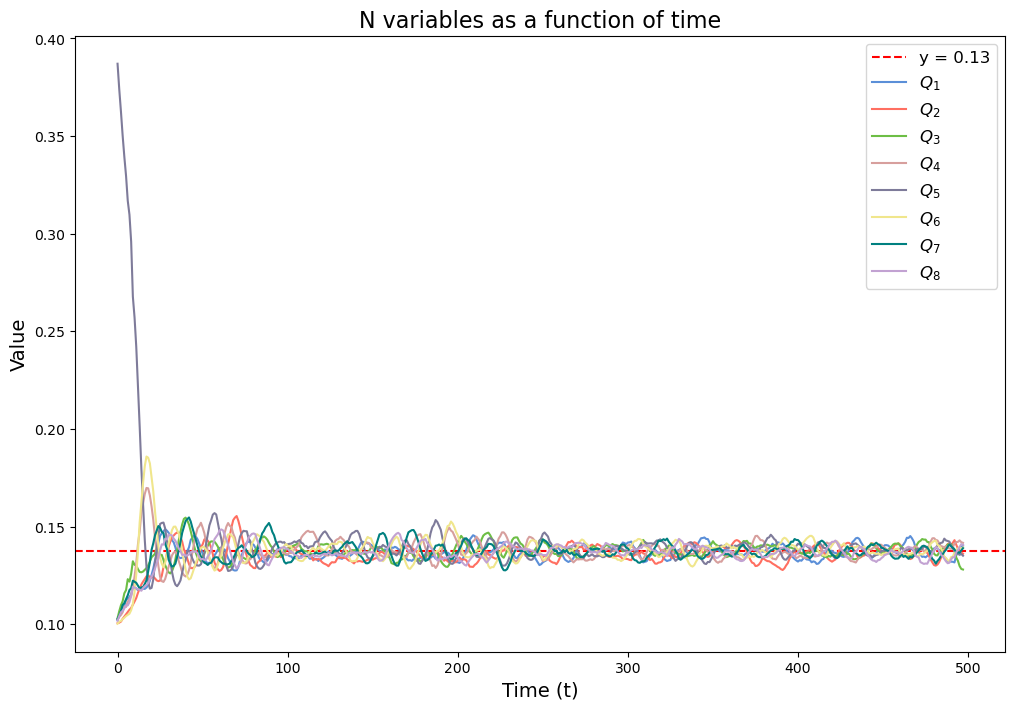

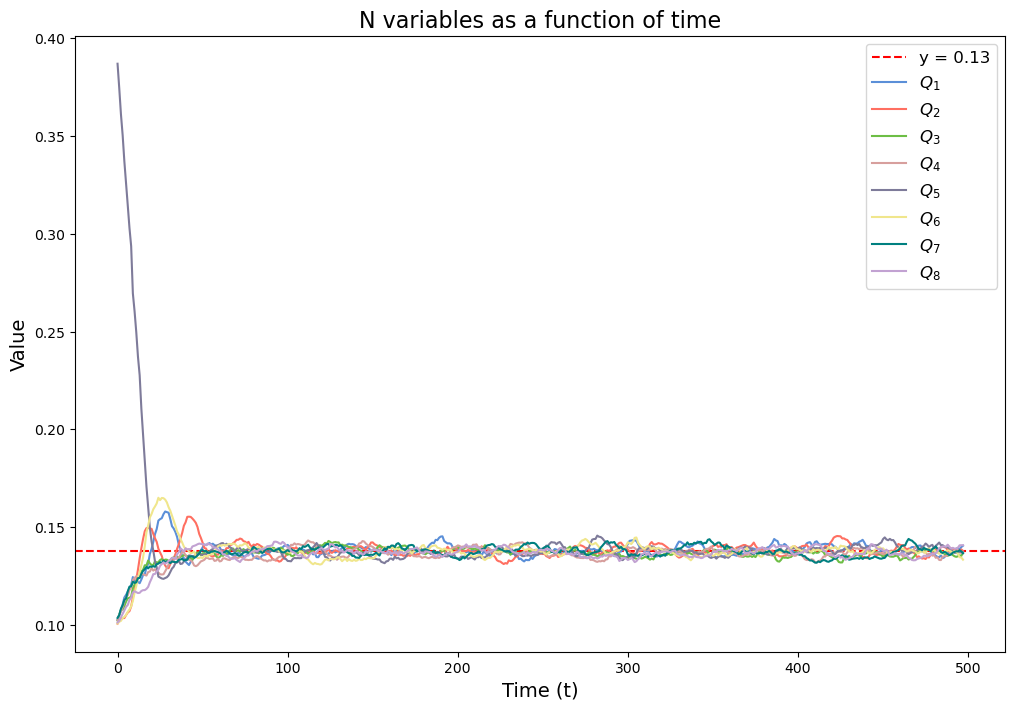

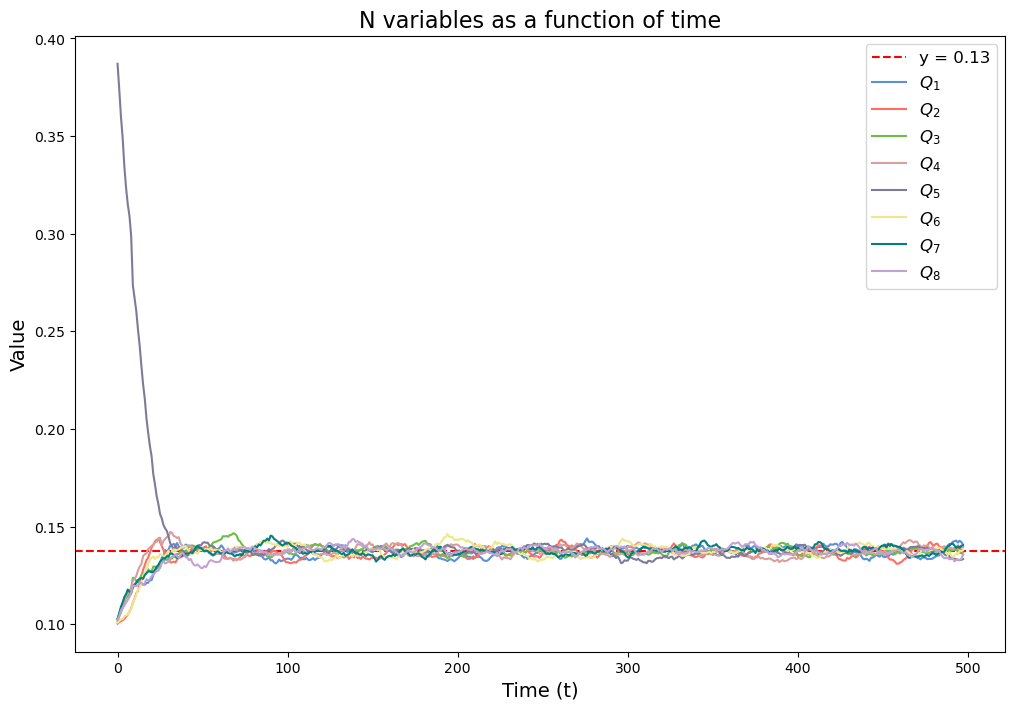

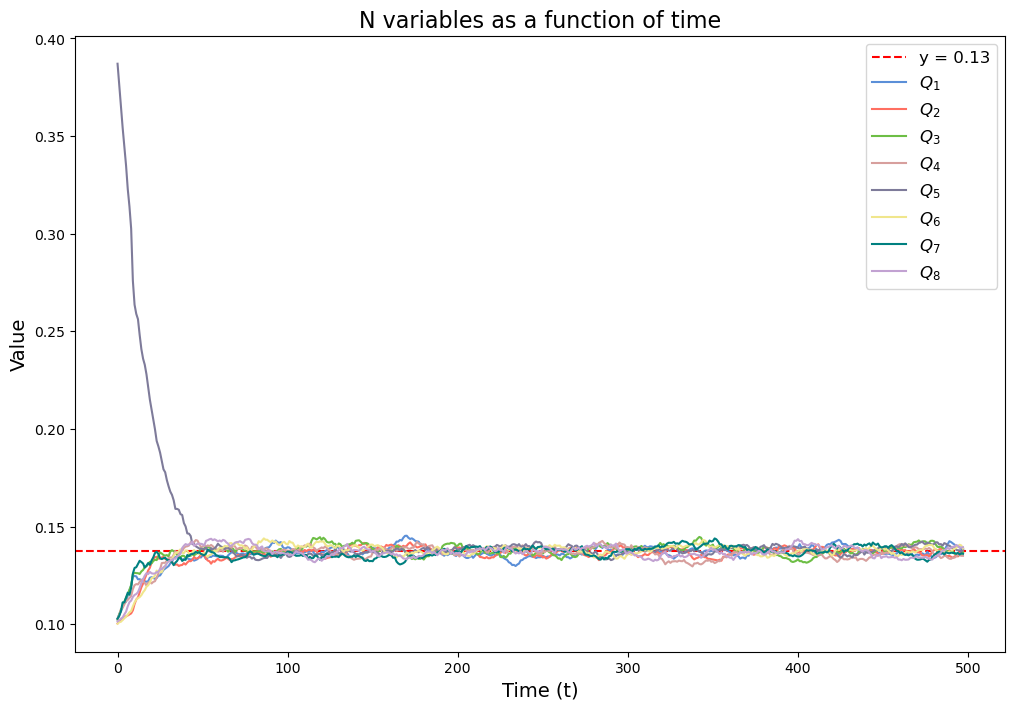

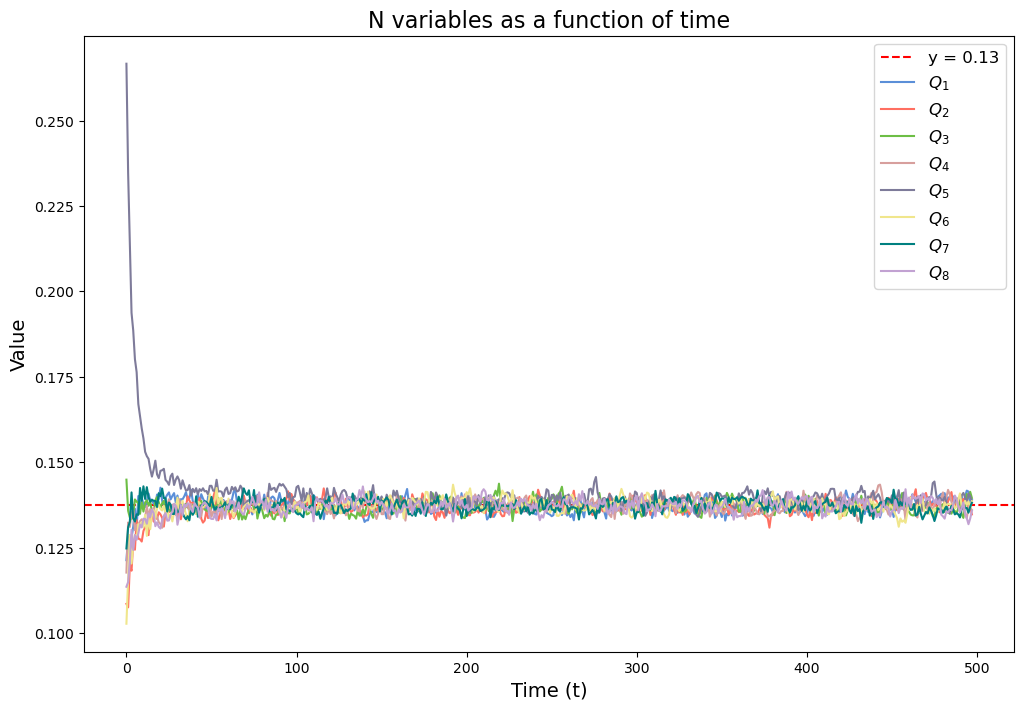

In [30]:
#random
# Define a list of colors (you can choose any color names or hex codes)
#for 8Q
#colors = ['#5B8FD8', '#FF6F61', '#6DBE45', '#D79F9D', '#7E7B9A','#F0E68C', '#008080', '#C2A2D2']
#for 10 Q
colors = ['#5B8FD8', '#FF6F61', '#6DBE45', '#D79F9D', '#7E7B9A','#F0E68C', '#008080', '#C2A2D2', '#D04E00', '#A8E6CF']
#for 12 Q
#colors = ['#5B8FD8', '#FF6F61', '#6DBE45', '#D79F9D', '#7E7B9A','#F0E68C', '#008080', '#C2A2D2', '#D04E00', '#A8E6CF','#FFDAB9', '#B2B09C']
#for 14Q
#colors = ['#5B8FD8', '#FF6F61', '#6DBE45', '#D79F9D', '#7E7B9A','#F0E68C', '#008080', '#C2A2D2', '#D04E00', '#A8E6CF','#FFDAB9', '#B2B09C', '#C4BEB5', '#8E7BBA']
dataset_names = ['c2', 'c4', 'c5', 'c6', 'cn']  # Names corresponding to each dataset
datas=[pops_random_c2,pops_random_c4,pops_random_c5,pops_random_c6,pops_random_cn]


for pops,conn in zip(datas, dataset_names):
    data = ensemble_averaged_one_point_measures_mean_std(pops)[0]
    num_time_steps = len(data)-2  # The number of rows in the data corresponds to the number of time steps
    t = np.arange(num_time_steps)  # Create a list of time steps [0, 1, 2, ..., num_time_steps-1]
    
    data=np.array(data[1:499])
    data_transposed = data.T  # Now rows are [x1_all_times, x2_all_times, ..., xN_all_times]
    
    plt.figure(figsize=(12, 8))
    #change this when analyzing pure dataset
    plt.axhline(y=ytherm8, color='r', linestyle='--', label=f'y = {ytherm10}')

    # Plot each number as a function of t with specified colors
    for i, y_values in enumerate(data_transposed):
        color = colors[i % len(colors)]  # Cycle through the color list
        plt.plot(t, y_values, label=f'$Q_{i+1}$', color=color)


    
    # Add labels and legend
    plt.xlabel('Time (t)',fontsize=14)
    plt.ylabel('Value',fontsize=14)
    plt.title('N variables as a function of time',fontsize=16)
    plt.legend(fontsize=12)
    
    # Show the plot
    plt.savefig(f'Ensemble averaged mean population of network {num}q_conn_{conn}_rule_R1_{dataset_label}.pdf', format='pdf', bbox_inches='tight')

    plt.show()

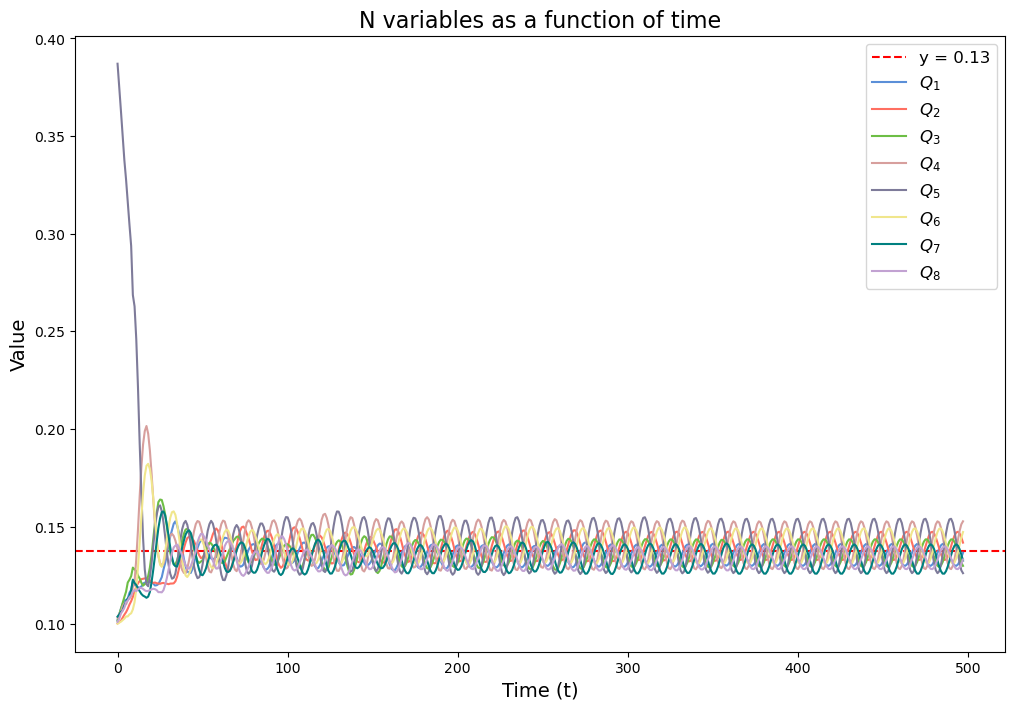

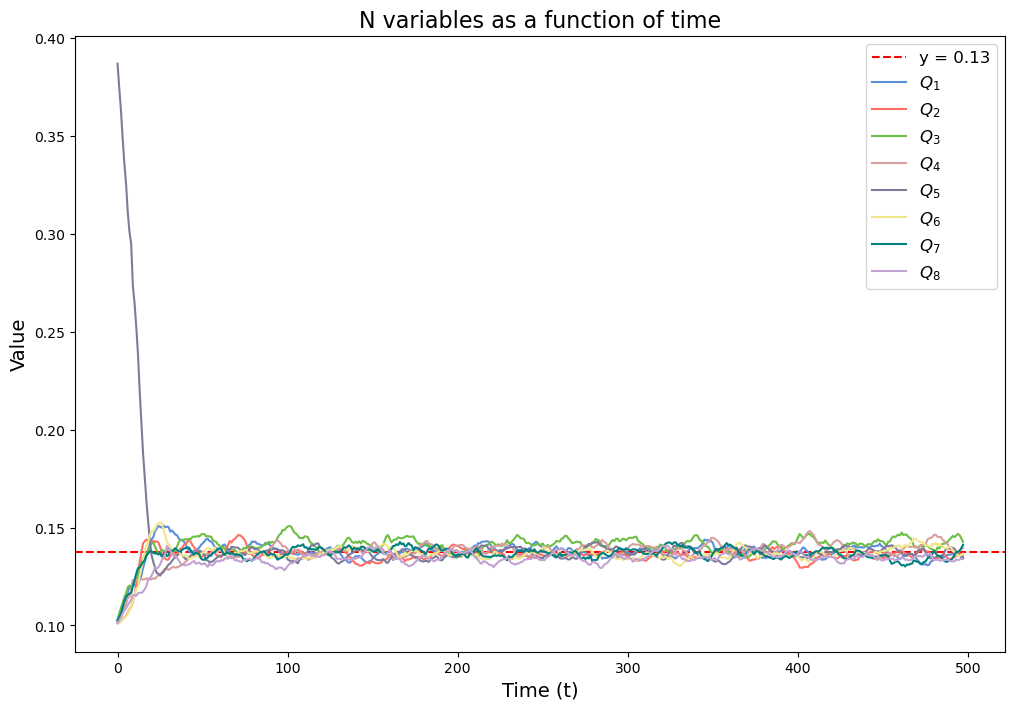

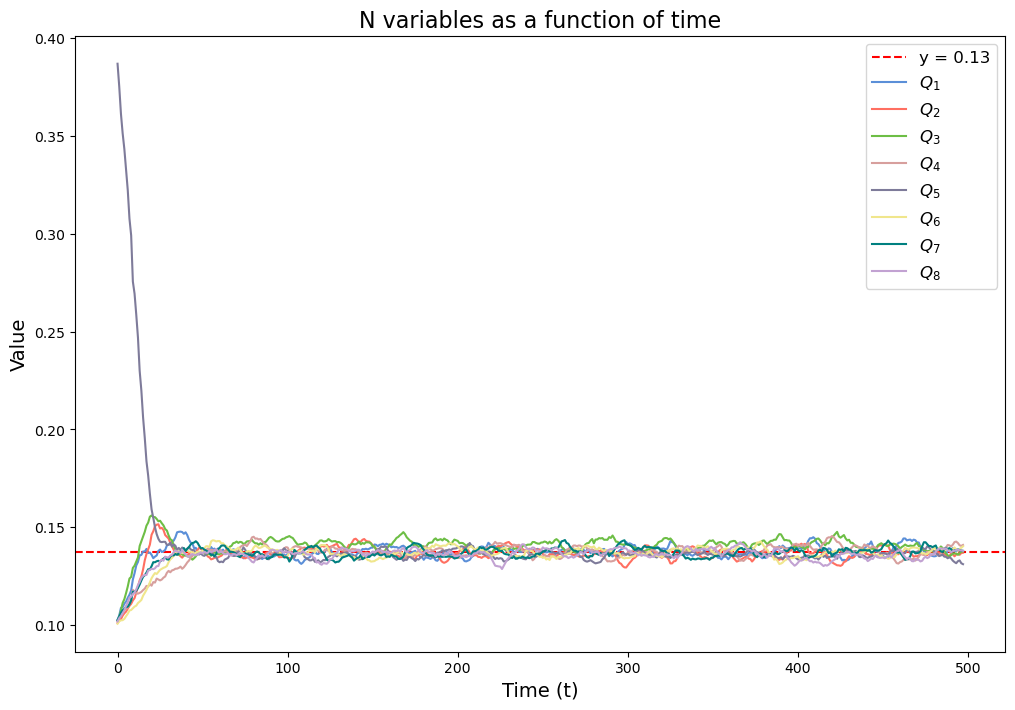

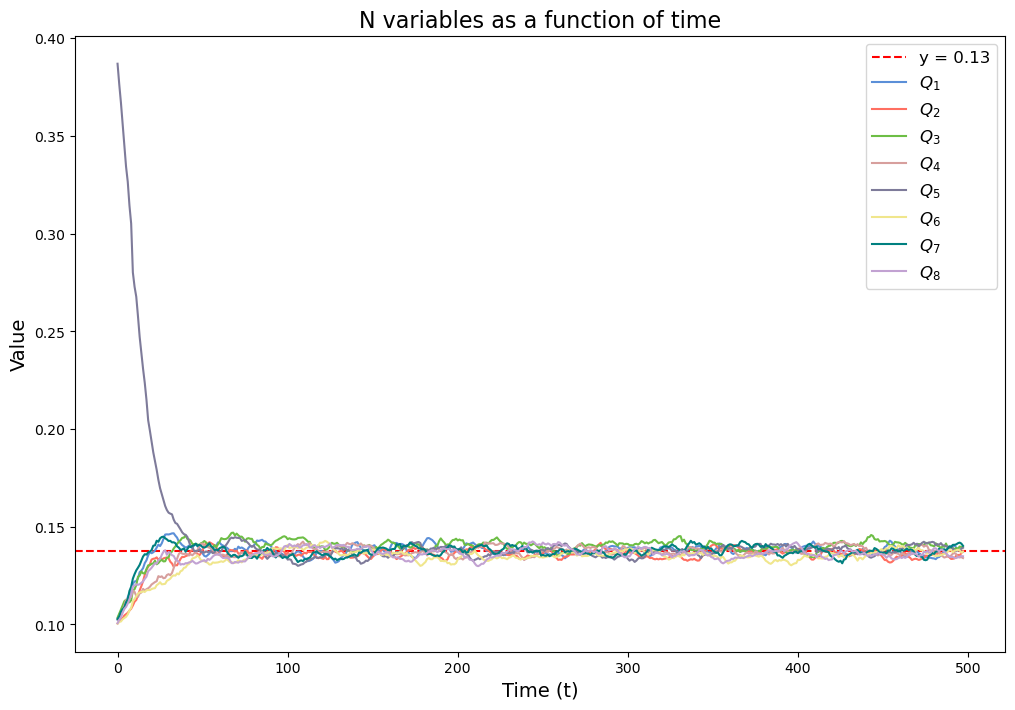

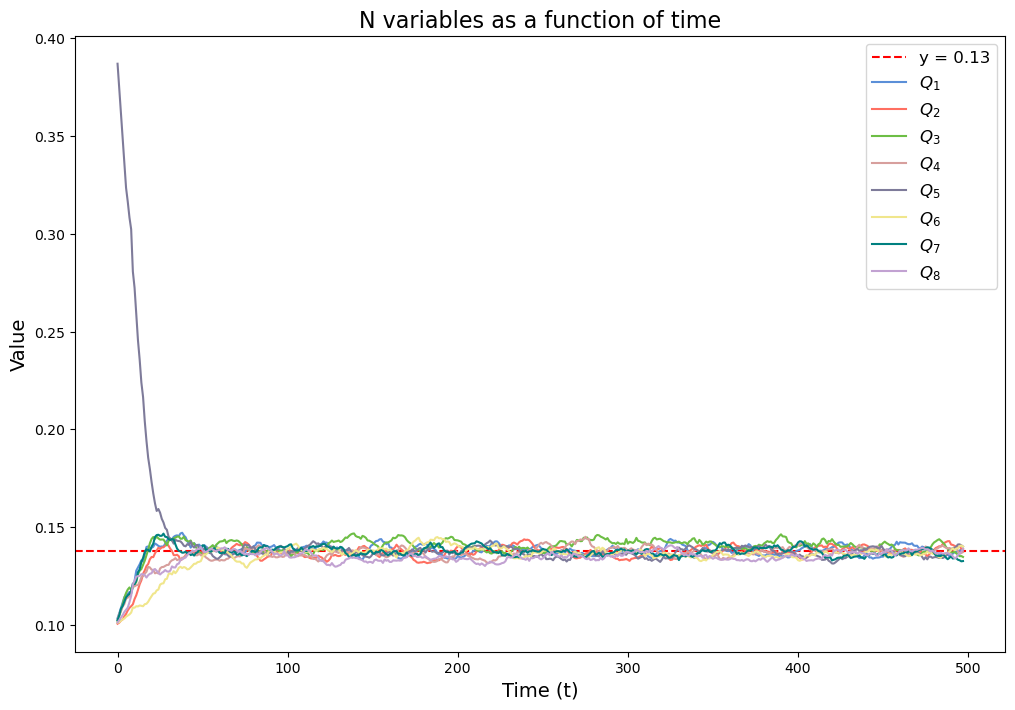

In [31]:
#greedy
# Define a list of colors (you can choose any color names or hex codes)
#for 8Q
#colors = ['#5B8FD8', '#FF6F61', '#6DBE45', '#D79F9D', '#7E7B9A','#F0E68C', '#008080', '#C2A2D2']
#for 10 Q
#colors = ['#5B8FD8', '#FF6F61', '#6DBE45', '#D79F9D', '#7E7B9A','#F0E68C', '#008080', '#C2A2D2', '#D04E00', '#A8E6CF']
#for 12 Q
#colors = ['#5B8FD8', '#FF6F61', '#6DBE45', '#D79F9D', '#7E7B9A','#F0E68C', '#008080', '#C2A2D2', '#D04E00', '#A8E6CF','#FFDAB9', '#B2B09C']
#for 14Q
#colors = ['#5B8FD8', '#FF6F61', '#6DBE45', '#D79F9D', '#7E7B9A','#F0E68C', '#008080', '#C2A2D2', '#D04E00', '#A8E6CF','#FFDAB9', '#B2B09C', '#C4BEB5', '#8E7BBA']
dataset_names = ['c2', 'c4', 'c5', 'c6', 'cn']  # Names corresponding to each dataset
datas=[pops_greedy_c2,pops_greedy_c4,pops_greedy_c5,pops_greedy_c6,pops_greedy_cn]


for pops,conn in zip(datas, dataset_names):
    data = ensemble_averaged_one_point_measures_mean_std(pops)[0]
    num_time_steps = len(data)-2  # The number of rows in the data corresponds to the number of time steps
    t = np.arange(num_time_steps)  # Create a list of time steps [0, 1, 2, ..., num_time_steps-1]
    
    data=np.array(data[1:499])
    data_transposed = data.T  # Now rows are [x1_all_times, x2_all_times, ..., xN_all_times]
    
    plt.figure(figsize=(12, 8))
    plt.axhline(y=ytherm8, color='r', linestyle='--', label=f'y = {ytherm10}')

    # Plot each number as a function of t with specified colors
    for i, y_values in enumerate(data_transposed):
        color = colors[i % len(colors)]  # Cycle through the color list
        plt.plot(t, y_values, label=f'$Q_{i+1}$', color=color)
    
    # Add labels and legend
    plt.xlabel('Time (t)',fontsize=14)
    plt.ylabel('Value',fontsize=14)
    plt.title('N variables as a function of time',fontsize=16)
    plt.legend(fontsize=12)
    
    # Show the plot
    plt.savefig(f'Ensemble averaged mean population of network {num}q_conn_{conn}_rule_R2_{dataset_label}.pdf', format='pdf', bbox_inches='tight')

    plt.show()

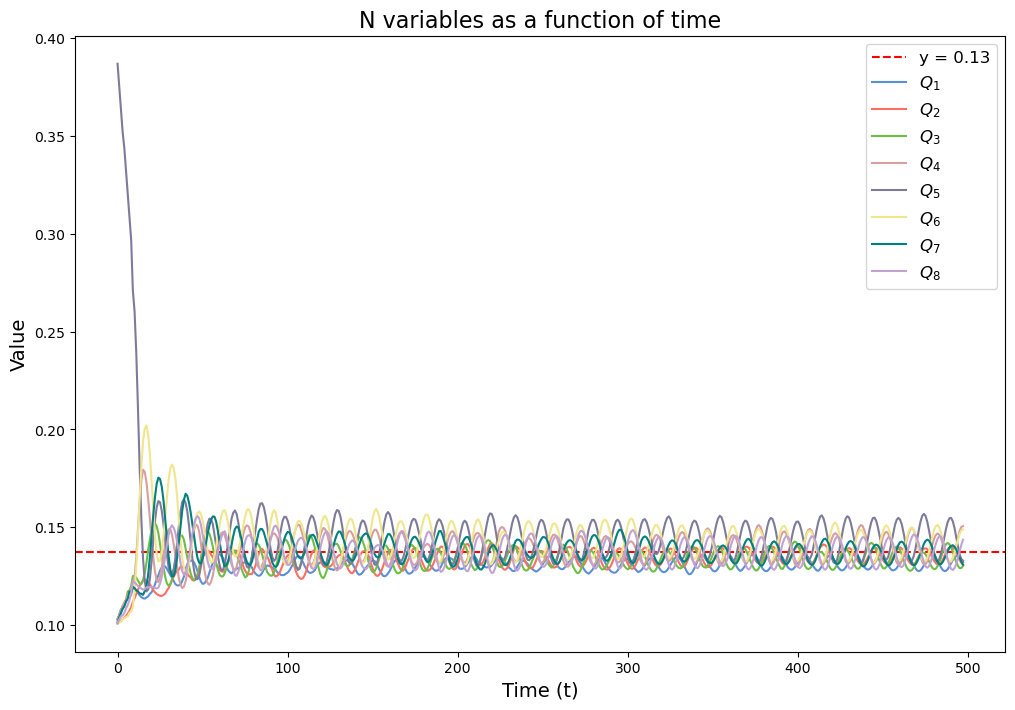

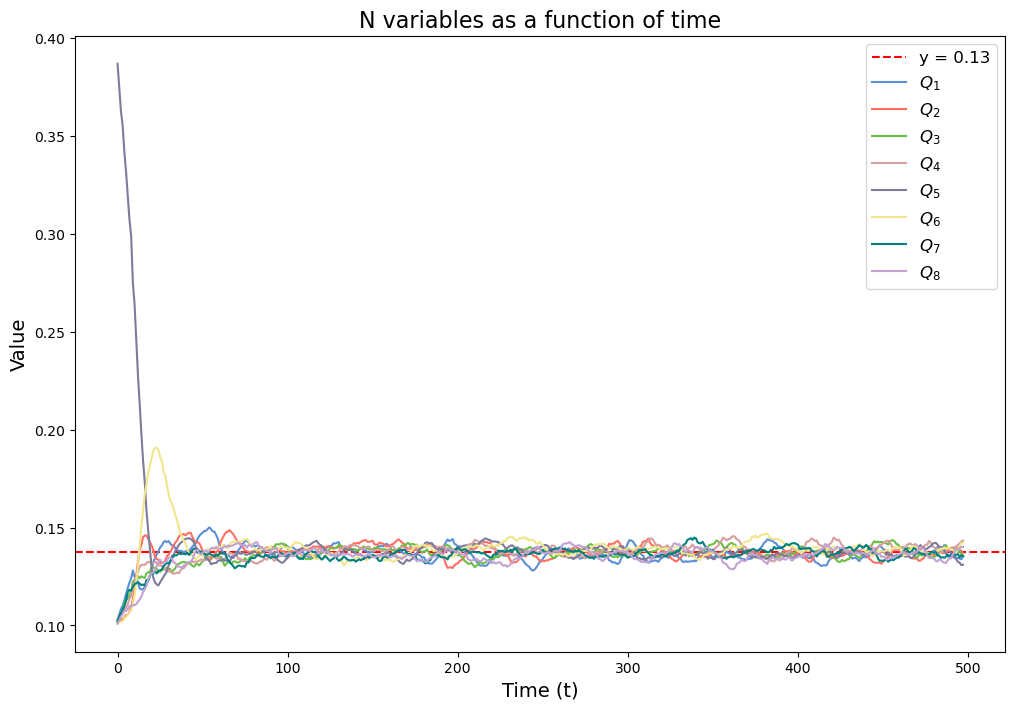

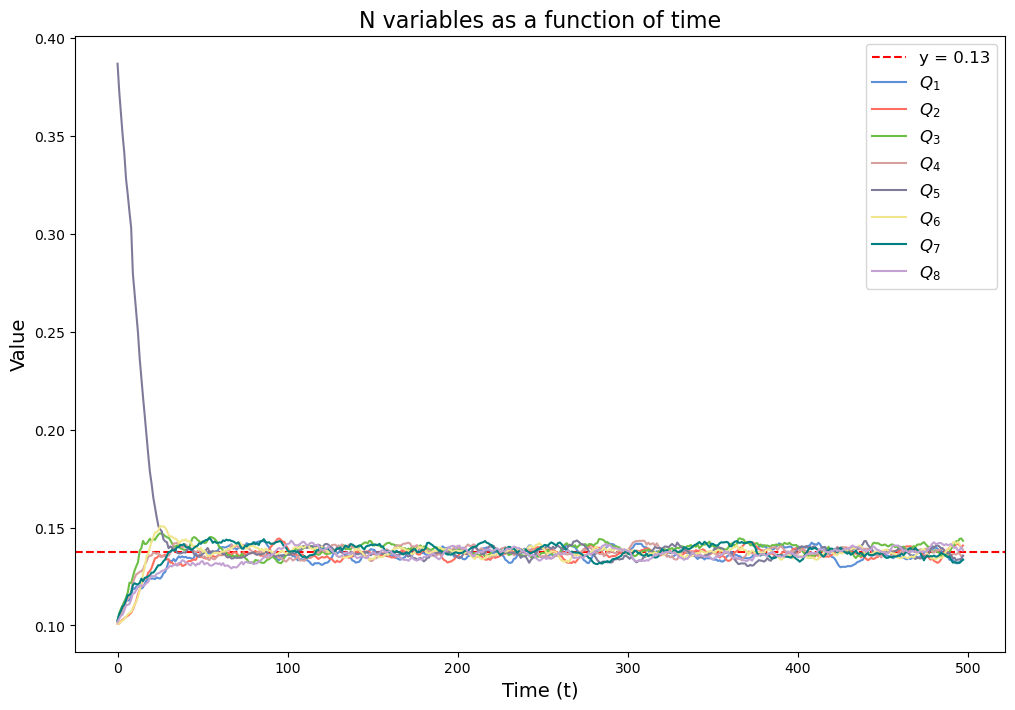

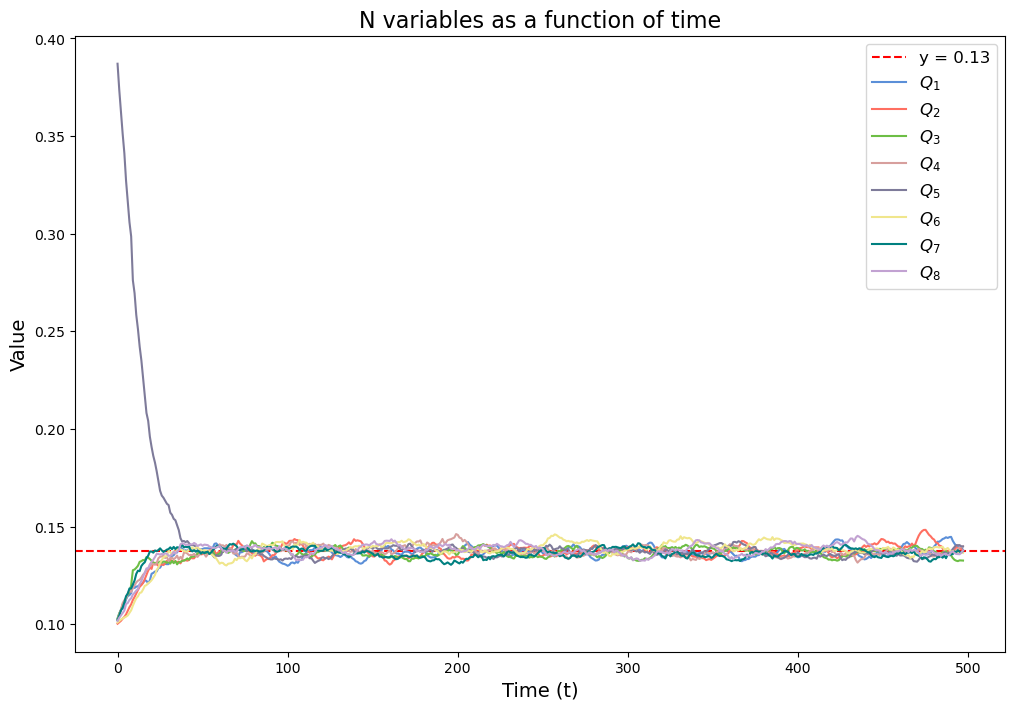

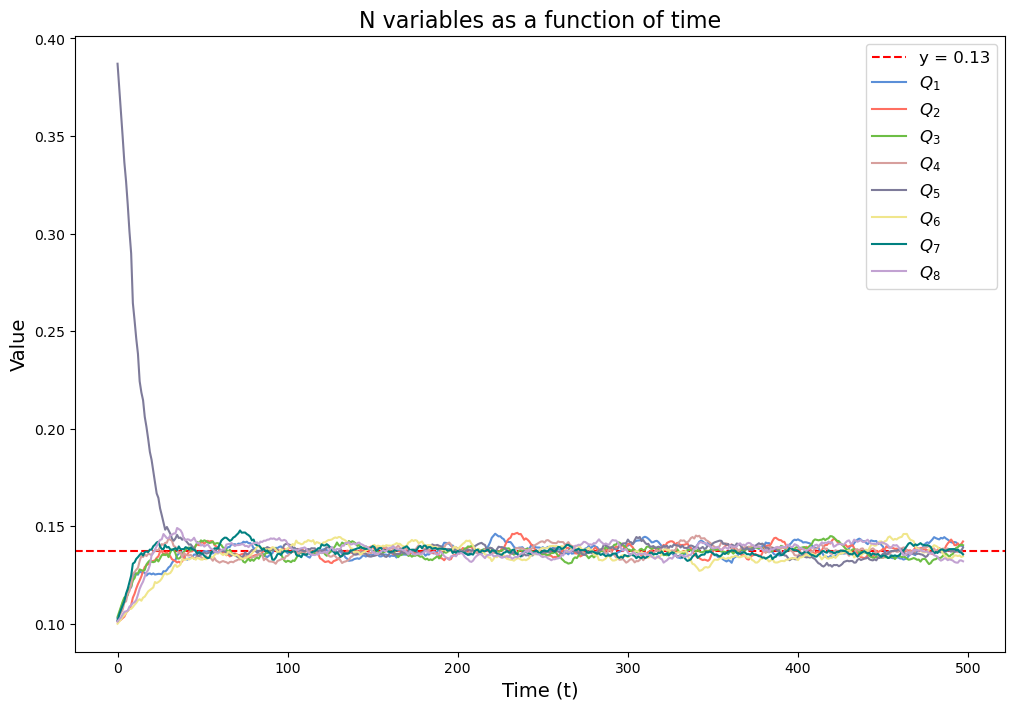

In [32]:
#mimic
# Define a list of colors (you can choose any color names or hex codes)
#for 8Q
#colors = ['#5B8FD8', '#FF6F61', '#6DBE45', '#D79F9D', '#7E7B9A','#F0E68C', '#008080', '#C2A2D2']
#for 10 Q
#colors = ['#5B8FD8', '#FF6F61', '#6DBE45', '#D79F9D', '#7E7B9A','#F0E68C', '#008080', '#C2A2D2', '#D04E00', '#A8E6CF']
#for 12 Q
#colors = ['#5B8FD8', '#FF6F61', '#6DBE45', '#D79F9D', '#7E7B9A','#F0E68C', '#008080', '#C2A2D2', '#D04E00', '#A8E6CF','#FFDAB9', '#B2B09C']
#for 14Q
#colors = ['#5B8FD8', '#FF6F61', '#6DBE45', '#D79F9D', '#7E7B9A','#F0E68C', '#008080', '#C2A2D2', '#D04E00', '#A8E6CF','#FFDAB9', '#B2B09C', '#C4BEB5', '#8E7BBA']
dataset_names = ['c2', 'c4', 'c5', 'c6', 'cn']  # Names corresponding to each dataset
datas=[pops_mimic_c2,pops_mimic_c4,pops_mimic_c5,pops_mimic_c6,pops_mimic_cn]


for pops,conn in zip(datas, dataset_names):
    data = ensemble_averaged_one_point_measures_mean_std(pops)[0]
    num_time_steps = len(data)-2  # The number of rows in the data corresponds to the number of time steps
    t = np.arange(num_time_steps)  # Create a list of time steps [0, 1, 2, ..., num_time_steps-1]
    
    data=np.array(data[1:499])
    data_transposed = data.T  # Now rows are [x1_all_times, x2_all_times, ..., xN_all_times]
    
    plt.figure(figsize=(12, 8))
    plt.axhline(y=ytherm8, color='r', linestyle='--', label=f'y = {ytherm10}')

    # Plot each number as a function of t with specified colors
    for i, y_values in enumerate(data_transposed):
        color = colors[i % len(colors)]  # Cycle through the color list
        plt.plot(t, y_values, label=f'$Q_{i+1}$', color=color)
    
    # Add labels and legend
    plt.xlabel('Time (t)',fontsize=14)
    plt.ylabel('Value',fontsize=14)
    plt.title('N variables as a function of time',fontsize=16)
    plt.legend(fontsize=12)
    
    # Show the plot
    plt.savefig(f'Ensemble averaged mean population of network {num}q_conn_{conn}_rule_R3_{dataset_label}.pdf', format='pdf', bbox_inches='tight')
    plt.show()

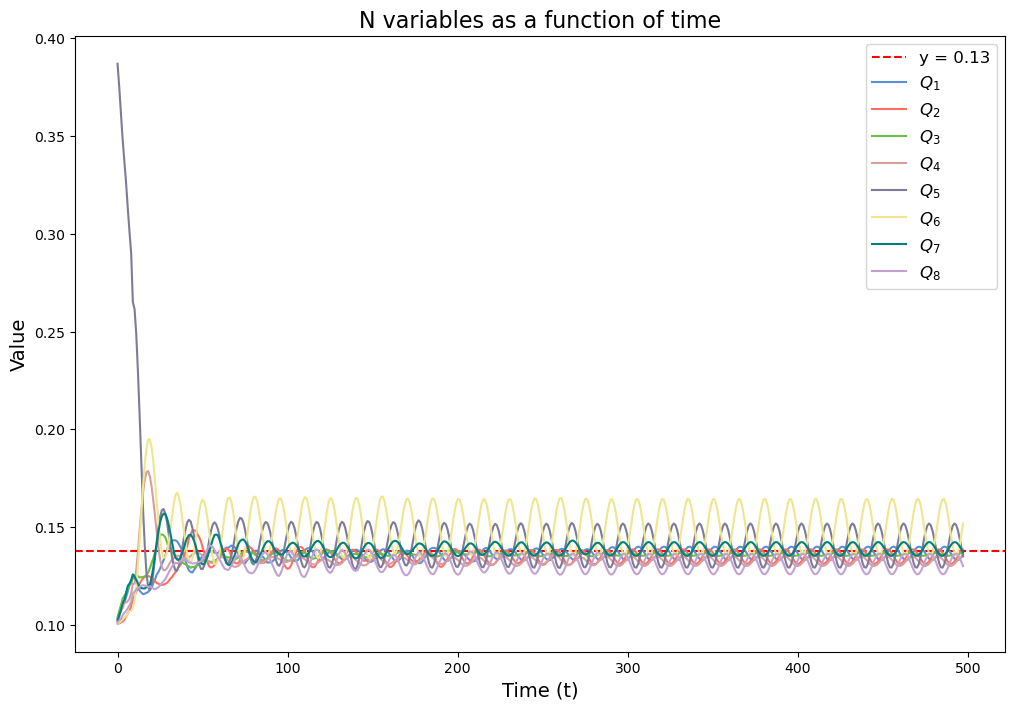

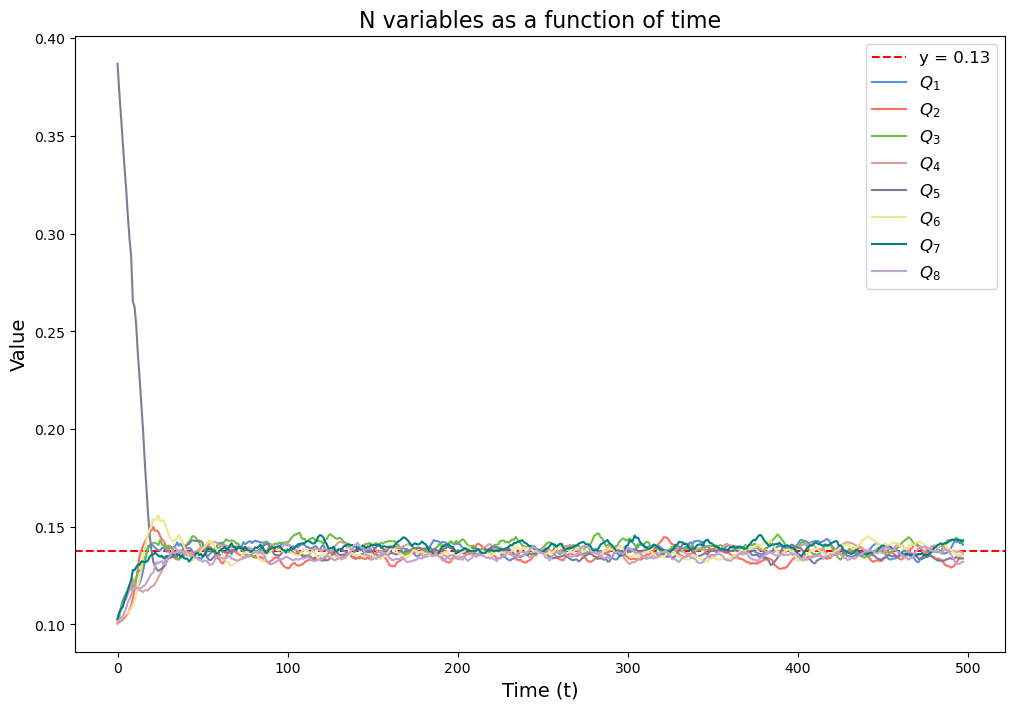

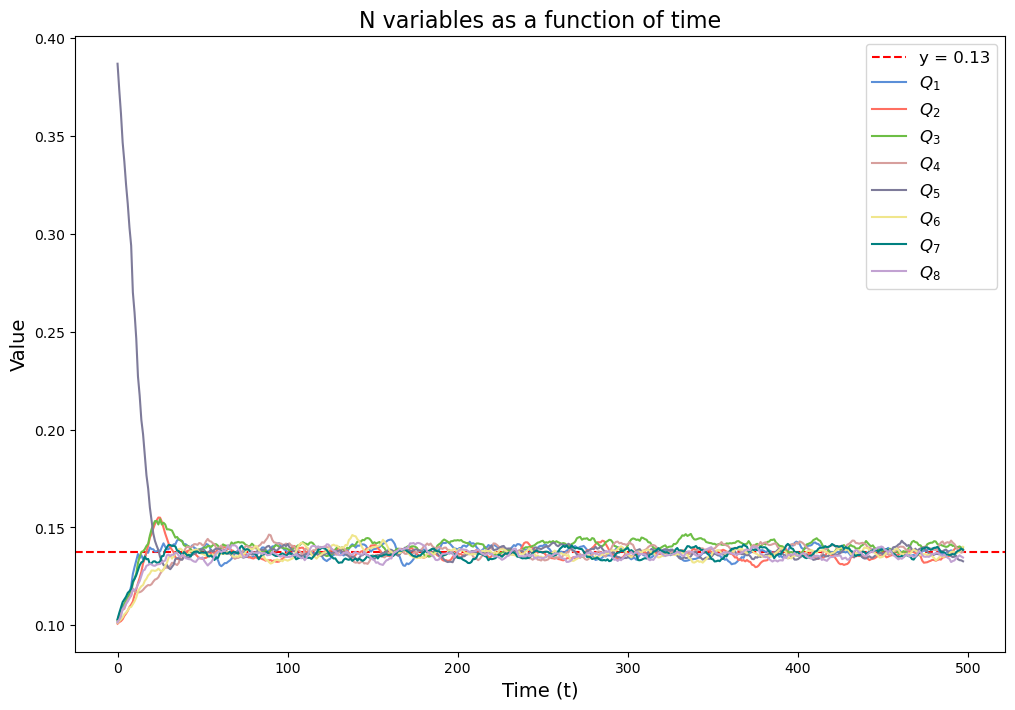

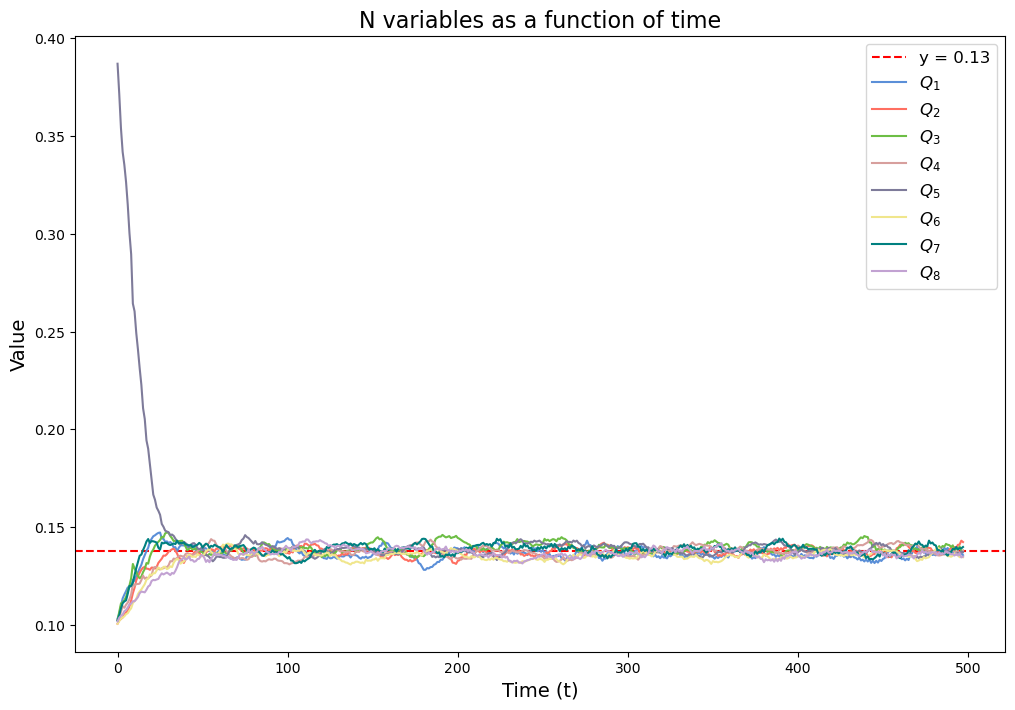

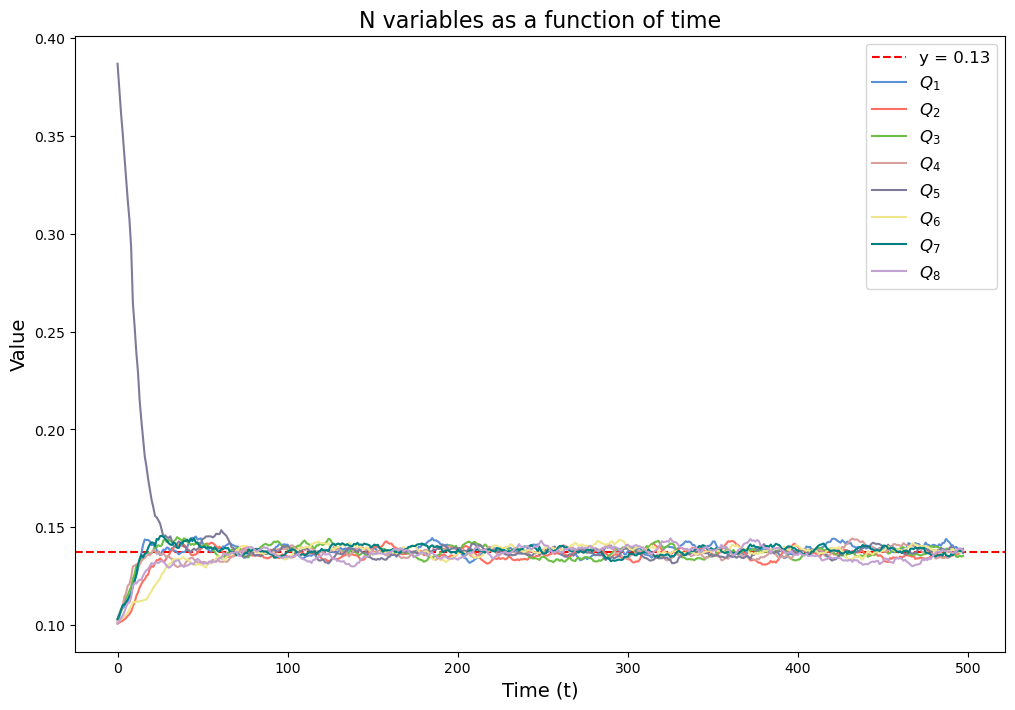

In [33]:
#landscape_maximizes
# Define a list of colors (you can choose any color names or hex codes)
#for 8Q
#colors = ['#5B8FD8', '#FF6F61', '#6DBE45', '#D79F9D', '#7E7B9A','#F0E68C', '#008080', '#C2A2D2']
#for 10 Q
#colors = ['#5B8FD8', '#FF6F61', '#6DBE45', '#D79F9D', '#7E7B9A','#F0E68C', '#008080', '#C2A2D2', '#D04E00', '#A8E6CF']
#for 12 Q
#colors = ['#5B8FD8', '#FF6F61', '#6DBE45', '#D79F9D', '#7E7B9A','#F0E68C', '#008080', '#C2A2D2', '#D04E00', '#A8E6CF','#FFDAB9', '#B2B09C']
#for 14Q
#colors = ['#5B8FD8', '#FF6F61', '#6DBE45', '#D79F9D', '#7E7B9A','#F0E68C', '#008080', '#C2A2D2', '#D04E00', '#A8E6CF','#FFDAB9', '#B2B09C', '#C4BEB5', '#8E7BBA']
dataset_names = ['c2', 'c4', 'c5', 'c6', 'cn']  # Names corresponding to each dataset
datas=[pops_landscape_maximizes_c2,pops_landscape_maximizes_c4,pops_landscape_maximizes_c5,pops_landscape_maximizes_c6,pops_landscape_maximizes_cn]


for pops,conn in zip(datas, dataset_names):
    data = ensemble_averaged_one_point_measures_mean_std(pops)[0]
    num_time_steps = len(data)-2  # The number of rows in the data corresponds to the number of time steps
    t = np.arange(num_time_steps)  # Create a list of time steps [0, 1, 2, ..., num_time_steps-1]
    
    data=np.array(data[1:499])
    data_transposed = data.T  # Now rows are [x1_all_times, x2_all_times, ..., xN_all_times]
    
    plt.figure(figsize=(12, 8))
    plt.axhline(y=ytherm8, color='r', linestyle='--', label=f'y = {ytherm10}')


    # Plot each number as a function of t with specified colors
    for i, y_values in enumerate(data_transposed):
        color = colors[i % len(colors)]  # Cycle through the color list
        plt.plot(t, y_values, label=f'$Q_{i+1}$', color=color)
    
    # Add labels and legend
    plt.xlabel('Time (t)',fontsize=14)
    plt.ylabel('Value',fontsize=14)
    plt.title('N variables as a function of time',fontsize=16)
    plt.legend(fontsize=12)
    
    # Show the plot
    plt.savefig(f'Ensemble averaged mean population of network {num}q_conn_{conn}_rule_R4_{dataset_label}.pdf', format='pdf', bbox_inches='tight')
    plt.show()

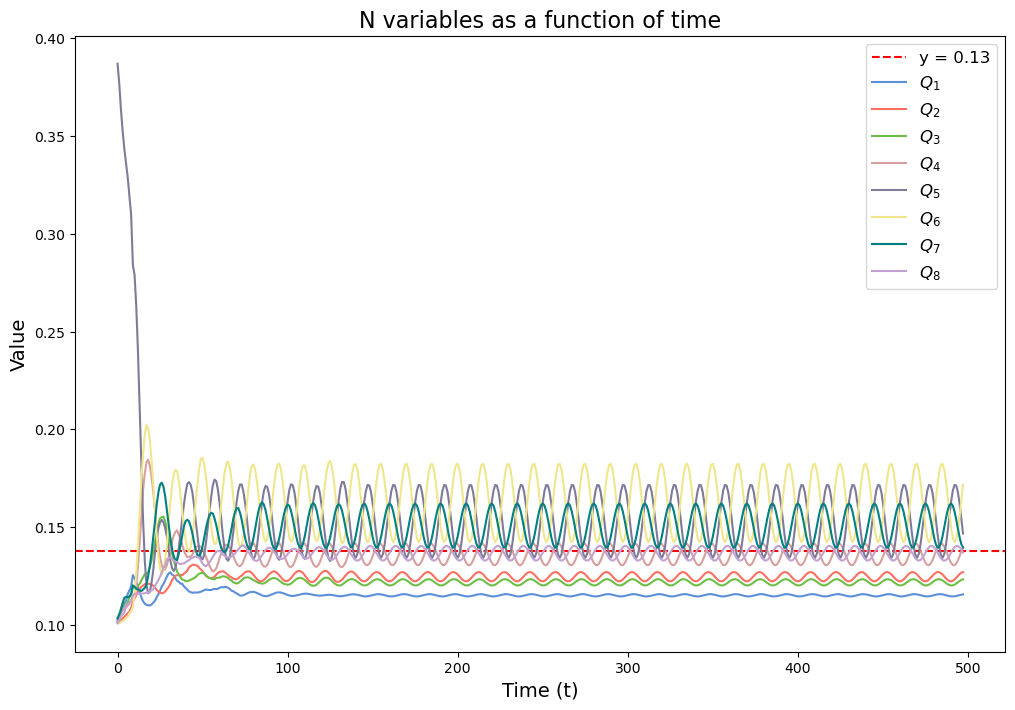

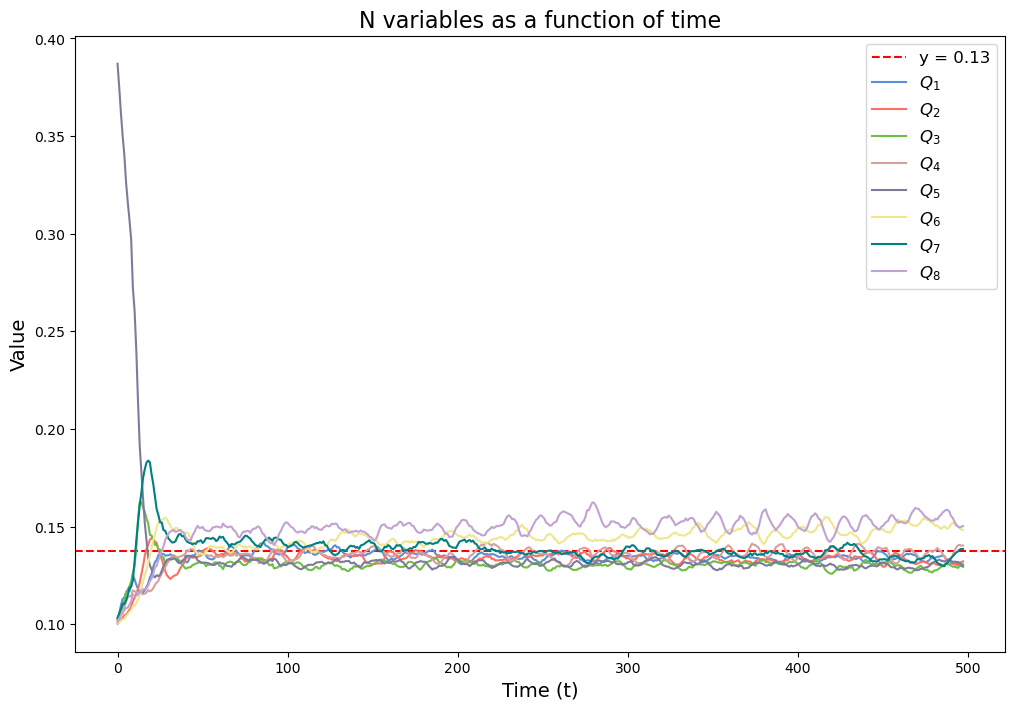

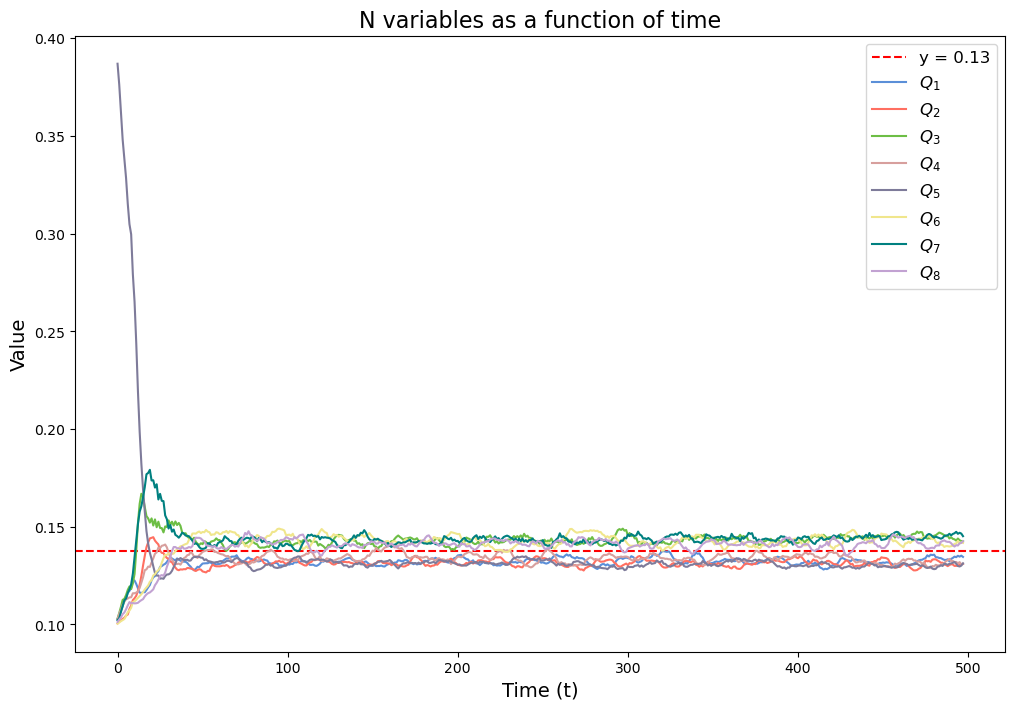

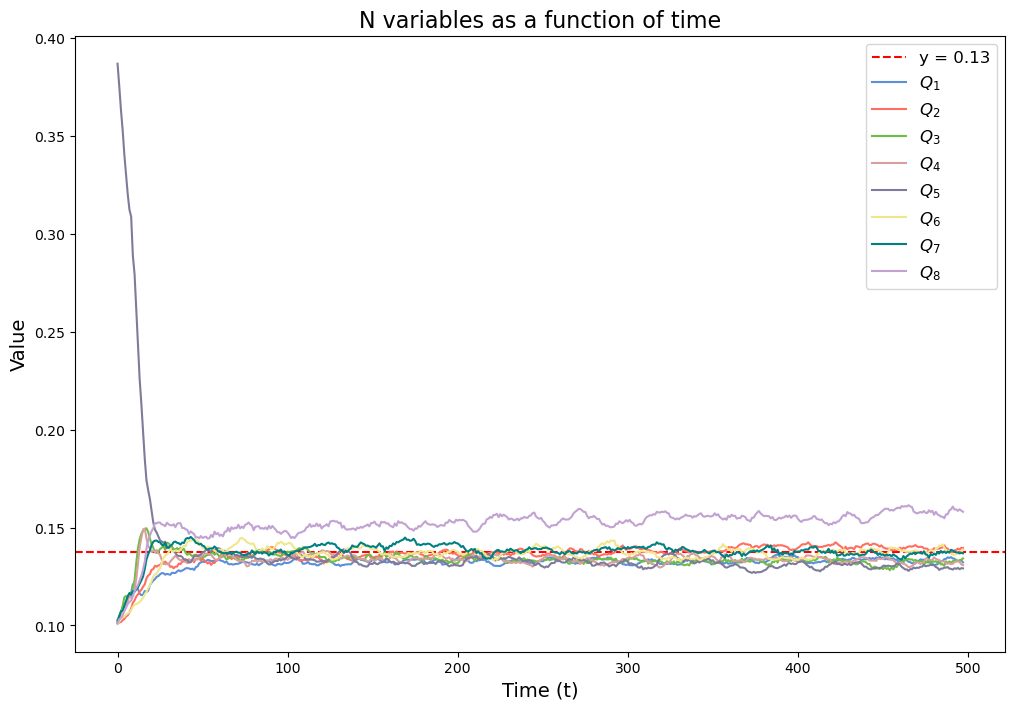

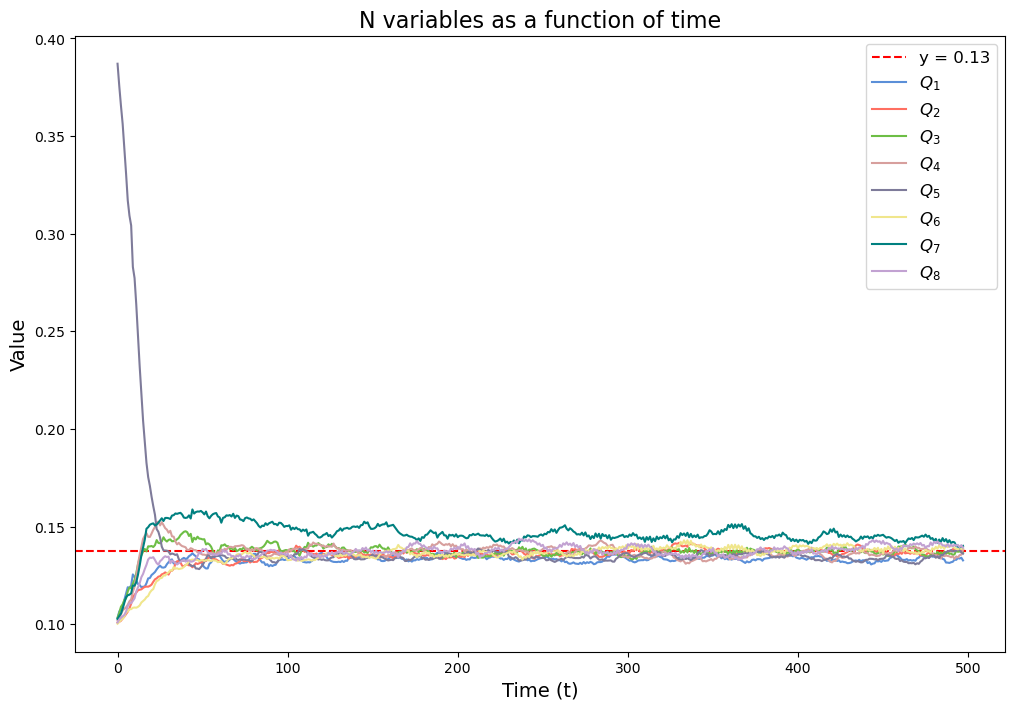

In [34]:
#strongest_maximizes
# Define a list of colors (you can choose any color names or hex codes)
#for 8Q
#colors = ['#5B8FD8', '#FF6F61', '#6DBE45', '#D79F9D', '#7E7B9A','#F0E68C', '#008080', '#C2A2D2']
#for 10 Q
#colors = ['#5B8FD8', '#FF6F61', '#6DBE45', '#D79F9D', '#7E7B9A','#F0E68C', '#008080', '#C2A2D2', '#D04E00', '#A8E6CF']
#for 12 Q
#colors = ['#5B8FD8', '#FF6F61', '#6DBE45', '#D79F9D', '#7E7B9A','#F0E68C', '#008080', '#C2A2D2', '#D04E00', '#A8E6CF','#FFDAB9', '#B2B09C']
#for 14Q
#colors = ['#5B8FD8', '#FF6F61', '#6DBE45', '#D79F9D', '#7E7B9A','#F0E68C', '#008080', '#C2A2D2', '#D04E00', '#A8E6CF','#FFDAB9', '#B2B09C', '#C4BEB5', '#8E7BBA']
dataset_names = ['c2', 'c4', 'c5', 'c6', 'cn']  # Names corresponding to each dataset
datas=[pops_strongest_maximizes_c2,pops_strongest_maximizes_c4,pops_strongest_maximizes_c5,pops_strongest_maximizes_c6,pops_strongest_maximizes_cn]


for pops,conn in zip(datas, dataset_names):
    data = ensemble_averaged_one_point_measures_mean_std(pops)[0]
    num_time_steps = len(data)-2  # The number of rows in the data corresponds to the number of time steps
    t = np.arange(num_time_steps)  # Create a list of time steps [0, 1, 2, ..., num_time_steps-1]
    
    data=np.array(data[1:499])
    data_transposed = data.T  # Now rows are [x1_all_times, x2_all_times, ..., xN_all_times]
    
    plt.figure(figsize=(12, 8))
    plt.axhline(y=ytherm8, color='r', linestyle='--', label=f'y = {ytherm10}')


    # Plot each number as a function of t with specified colors
    for i, y_values in enumerate(data_transposed):
        color = colors[i % len(colors)]  # Cycle through the color list
        plt.plot(t, y_values, label=f'$Q_{i+1}$', color=color)
    
    # Add labels and legend
    plt.xlabel('Time (t)',fontsize=14)
    plt.ylabel('Value',fontsize=14)
    plt.title('N variables as a function of time',fontsize=16)
    plt.legend(fontsize=12)
    
    # Show the plot
    plt.savefig(f'Ensemble averaged mean population of network {num}q_conn_{conn}_rule_R5_{dataset_label}.pdf', format='pdf', bbox_inches='tight')
    plt.show()

In [ ]:
#Time averaged

In [28]:
def time_averaged_one_point_measures_at_t(dataset,t):
    # Assuming dataset is list of 100 lists i.e. one trial
    #stack datasets in 3D
    # Take the ensemble average along the first axis (averaging over all datasets)
    sum_till_t = np.sum(dataset[:t], axis=0)
    time_average_t = (1/(t+1))*(sum_till_t)
    return (time_average_t)

In [29]:
def time_averaged_one_point_measures_matrix_full_sim(dataset):
    # Take the ensemble average along the first axis (averaging over all datasets)
    time_average=[]
    for t in range(len(dataset)):
        time_average.append(time_averaged_one_point_measures_at_t(dataset,t))
    return (time_average)

In [71]:
#insert seed number to find time average
#seed=
num=8
seed=50

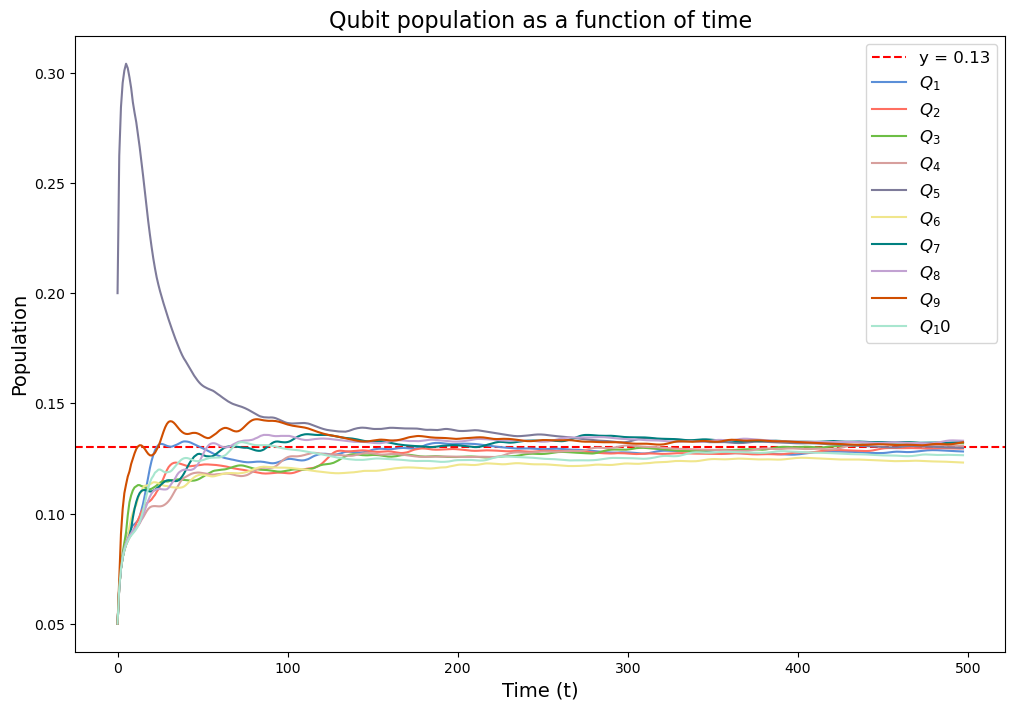

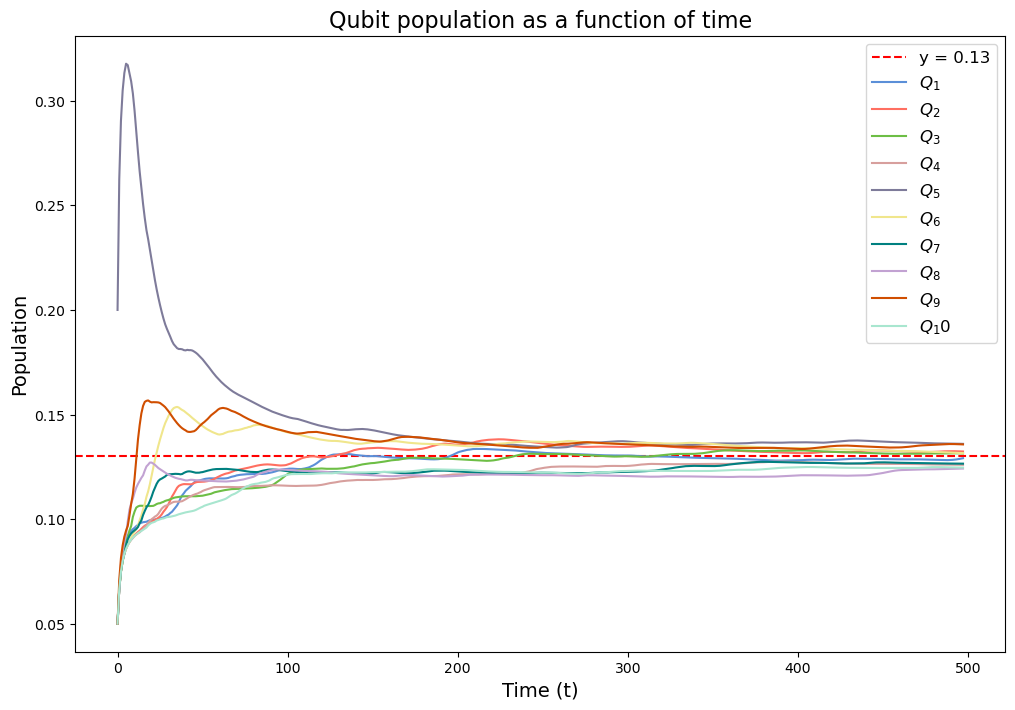

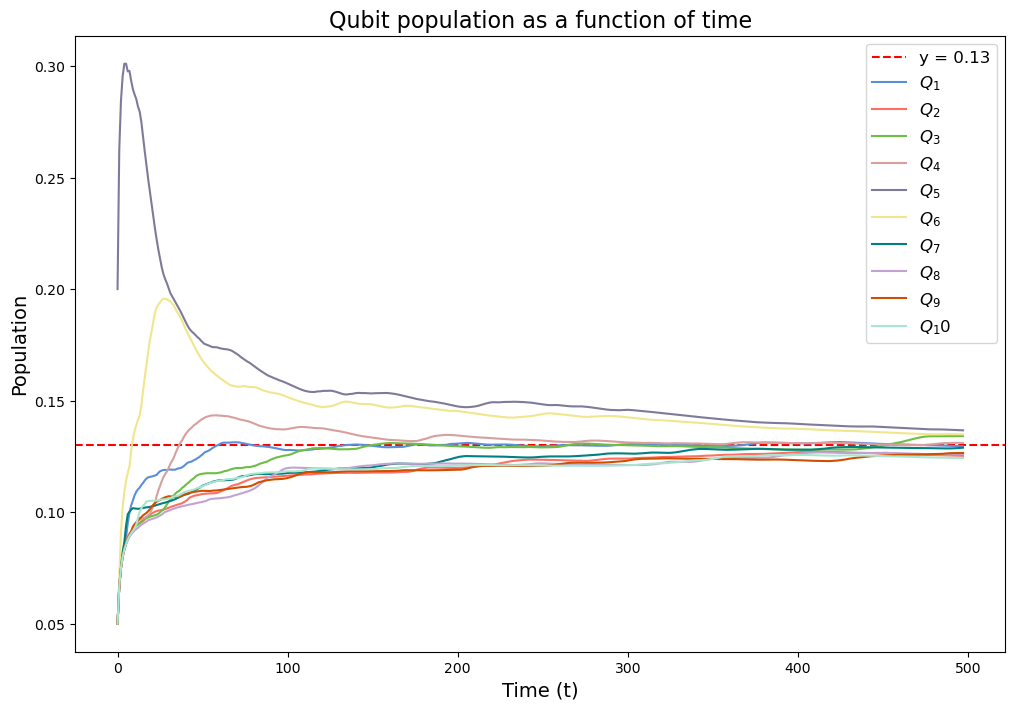

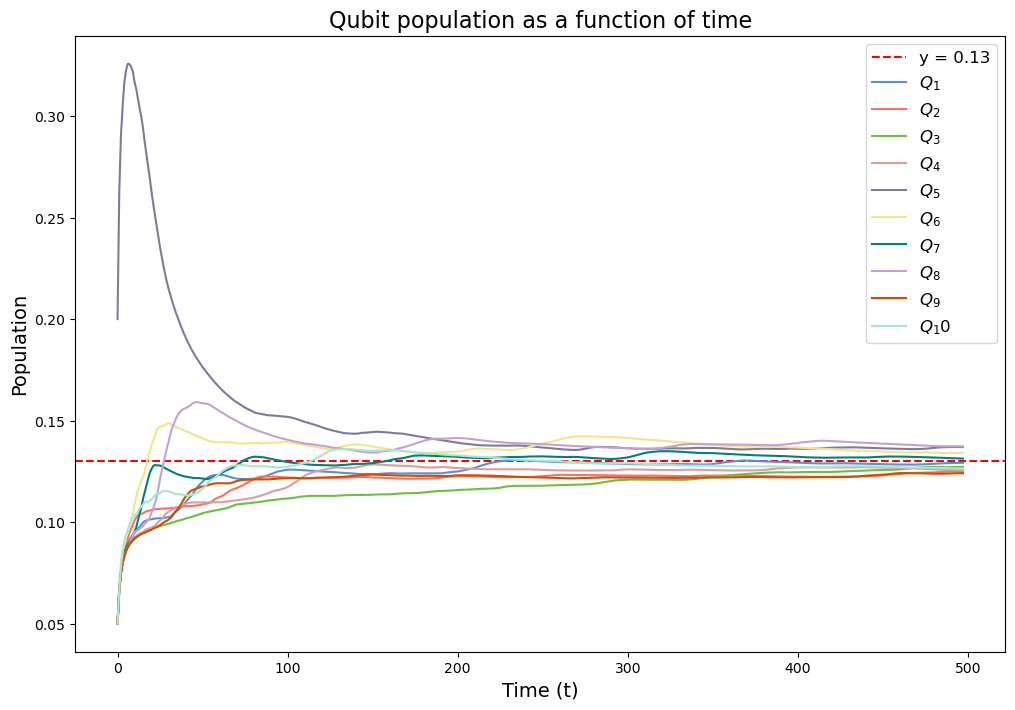

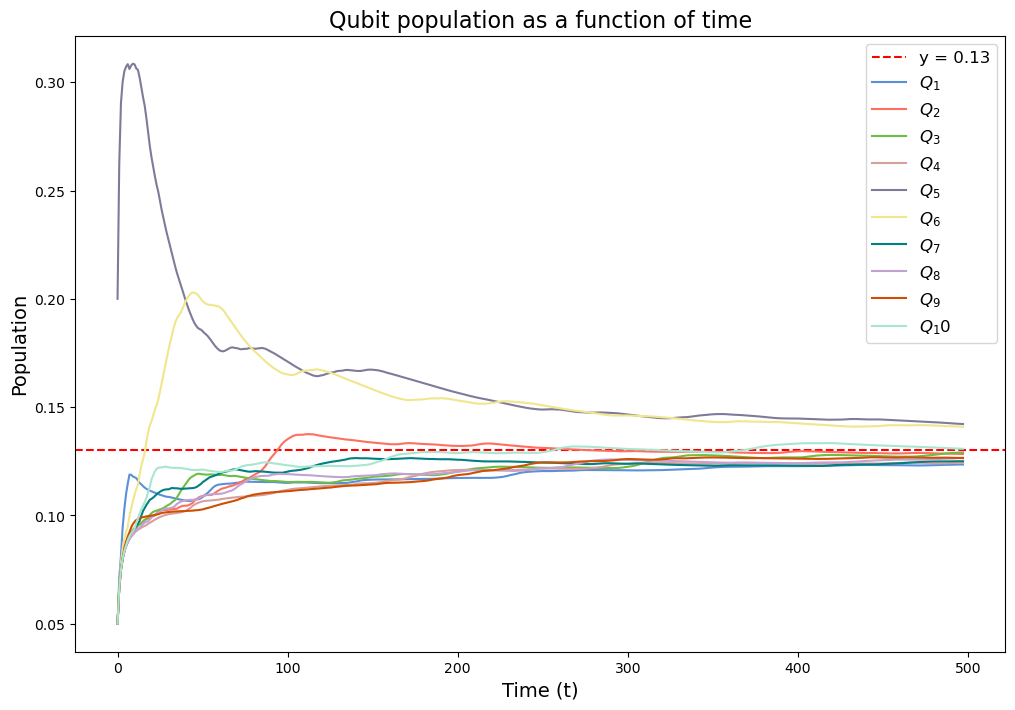

In [88]:
# Define a list of colors (you can choose any color names or hex codes)
#for 8Q
#colors = ['#5B8FD8', '#FF6F61', '#6DBE45', '#D79F9D', '#7E7B9A','#F0E68C', '#008080', '#C2A2D2']
#for 10 Q
#colors = ['#5B8FD8', '#FF6F61', '#6DBE45', '#D79F9D', '#7E7B9A','#F0E68C', '#008080', '#C2A2D2', '#D04E00', '#A8E6CF']
#for 12 Q
#colors = ['#5B8FD8', '#FF6F61', '#6DBE45', '#D79F9D', '#7E7B9A','#F0E68C', '#008080', '#C2A2D2', '#D04E00', '#A8E6CF','#FFDAB9', '#B2B09C']
#for 14Q
#colors = ['#5B8FD8', '#FF6F61', '#6DBE45', '#D79F9D', '#7E7B9A','#F0E68C', '#008080', '#C2A2D2', '#D04E00', '#A8E6CF','#FFDAB9', '#B2B09C', '#C4BEB5', '#8E7BBA']
dataset_names = ['c2', 'c4', 'c5', 'c6', 'cn']  # Names corresponding to each dataset
datas=[pops_random_c2,pops_random_c4,pops_random_c5,pops_random_c6,pops_random_cn]


for pops,conn in zip(datas, dataset_names):
    data=time_averaged_one_point_measures_matrix_full_sim(pops[seed])
    num_time_steps = len(data) - 2  # The number of rows in the data corresponds to the number of time steps
    t = np.arange(num_time_steps)  # Create a list of time steps [0, 1, 2, ..., num_time_steps-1]
    data = np.array(data[1:499])
    data_transposed = data.T  # Now rows are [x1_all_times, x2_all_times, ..., xN_all_times]

    plt.figure(figsize=(12, 8))
    #change this when analyzing pure dataset
    plt.axhline(y=ytherm10, color='r', linestyle='--', label=f'y = {ytherm10}')

    # Plot each number as a function of t with specified colors
    for i, y_values in enumerate(data_transposed):
        color = colors[i % len(colors)]  # Cycle through the color list
        plt.plot(t, y_values, label=f'$Q_{i+1}$', color=color)

    # Add labels and legend
    plt.xlabel('Time (t)', fontsize=14)
    plt.ylabel('Population', fontsize=14)
    plt.title('Qubit population as a function of time', fontsize=16)
    plt.legend(fontsize=12)

    # Save the plot
    plt.savefig(f'Time averaged population of network {num}q_conn_{conn}_rule_R1_seed_{seed}_{dataset_label}.pdf', format='pdf', bbox_inches='tight')
    plt.show()


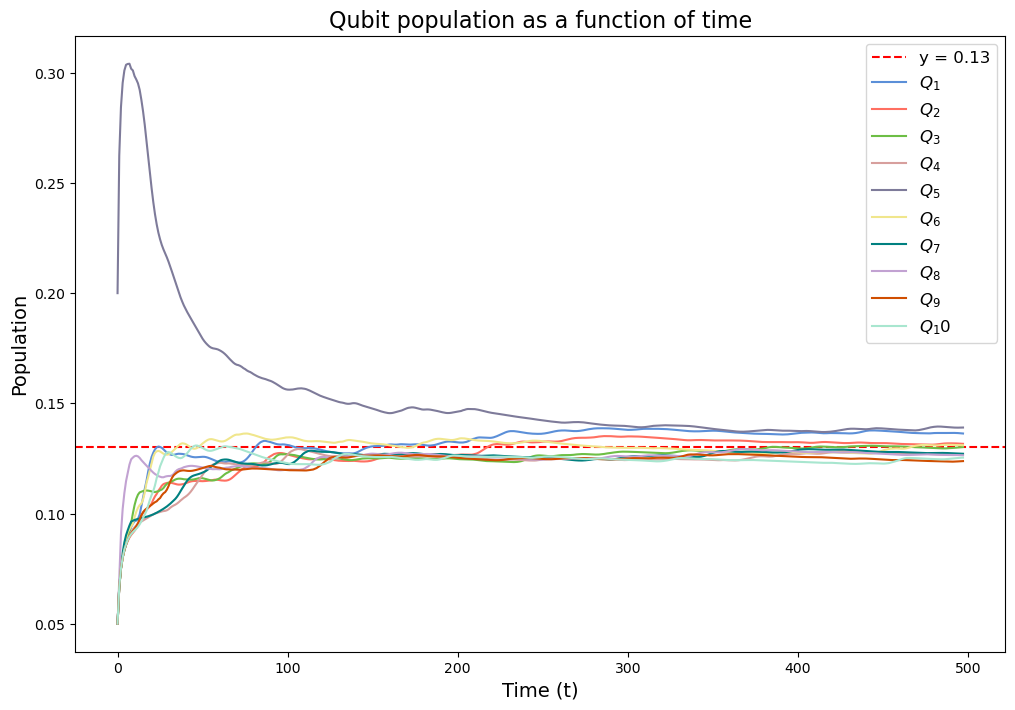

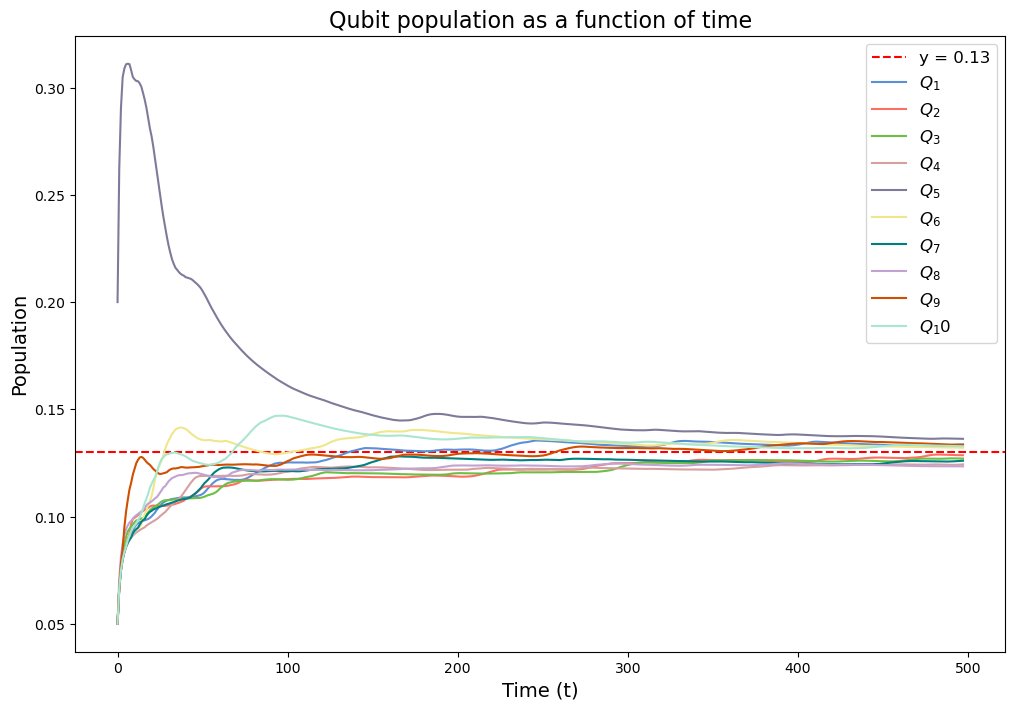

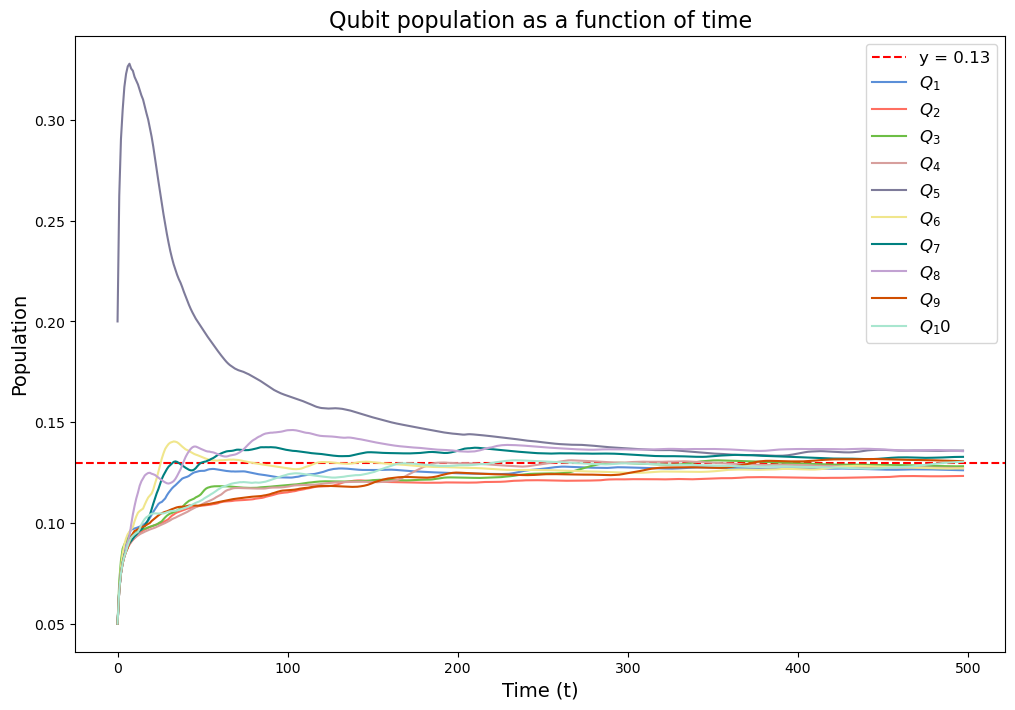

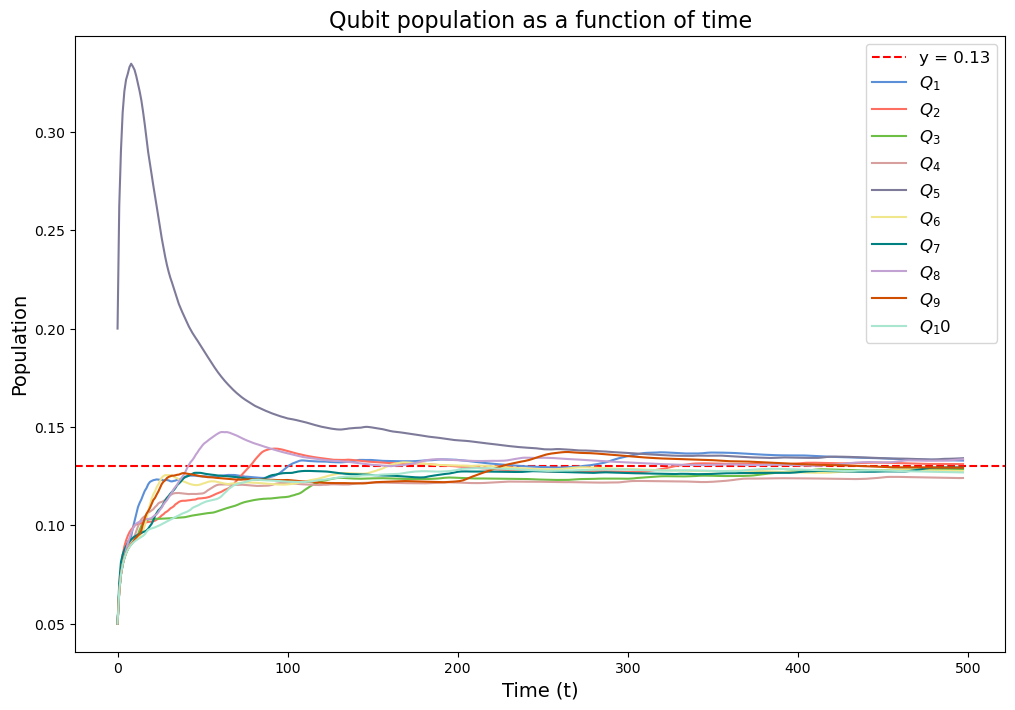

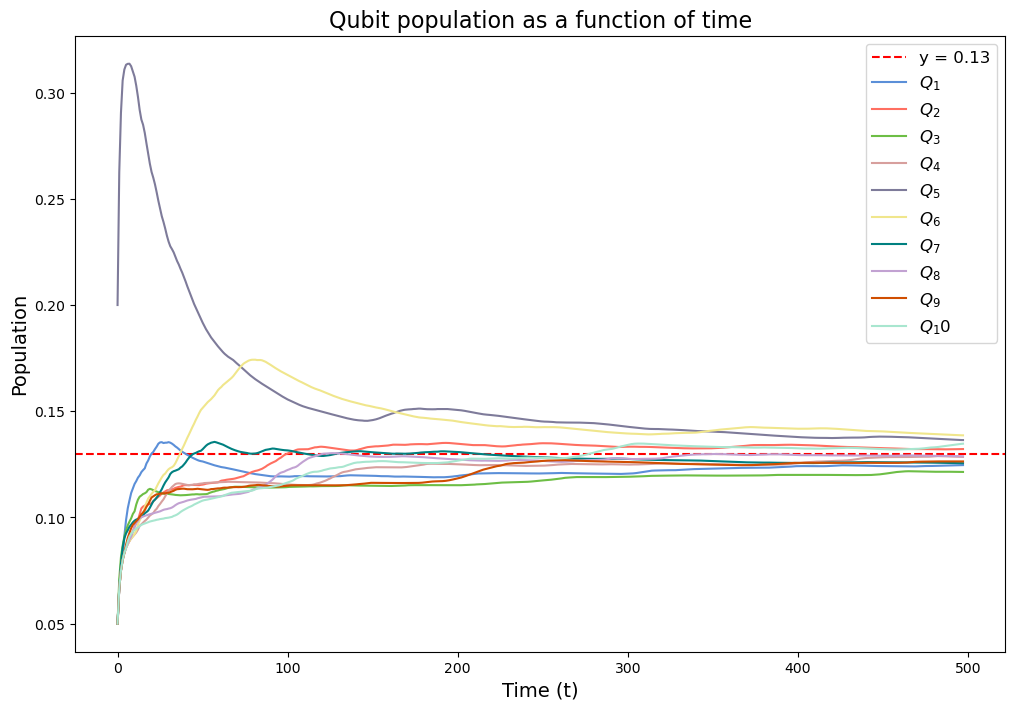

In [89]:
# Define a list of colors (you can choose any color names or hex codes)
#for 8Q
#colors = ['#5B8FD8', '#FF6F61', '#6DBE45', '#D79F9D', '#7E7B9A','#F0E68C', '#008080', '#C2A2D2']
#for 10 Q
#colors = ['#5B8FD8', '#FF6F61', '#6DBE45', '#D79F9D', '#7E7B9A','#F0E68C', '#008080', '#C2A2D2', '#D04E00', '#A8E6CF']
#for 12 Q
#colors = ['#5B8FD8', '#FF6F61', '#6DBE45', '#D79F9D', '#7E7B9A','#F0E68C', '#008080', '#C2A2D2', '#D04E00', '#A8E6CF','#FFDAB9', '#B2B09C']
#for 14Q
#colors = ['#5B8FD8', '#FF6F61', '#6DBE45', '#D79F9D', '#7E7B9A','#F0E68C', '#008080', '#C2A2D2', '#D04E00', '#A8E6CF','#FFDAB9', '#B2B09C', '#C4BEB5', '#8E7BBA']
dataset_names = ['c2', 'c4', 'c5', 'c6', 'cn']  # Names corresponding to each dataset
datas=[pops_greedy_c2,pops_greedy_c4,pops_greedy_c5,pops_greedy_c6,pops_greedy_cn]


for pops,conn in zip(datas, dataset_names):
    data=time_averaged_one_point_measures_matrix_full_sim(pops[seed])
    num_time_steps = len(data) - 2  # The number of rows in the data corresponds to the number of time steps
    t = np.arange(num_time_steps)  # Create a list of time steps [0, 1, 2, ..., num_time_steps-1]
    data = np.array(data[1:499])
    data_transposed = data.T  # Now rows are [x1_all_times, x2_all_times, ..., xN_all_times]

    plt.figure(figsize=(12, 8))
    #change this when analyzing pure dataset
    plt.axhline(y=ytherm10, color='r', linestyle='--', label=f'y = {ytherm10}')

    # Plot each number as a function of t with specified colors
    for i, y_values in enumerate(data_transposed):
        color = colors[i % len(colors)]  # Cycle through the color list
        plt.plot(t, y_values, label=f'$Q_{i+1}$', color=color)

    # Add labels and legend
    plt.xlabel('Time (t)', fontsize=14)
    plt.ylabel('Population', fontsize=14)
    plt.title('Qubit population as a function of time', fontsize=16)
    plt.legend(fontsize=12)

    # Save the plot
    plt.savefig(f'Time averaged population of network {num}q_conn_{conn}_rule_R1_seed_{seed}_{dataset_label}.pdf', format='pdf', bbox_inches='tight')
    plt.show()

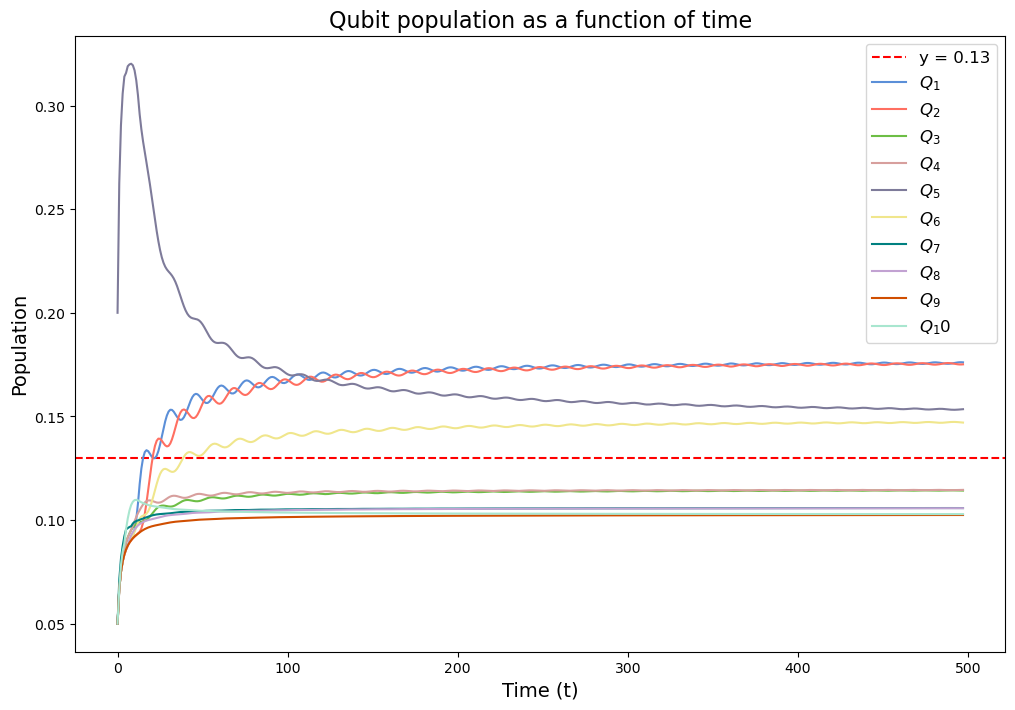

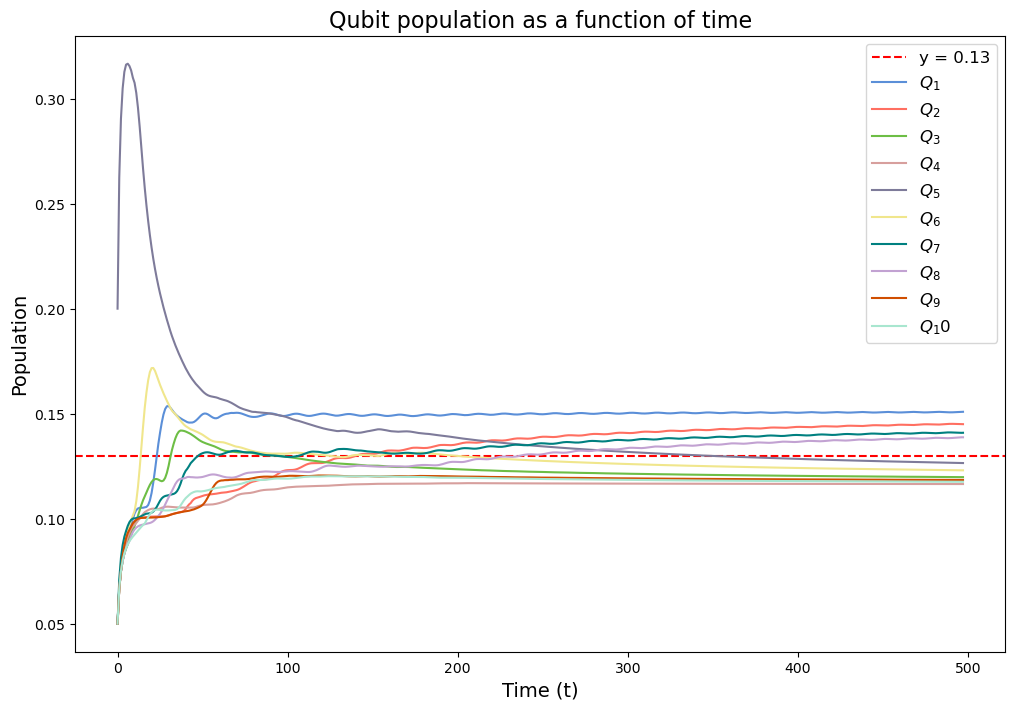

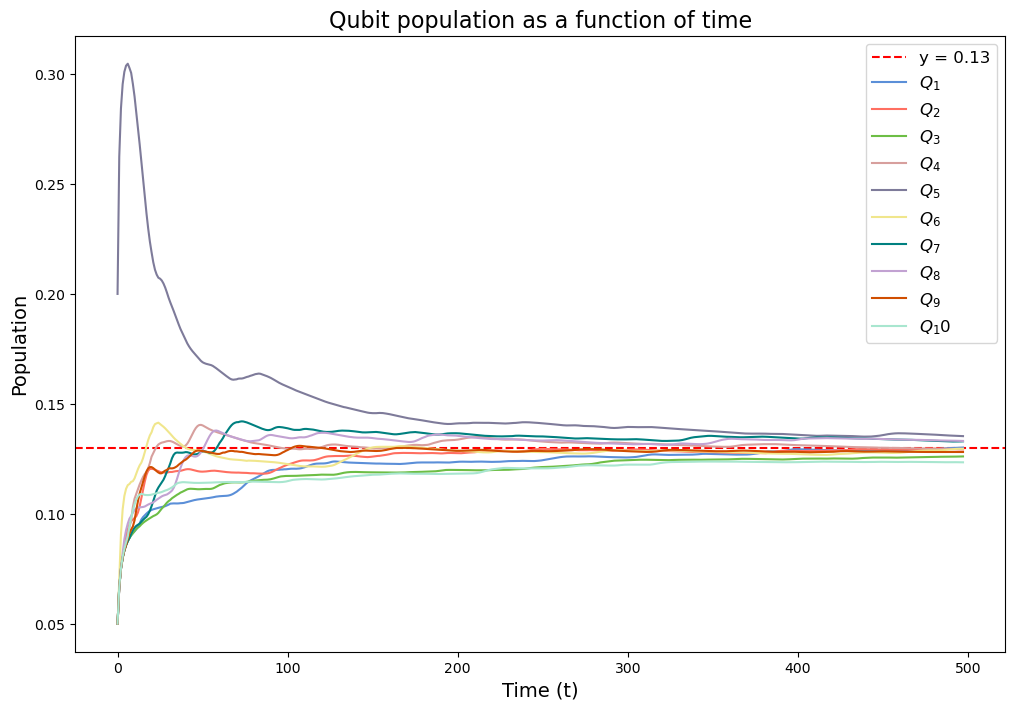

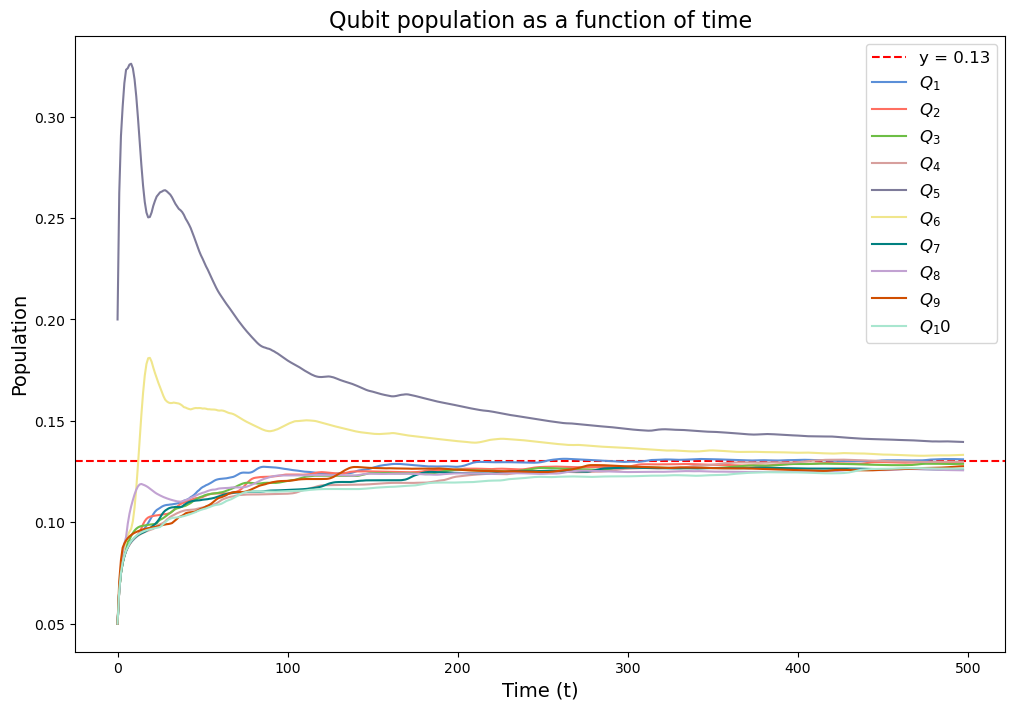

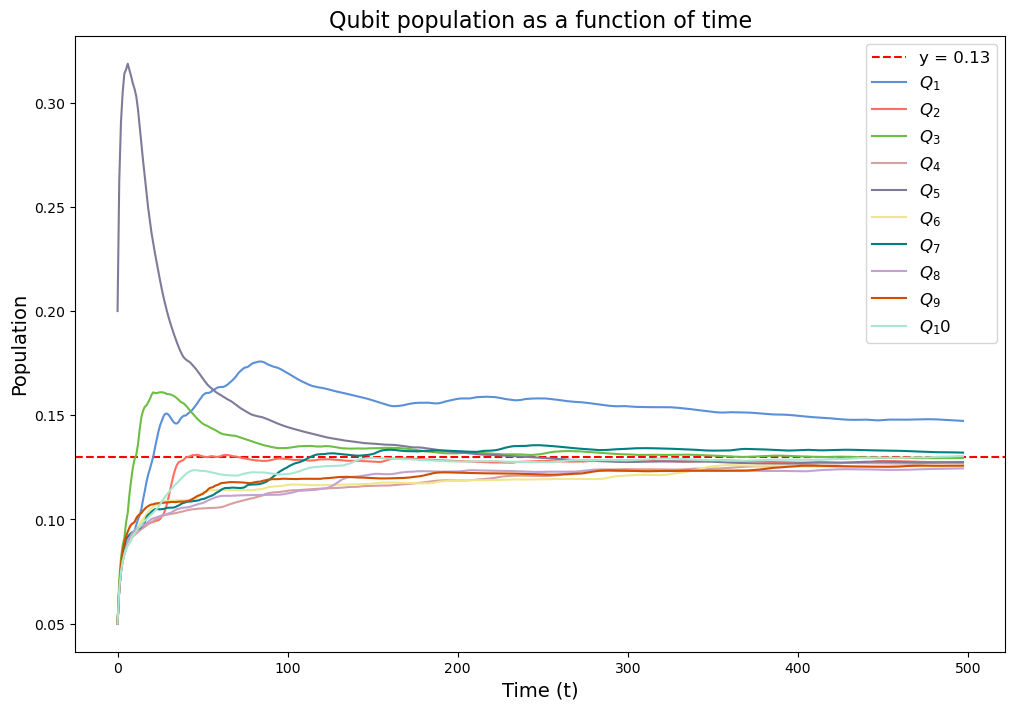

In [90]:
# Define a list of colors (you can choose any color names or hex codes)
#for 8Q
#colors = ['#5B8FD8', '#FF6F61', '#6DBE45', '#D79F9D', '#7E7B9A','#F0E68C', '#008080', '#C2A2D2']
#for 10 Q
#colors = ['#5B8FD8', '#FF6F61', '#6DBE45', '#D79F9D', '#7E7B9A','#F0E68C', '#008080', '#C2A2D2', '#D04E00', '#A8E6CF']
#for 12 Q
#colors = ['#5B8FD8', '#FF6F61', '#6DBE45', '#D79F9D', '#7E7B9A','#F0E68C', '#008080', '#C2A2D2', '#D04E00', '#A8E6CF','#FFDAB9', '#B2B09C']
#for 14Q
#colors = ['#5B8FD8', '#FF6F61', '#6DBE45', '#D79F9D', '#7E7B9A','#F0E68C', '#008080', '#C2A2D2', '#D04E00', '#A8E6CF','#FFDAB9', '#B2B09C', '#C4BEB5', '#8E7BBA']
dataset_names = ['c2', 'c4', 'c5', 'c6', 'cn']  # Names corresponding to each dataset
datas=[pops_mimic_c2,pops_mimic_c4,pops_mimic_c5,pops_mimic_c6,pops_mimic_cn]


for pops,conn in zip(datas, dataset_names):
    data=time_averaged_one_point_measures_matrix_full_sim(pops[seed])
    num_time_steps = len(data) - 2  # The number of rows in the data corresponds to the number of time steps
    t = np.arange(num_time_steps)  # Create a list of time steps [0, 1, 2, ..., num_time_steps-1]
    data = np.array(data[1:499])
    data_transposed = data.T  # Now rows are [x1_all_times, x2_all_times, ..., xN_all_times]

    plt.figure(figsize=(12, 8))
    #change this when analyzing pure dataset
    plt.axhline(y=ytherm10, color='r', linestyle='--', label=f'y = {ytherm10}')

    # Plot each number as a function of t with specified colors
    for i, y_values in enumerate(data_transposed):
        color = colors[i % len(colors)]  # Cycle through the color list
        plt.plot(t, y_values, label=f'$Q_{i+1}$', color=color)

    # Add labels and legend
    plt.xlabel('Time (t)', fontsize=14)
    plt.ylabel('Population', fontsize=14)
    plt.title('Qubit population as a function of time', fontsize=16)
    plt.legend(fontsize=12)

    # Save the plot
    plt.savefig(f'Time averaged population of network {num}q_conn_{conn}_rule_R1_seed_{seed}_{dataset_label}.pdf', format='pdf', bbox_inches='tight')
    plt.show()

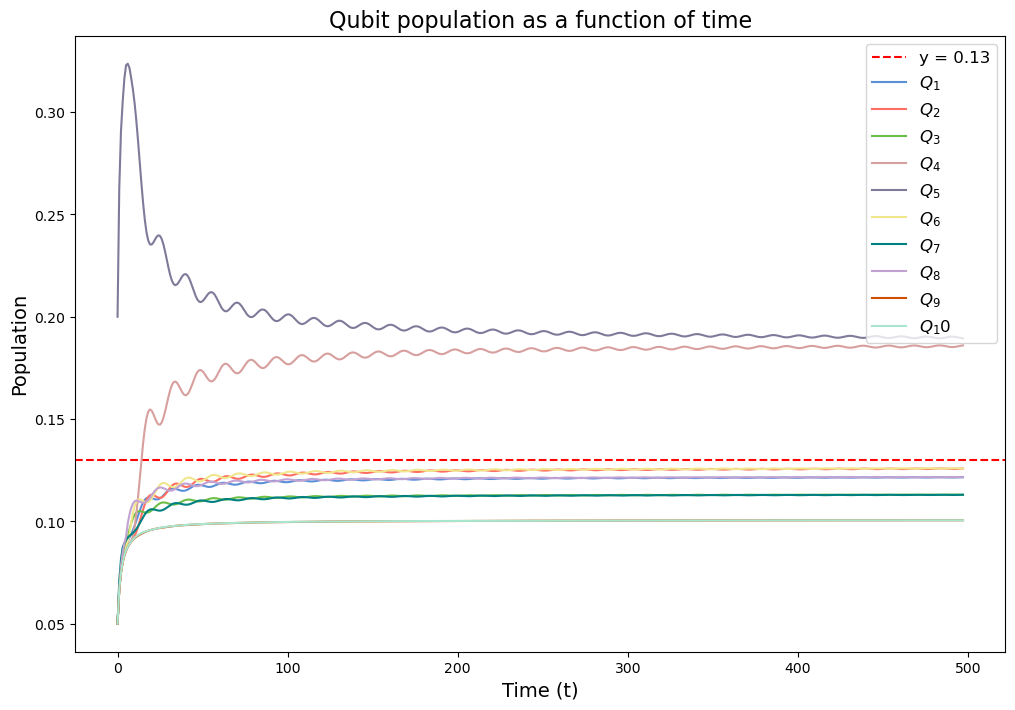

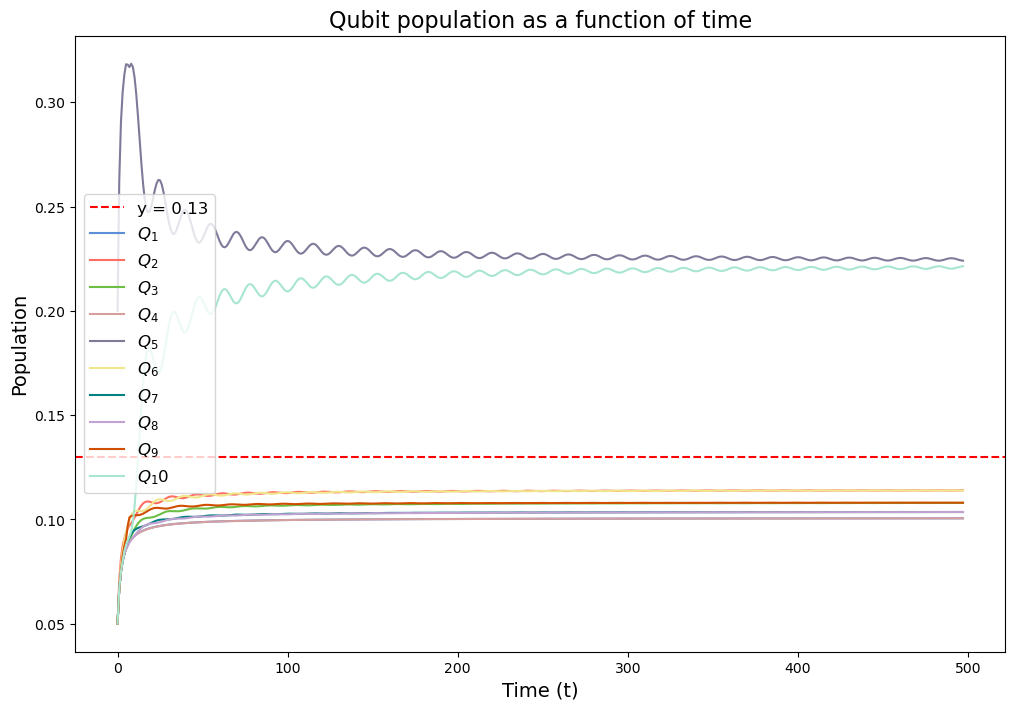

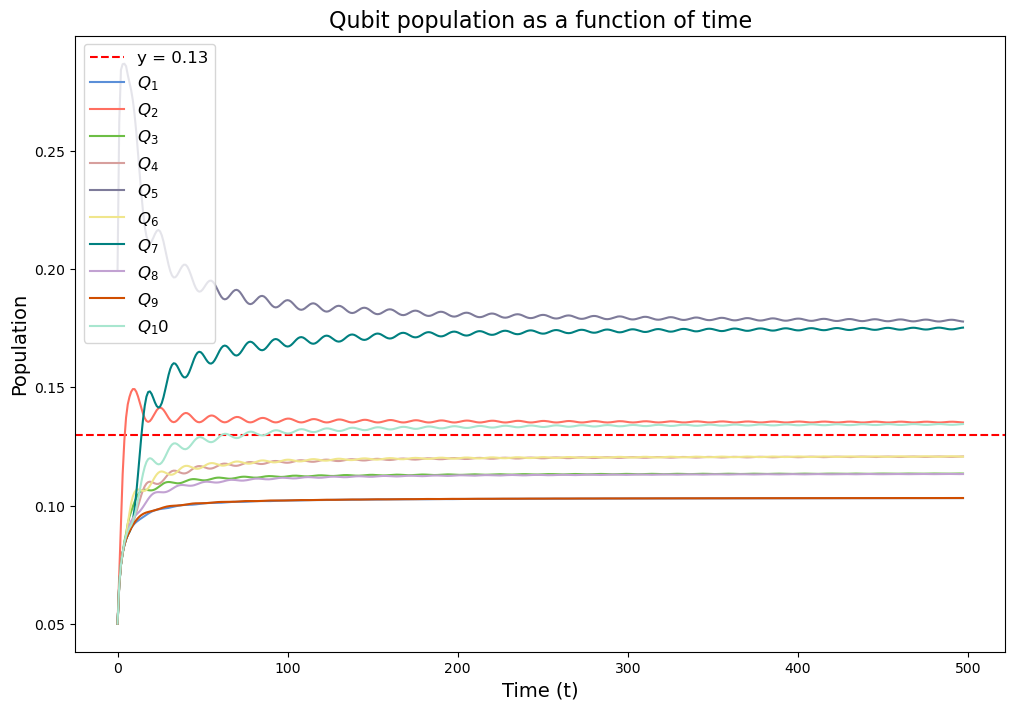

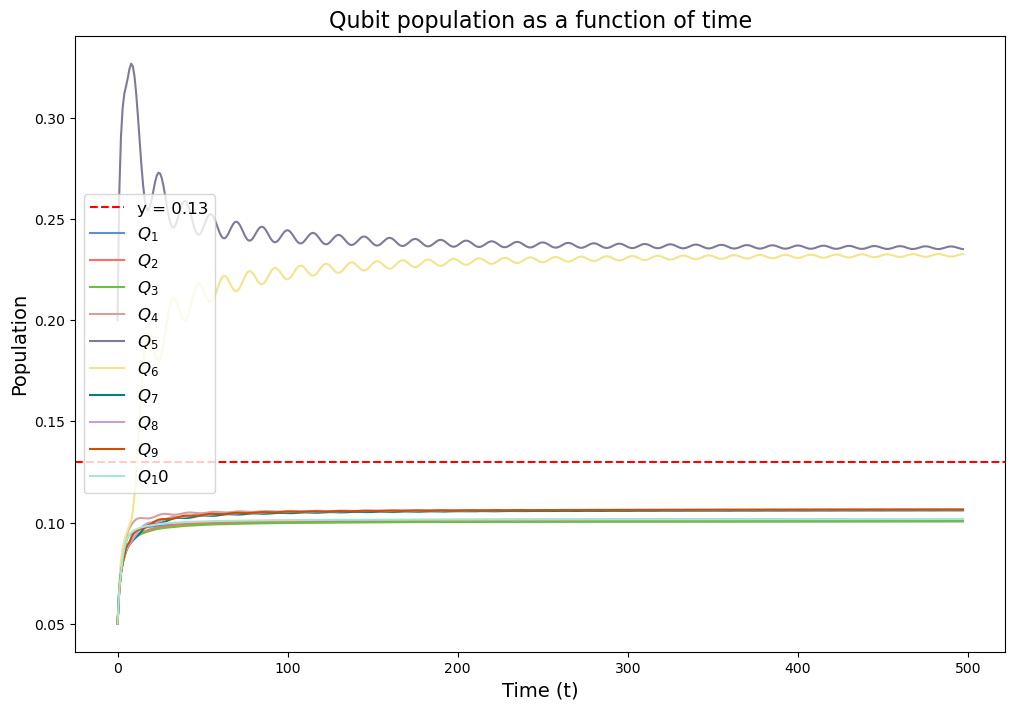

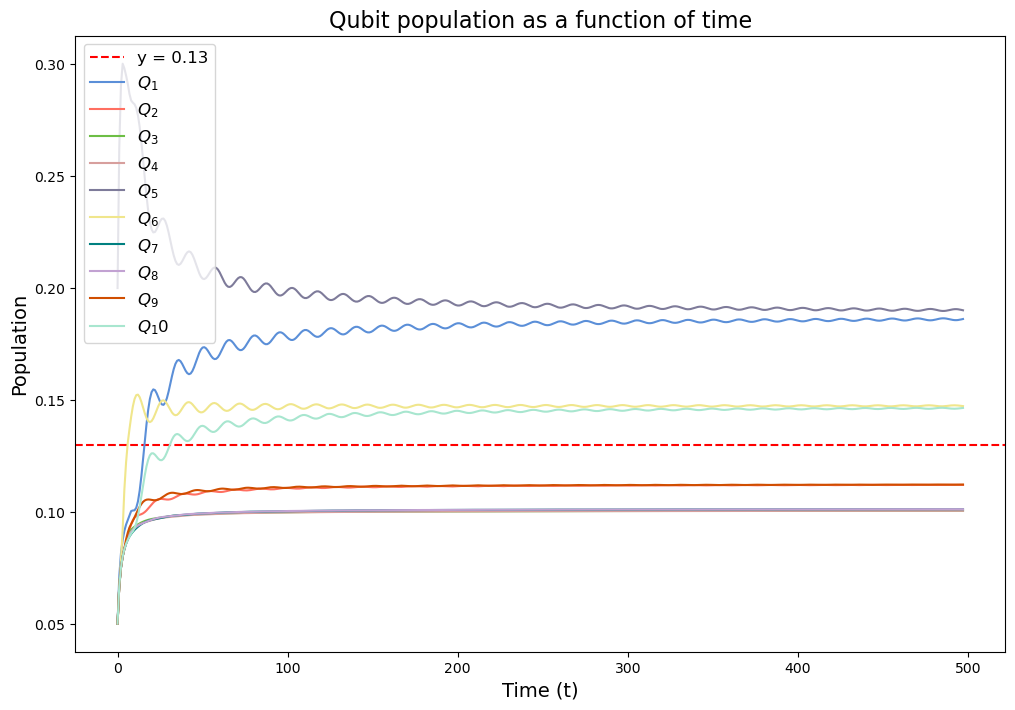

In [91]:
seed=50
# Define a list of colors (you can choose any color names or hex codes)
#for 8Q
#colors = ['#5B8FD8', '#FF6F61', '#6DBE45', '#D79F9D', '#7E7B9A','#F0E68C', '#008080', '#C2A2D2']
#for 10 Q
#colors = ['#5B8FD8', '#FF6F61', '#6DBE45', '#D79F9D', '#7E7B9A','#F0E68C', '#008080', '#C2A2D2', '#D04E00', '#A8E6CF']
#for 12 Q
#colors = ['#5B8FD8', '#FF6F61', '#6DBE45', '#D79F9D', '#7E7B9A','#F0E68C', '#008080', '#C2A2D2', '#D04E00', '#A8E6CF','#FFDAB9', '#B2B09C']
#for 14Q
#colors = ['#5B8FD8', '#FF6F61', '#6DBE45', '#D79F9D', '#7E7B9A','#F0E68C', '#008080', '#C2A2D2', '#D04E00', '#A8E6CF','#FFDAB9', '#B2B09C', '#C4BEB5', '#8E7BBA']
dataset_names = ['c2', 'c4', 'c5', 'c6', 'cn']  # Names corresponding to each dataset
datas=[pops_landscape_maximizes_c2,pops_landscape_maximizes_c4,pops_landscape_maximizes_c5,pops_landscape_maximizes_c6,pops_landscape_maximizes_cn]


for pops,conn in zip(datas, dataset_names):
    data=time_averaged_one_point_measures_matrix_full_sim(pops[seed])
    num_time_steps = len(data) - 2  # The number of rows in the data corresponds to the number of time steps
    t = np.arange(num_time_steps)  # Create a list of time steps [0, 1, 2, ..., num_time_steps-1]
    data = np.array(data[1:499])
    data_transposed = data.T  # Now rows are [x1_all_times, x2_all_times, ..., xN_all_times]

    plt.figure(figsize=(12, 8))
    #change this when analyzing pure dataset
    plt.axhline(y=ytherm10, color='r', linestyle='--', label=f'y = {ytherm10}')

    # Plot each number as a function of t with specified colors
    for i, y_values in enumerate(data_transposed):
        color = colors[i % len(colors)]  # Cycle through the color list
        plt.plot(t, y_values, label=f'$Q_{i+1}$', color=color)

    # Add labels and legend
    plt.xlabel('Time (t)', fontsize=14)
    plt.ylabel('Population', fontsize=14)
    plt.title('Qubit population as a function of time', fontsize=16)
    plt.legend(fontsize=12)

    # Save the plot
    plt.savefig(f'Time averaged population of network {num}q_conn_{conn}_rule_R1_seed_{seed}_{dataset_label}.pdf', format='pdf', bbox_inches='tight')
    plt.show()

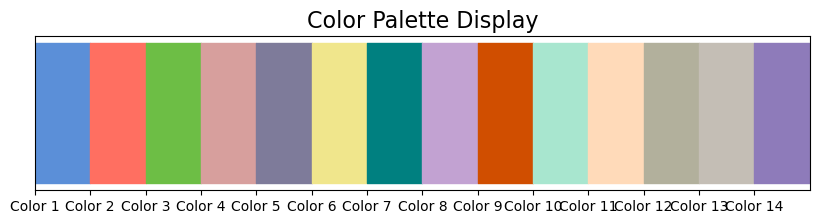

In [29]:
import matplotlib.pyplot as plt

# Define the color palette
colors = ['#5B8FD8', '#FF6F61', '#6DBE45', '#D79F9D', '#7E7B9A','#F0E68C', '#008080', '#C2A2D2', '#D04E00', '#A8E6CF','#FFDAB9', '#B2B09C', '#C4BEB5', '#8E7BBA']

# Create a figure and axis
plt.figure(figsize=(10, 2))

# Create a bar for each color
for i, color in enumerate(colors):
    plt.fill_between([i, i+1], 0, 1, color=color)

# Set the ticks and labels
plt.xticks(range(len(colors)), [f'Color {i+1}' for i in range(len(colors))])
plt.yticks([])  # Hide y ticks
plt.title('Color Palette Display', fontsize=16)
plt.xlim(0, len(colors))  # Set x limits

# Show the plot
plt.show()
